# Predicting Crimes in Vancouver 

## Question: 
What types of crime occur in Vancouver based on time and location of criminal activities from 2003 - 2019 and what are the best predictors of a type of crime?

## Introduction:

Crime occurs in cities around the world. Although Vancouver is a relatively safe city, it is not an exception to this rule. In order to keep the city safe and enjoyable, Vancouver Police Department (VPD) is at the frontline and is the core of crime prevention and safety. One VPD initiative is to provide an informational data set about criminal incidents that occur in Vancouver to the public. For example, a recently released VPD annual crime statistics for 2019 contains a summary of various types of crime and the difference compared to the 2018 statistics. Some of the notable findings they reported was an increase in the city’s overall violent crime rate in 2019 by 7.2% compared to 2018, largely due to an increase in Assaults which saw an increase of 11.2% (Vancouver, Vancouver Police Department). Other notable changes were Break and Enter in Business Properties (+21.0%) and Theft from Auto (+12.9%). Other types of criminal activities saw lower rates when compared to 2018. For example, Break and Enter in Residential Areas went down by 10.5% (Vancouver, Vancouver Police Department). Criminal activities and their rates are dynamic and affected by multiple factors, therefore difficult to predict. Regardless, crime has a negative impact on individuals and society, and the more informed we are, the less opportunity for criminals and therefore fewer victims. Thus, this project will explore what type of criminal activities are prevalent in Vancouver based on when (time) and where (location) they have occured.

To answer the above question, we will use the VPD crime data set consisting of crime records from 2003 - 2019 in Vancouver. This data set consists of what types of crime have occurred along with relevant information regarding the crime. It includes categories to describe when the crime occured in terms of Year, Month, Day, Hour, and Minute. The crime locations are described by the Neighbourhood - specifying the various areas and districts in Vancouver, Hundred Block - indicating offset locations of the crime, and the X and Y coordinates representing UTM Zone 10 coordinates. From the various categories, the most relevant attributes of the crime seem to be Hour for time, and X and Y coordinates for location. By combining the main predictors of criminal activities, it may be possible to investigate and predict what type of criminal activities would occur. Such analysis would help individuals to take preventative measures and assist the VPD in making Vancouver a safe city.

In [55]:
# May take a while the first time
install.packages("GGally")
install.packages('e1071', dependencies=TRUE)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [56]:
library(GGally)
library(tidyverse)
library(caret)
library(rvest)
library(repr)

In [67]:
URL <- "https://drive.google.com/uc?export=download&id=1mAjcCK4jQH8LW_rAeX2U3YZ4gO7nCcGe"

In [69]:
original_crime <- read_csv(URL)

# change type to factor instead of characters for later use in classification
original_crime <- original_crime %>% 
    mutate(TYPE = as.factor(TYPE)) %>% 
    mutate(HUNDRED_BLOCK = as.factor(HUNDRED_BLOCK)) %>% 
    mutate(NEIGHBOURHOOD = as.factor(NEIGHBOURHOOD)) 
head(original_crime)

Parsed with column specification:
cols(
  TYPE = col_character(),
  YEAR = col_double(),
  MONTH = col_double(),
  DAY = col_double(),
  HOUR = col_double(),
  MINUTE = col_double(),
  HUNDRED_BLOCK = col_character(),
  NEIGHBOURHOOD = col_character(),
  X = col_double(),
  Y = col_double()
)



TYPE                       YEAR MONTH DAY HOUR MINUTE HUNDRED_BLOCK  
1 Break and Enter Commercial 2012 12    14  8    52     NA             
2 Break and Enter Commercial 2019  3     7  2     6     10XX SITKA SQ  
3 Break and Enter Commercial 2019  8    27  4    12     10XX ALBERNI ST
4 Break and Enter Commercial 2014  8     8  5    13     10XX ALBERNI ST
5 Break and Enter Commercial 2005 11    14  3     9     10XX ALBERNI ST
6 Break and Enter Commercial 2006  5    21  4    50     10XX ALBERNI ST
  NEIGHBOURHOOD X        Y      
1 Oakridge      491285.0 5453433
2 Fairview      490613.0 5457110
3 West End      491007.8 5459174
4 West End      491015.9 5459166
5 West End      491021.4 5459161
6 West End      491021.4 5459161

## Expected Outcomes and Significance

By the end of our data analysis, we expect to find a reliable and consistent set of parameters that help distinguish and identify the different types of crime occurring in Vancouver, British Columbia. With these findings, we’d be able to successfully predict the potential crimes of a specific time and location-based environmental factors, as opposed to doing so through tedious manual observation techniques. This could be applied as a form of predictive policing, preventing crimes at their roots as opposed to dealing with the consequences. With this, however, we are left with the question of whether or not such statistical predictions are as good in practice as they are in theory, and if so can they keep up with the evolving trends of crime with the passage of time? Furthermore, can the cost of data collection and analysis exceed that of old-fashioned, manual labor?


## Crime Data Methods & Results

There will only need to be some data wrangling to remove the NA's from the data, as seen in the summary table. The data set is already tidy because we are considering different time units, such as years and minutes, to be independent, not part of one time column in order to investigate their individual impact. From the correlation matrix, we can see that X, Y, minute, and hour are correlated so we would like to further investigate these attributes to classify the type of crime. Since hundred block and neighbourhood are factors, we cannot use them to predict but it would be interesting to see if there is a correlation between regions and a certain crime type. One way we will visualize the classification results is by making a bar chart of correctly classified vs incorrectly classified crimes across different neighbourhoods in order to clearly see if the next crime type can be accurately predicted for each region.

For each variable in this dataset, a dedicated table of the levels' distribution will be constructed. Depending on whether or not there seems to be a trend in these levels, a respective histogram will be constructed visualizing these trends. For quantitative variables of time showing an interesting pattern and sign of promise as a predictor, a histogram demonstrating each of the crime levels' variability with this given variable, with hopes of a definitive conclusion coming from such. For qualitative variables, a bar chart will be created to see if any of the few or many levels seem to surpass the others in crime cases, and if so will have a bar chart of crime type variety within this individual level. The x and y coordinates work hand in hand, so their ability to create a map through scatterplots will be of much use, and the most seemingly effective predictors will have a dedicated visualization to conclude with before progressing onto K nearest neighbours classification.

In [70]:
# types of crime
original_crime %>%
    select(TYPE) %>%
    unlist() %>%
    levels()

[1] "Break and Enter Commercial"                            
 [2] "Break and Enter Residential/Other"                     
 [3] "Homicide"                                              
 [4] "Mischief"                                              
 [5] "Offence Against a Person"                              
 [6] "Other Theft"                                           
 [7] "Theft from Vehicle"                                    
 [8] "Theft of Bicycle"                                      
 [9] "Theft of Vehicle"                                      
[10] "Vehicle Collision or Pedestrian Struck (with Fatality)"
[11] "Vehicle Collision or Pedestrian Struck (with Injury)"

### Levels of Crime:

Clearly, there is a very wide range of crimes that has occured in Vancouver throughout the years, and although many have a common, broad theme most differ a lot in nature. However, some can be grouped together so as not to clean up the dataset further, such as the two break and enter levels, the four types of theft, and vehicle collision or pedestrian stiking. Again, however, each category might differ uniquely with any respective predictor so it might not be safe to make such generalizations for now, given that certain predictors should not necessarily imply that if one specific crime were to occur under any particular circumstance, all other crimes under its respective umbrella are too, likely to occur. One important thing to consider is that, upon looking at the dataset itself, it appears that homicide and offence against a person have no records about them, so they cannot be factored into the final classification problem, and will be cleaned out of the dataset upon wrangling.

In [71]:
# Sampling the dataset since it is huge and will take too long to run
nrow(original_crime)
crime <- sample_n(original_crime, 150000) %>%
    mutate(HUNDRED_BLOCK = as.factor(HUNDRED_BLOCK)) %>%
    mutate(NEIGHBOURHOOD = as.factor(NEIGHBOURHOOD))
nrow(crime)

[1] 624038

[1] 150000

Table 0.0

In [72]:
# Crime count sorted by type of crime
num_obs <- nrow(crime)
type_dist <- crime %>% 
  group_by(TYPE) %>% 
  summarize(n = n(),
            percentage = n() / num_obs * 100) %>% 
  arrange(desc(percentage))
type_dist

TYPE                                                   n     percentage 
1  Theft from Vehicle                                     50464 33.64266667
2  Mischief                                               20262 13.50800000
3  Break and Enter Residential/Other                      16048 10.69866667
4  Other Theft                                            15421 10.28066667
5  Offence Against a Person                               14913  9.94200000
6  Theft of Vehicle                                        9941  6.62733333
7  Break and Enter Commercial                              9297  6.19800000
8  Theft of Bicycle                                        7317  4.87800000
9  Vehicle Collision or Pedestrian Struck (with Injury)    6201  4.13400000
10 Vehicle Collision or Pedestrian Struck (with Fatality)    71  0.04733333
11 Homicide                                                  65  0.04333333

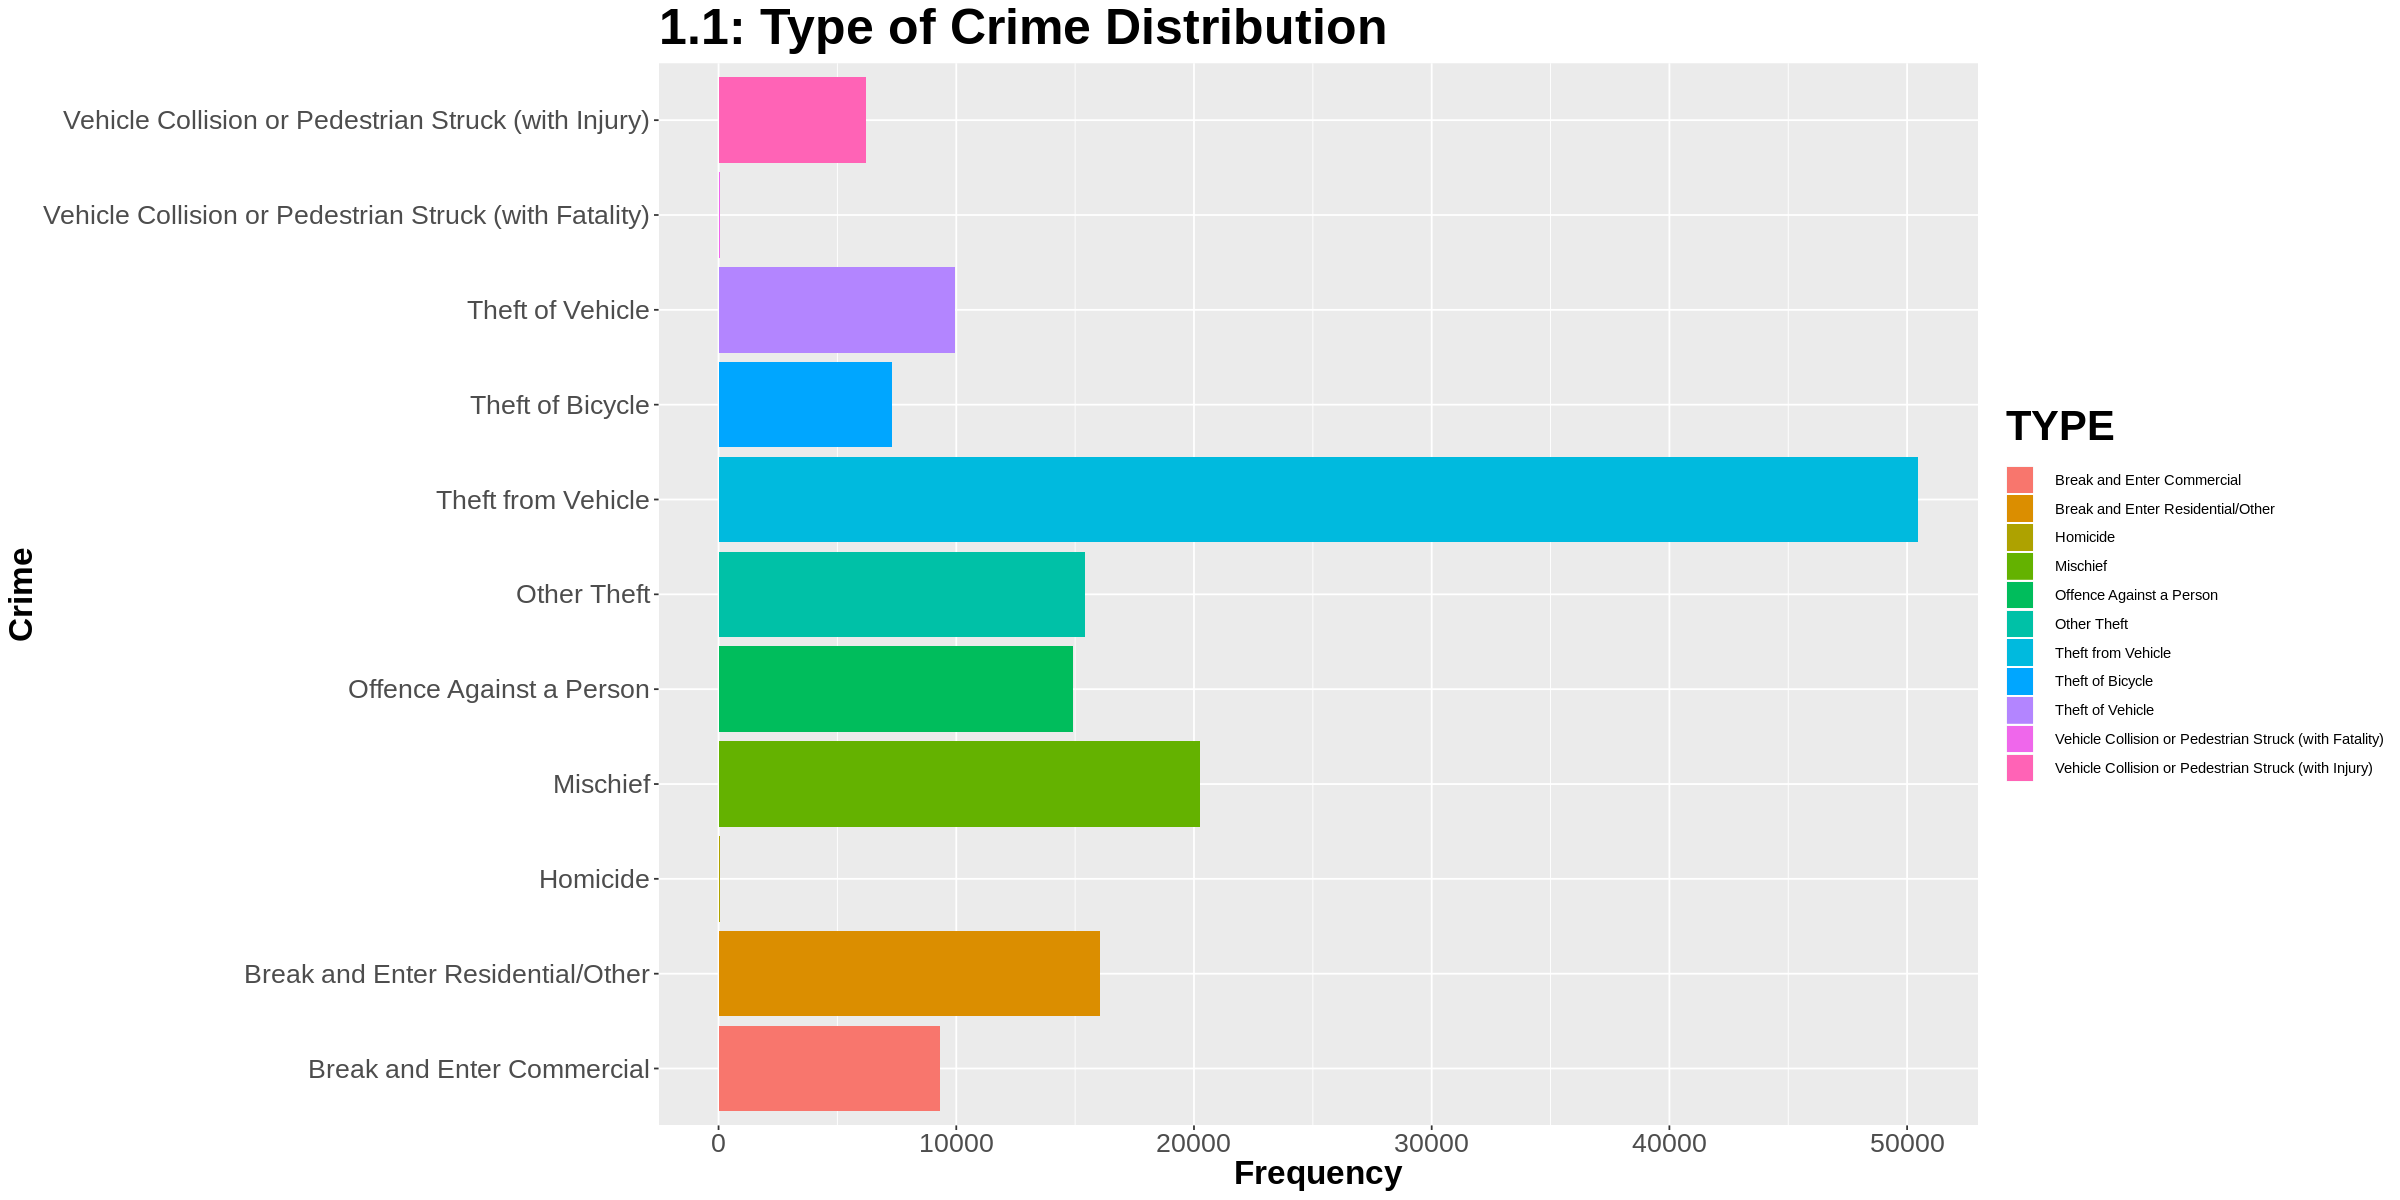

In [73]:
# Type of Crime Distribution
options(repr.plot.width=20, repr.plot.height=10)
type_dist_plot <- ggplot(crime, aes(x=TYPE, fill=TYPE)) +
    geom_bar() +
    labs(x="Crime", y="Frequency") +
    ggtitle("1.1: Type of Crime Distribution") +
    coord_flip() +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold"))
type_dist_plot

### Distribution of Crime Visualizations:

Immediately, it is noticeable that theft from vehicle takes up a massive majority of all crime happening in Vancouver this century. As a matter of fact, of the crimes available in this dataset, more than an entire third of all crime is taken up by this particular one! Not only the difference between theft from vehicles and all other crimes but other types of theft in general means that perhaps it might not be a good idea to group them given their difference in weight over all crime in Vancouver. Also, it appears that residential break and enters happen almost double as frequently as commercial ones do, perhaps due to the feasibility of the crime given that homes tend to have lower security than more public locations would. Moreover, traffick related accidents with fatality and homicide, the two crimes concerning the death of a victim, both are relatively rare in contrast to all other crimes. Many of these records have faulty records, however, so before delving into each particular vector of the dataset, we must filter out data that may mislead our predictions. Furthermore, using the entire dataset might be too crowding for certain visualizations, so we must create a subset to be used when needed.

In [74]:
# Clean crime dataset
crime <- na.omit(crime)
map_df(crime, function(col) sum(is.na(col)))
nrow(crime)

TYPE YEAR MONTH DAY HOUR MINUTE HUNDRED_BLOCK NEIGHBOURHOOD X Y
1 0    0    0     0   0    0      0             0             0 0

[1] 134360

## Time Data Visualization:
### Minute of Crime

Table 1.0

In [75]:
# Minute of Crime Distribution
num_obs <- nrow(crime)
min_dist <- crime %>% 
  group_by(MINUTE) %>% 
  summarize(n = n(),
            percentage = n() / num_obs * 100,
            standard = n()/n())
head(min_dist)

MINUTE n     percentage standard
1 0      57741 42.9748437 1       
2 1       1257  0.9355463 1       
3 2        737  0.5485263 1       
4 3        671  0.4994046 1       
5 4        713  0.5306639 1       
6 5       1269  0.9444775 1

### Hour of Crime

Table 2.0

HOUR n     percentage standard
1 18   10251 7.629503   1       
2 17    8856 6.591247   1       
3 19    8521 6.341917   1       
4 20    8093 6.023370   1       
5 22    8080 6.013695   1       
6  0    7627 5.676541   1

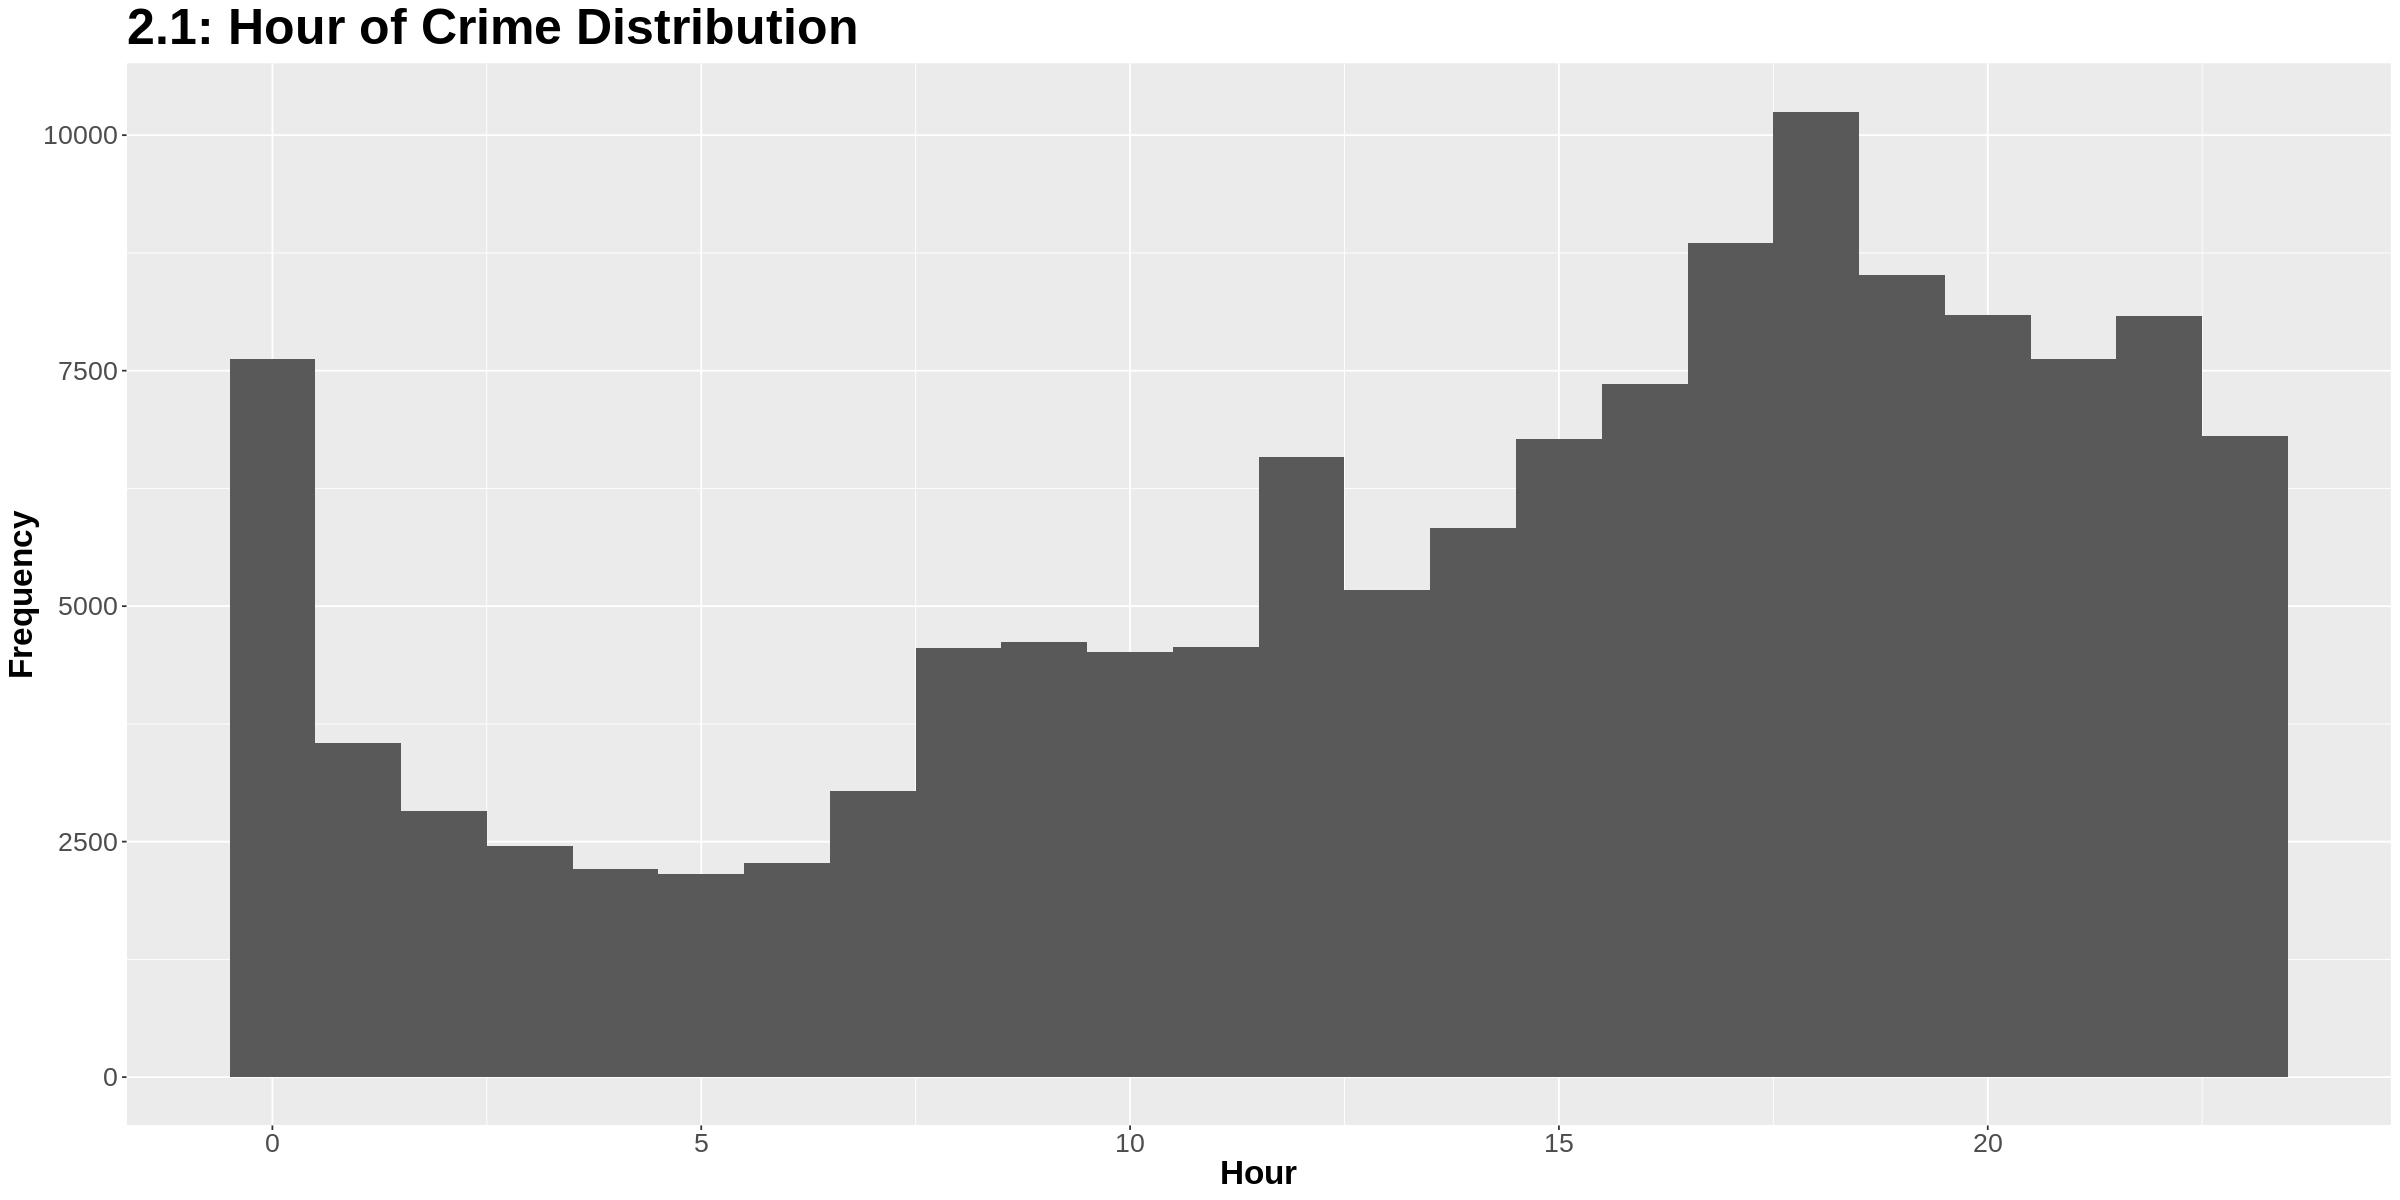

In [76]:
# Hour of crime distribution
num_obs <- nrow(crime)
hour_dist <- crime %>% 
  group_by(HOUR) %>% 
  summarize(n = n(),
            percentage = n() / num_obs * 100,
            standard = n()/n()) %>%
  arrange(desc(n))
head(hour_dist)

options(repr.plot.width=20, repr.plot.height=10)
hour_dist_plot <- ggplot(crime, aes(x=HOUR)) +
    geom_histogram(binwidth = 1) +
    labs(x="Hour", y="Frequency") +
    ggtitle("2.1: Hour of Crime Distribution") +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold"))
hour_dist_plot

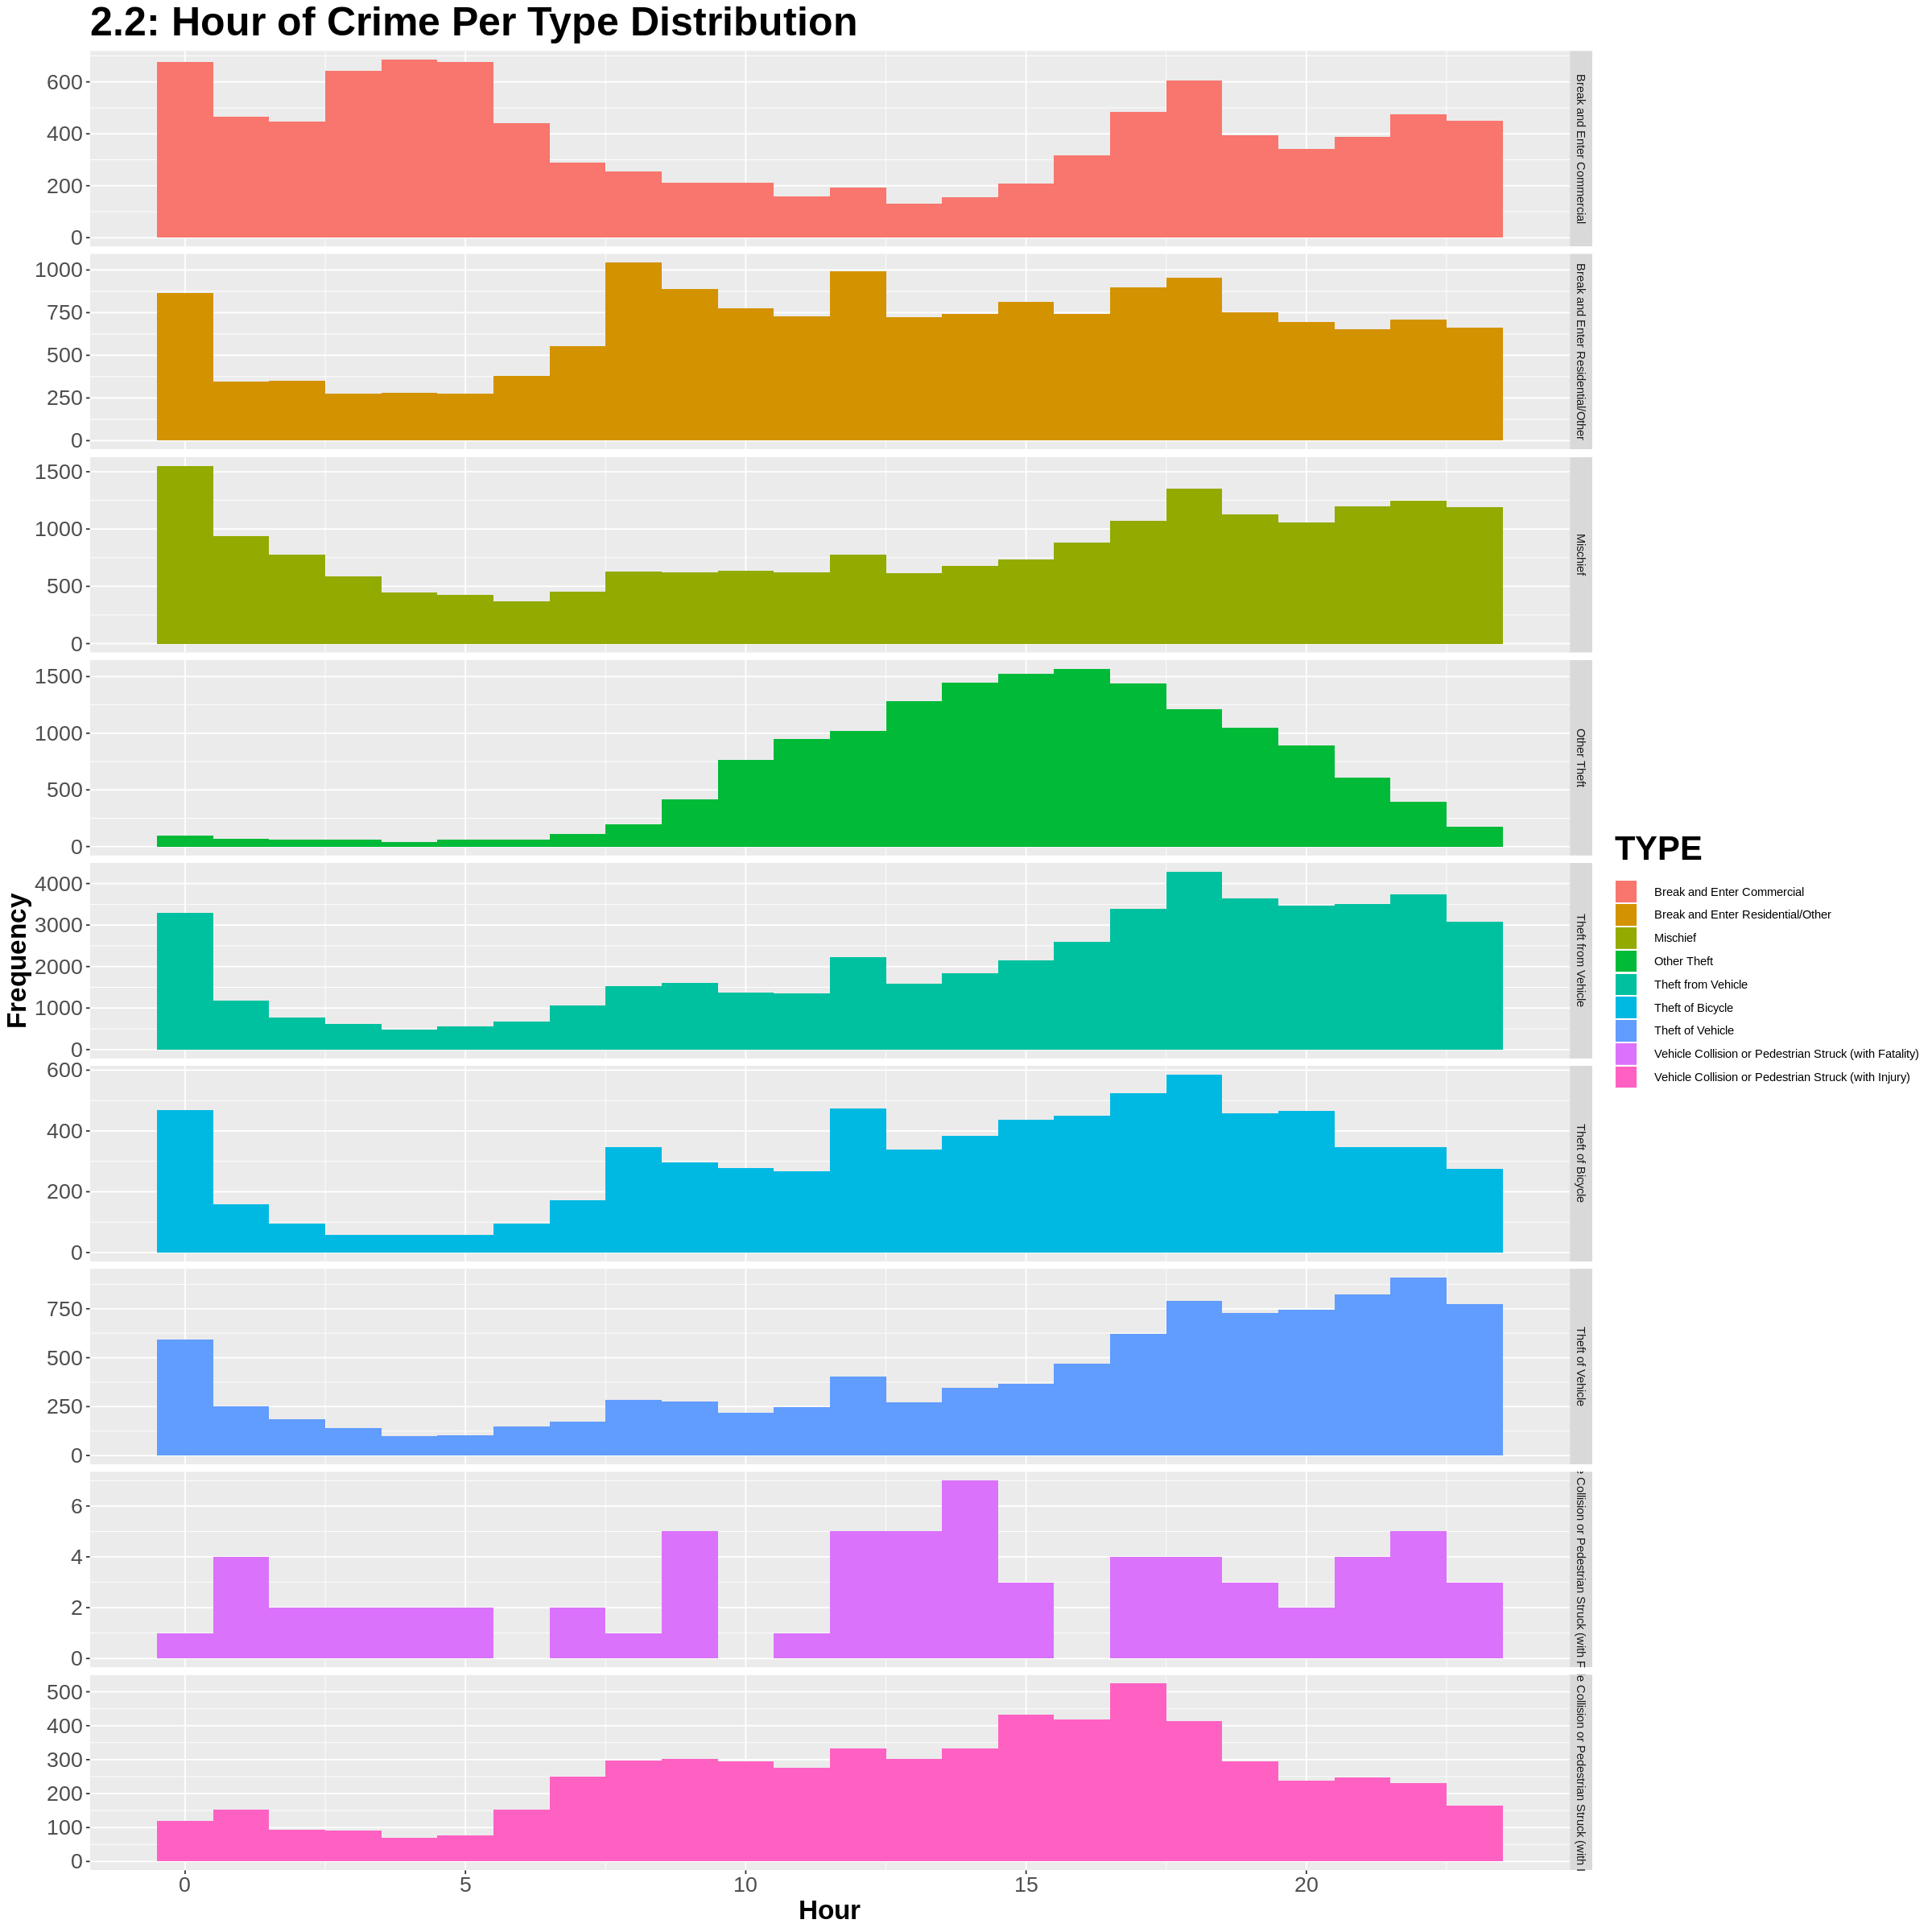

In [21]:
# Hour of crime per type distribution
options(repr.plot.width=20, repr.plot.height=20)
hour_dist_per_crime <- ggplot(crime, aes(x=HOUR, fill=TYPE)) +
    geom_histogram(binwidth = 1) +
    labs(x="Hour", y="Frequency") +
    ggtitle("2.2: Hour of Crime Per Type Distribution") +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold")) +
    facet_grid(TYPE ~ ., scales="free")
hour_dist_per_crime

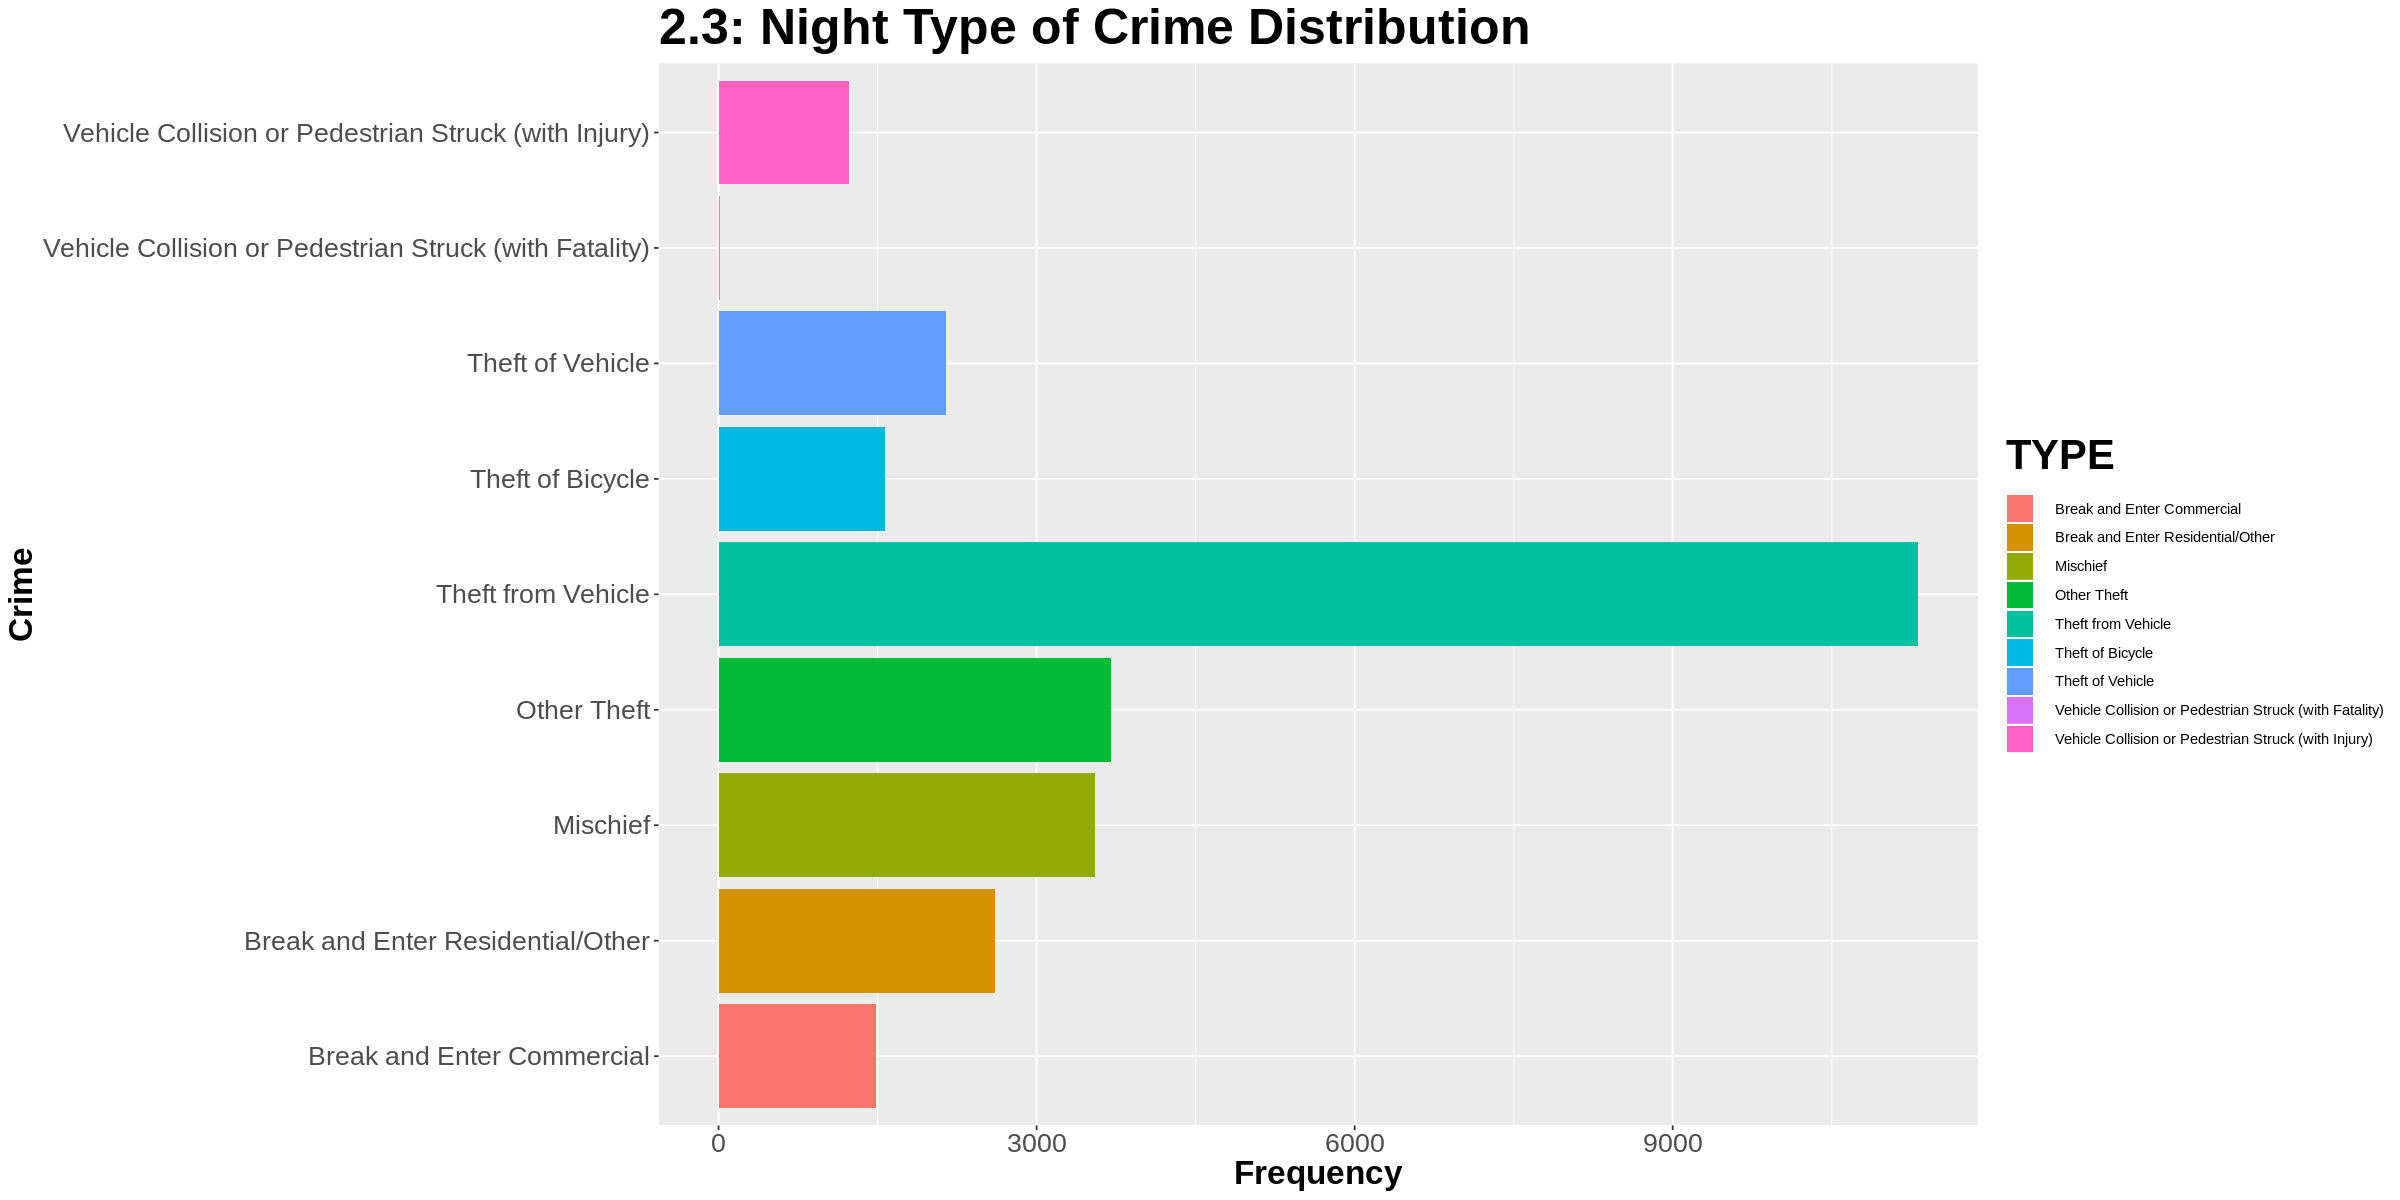

In [22]:
# Night crime distribution
options(repr.plot.width=20, repr.plot.height=10)
night_crime <- filter(crime, HOUR >= 17, HOUR <= 19)

cbd_dist_plot <- ggplot(night_crime, aes(x=TYPE, fill=TYPE)) +
    geom_bar() +
    labs(x="Crime", y="Frequency") +
    ggtitle("2.3: Night Type of Crime Distribution") +
    coord_flip() +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold"))
cbd_dist_plot

## Day of Crime

Table 3.0

DAY n    percentage standard
1 1   4661 3.466819   1       
2 2   4356 3.239963   1       
3 3   4392 3.266739   1       
4 4   4405 3.276408   1       
5 5   4451 3.310623   1       
6 6   4548 3.382771   1

DAY n    percentage standard
1 26  4009 2.981866   1       
2 27  3948 2.936495   1       
3 28  4056 3.016825   1       
4 29  3855 2.867322   1       
5 30  3923 2.917900   1       
6 31  2694 2.003778   1

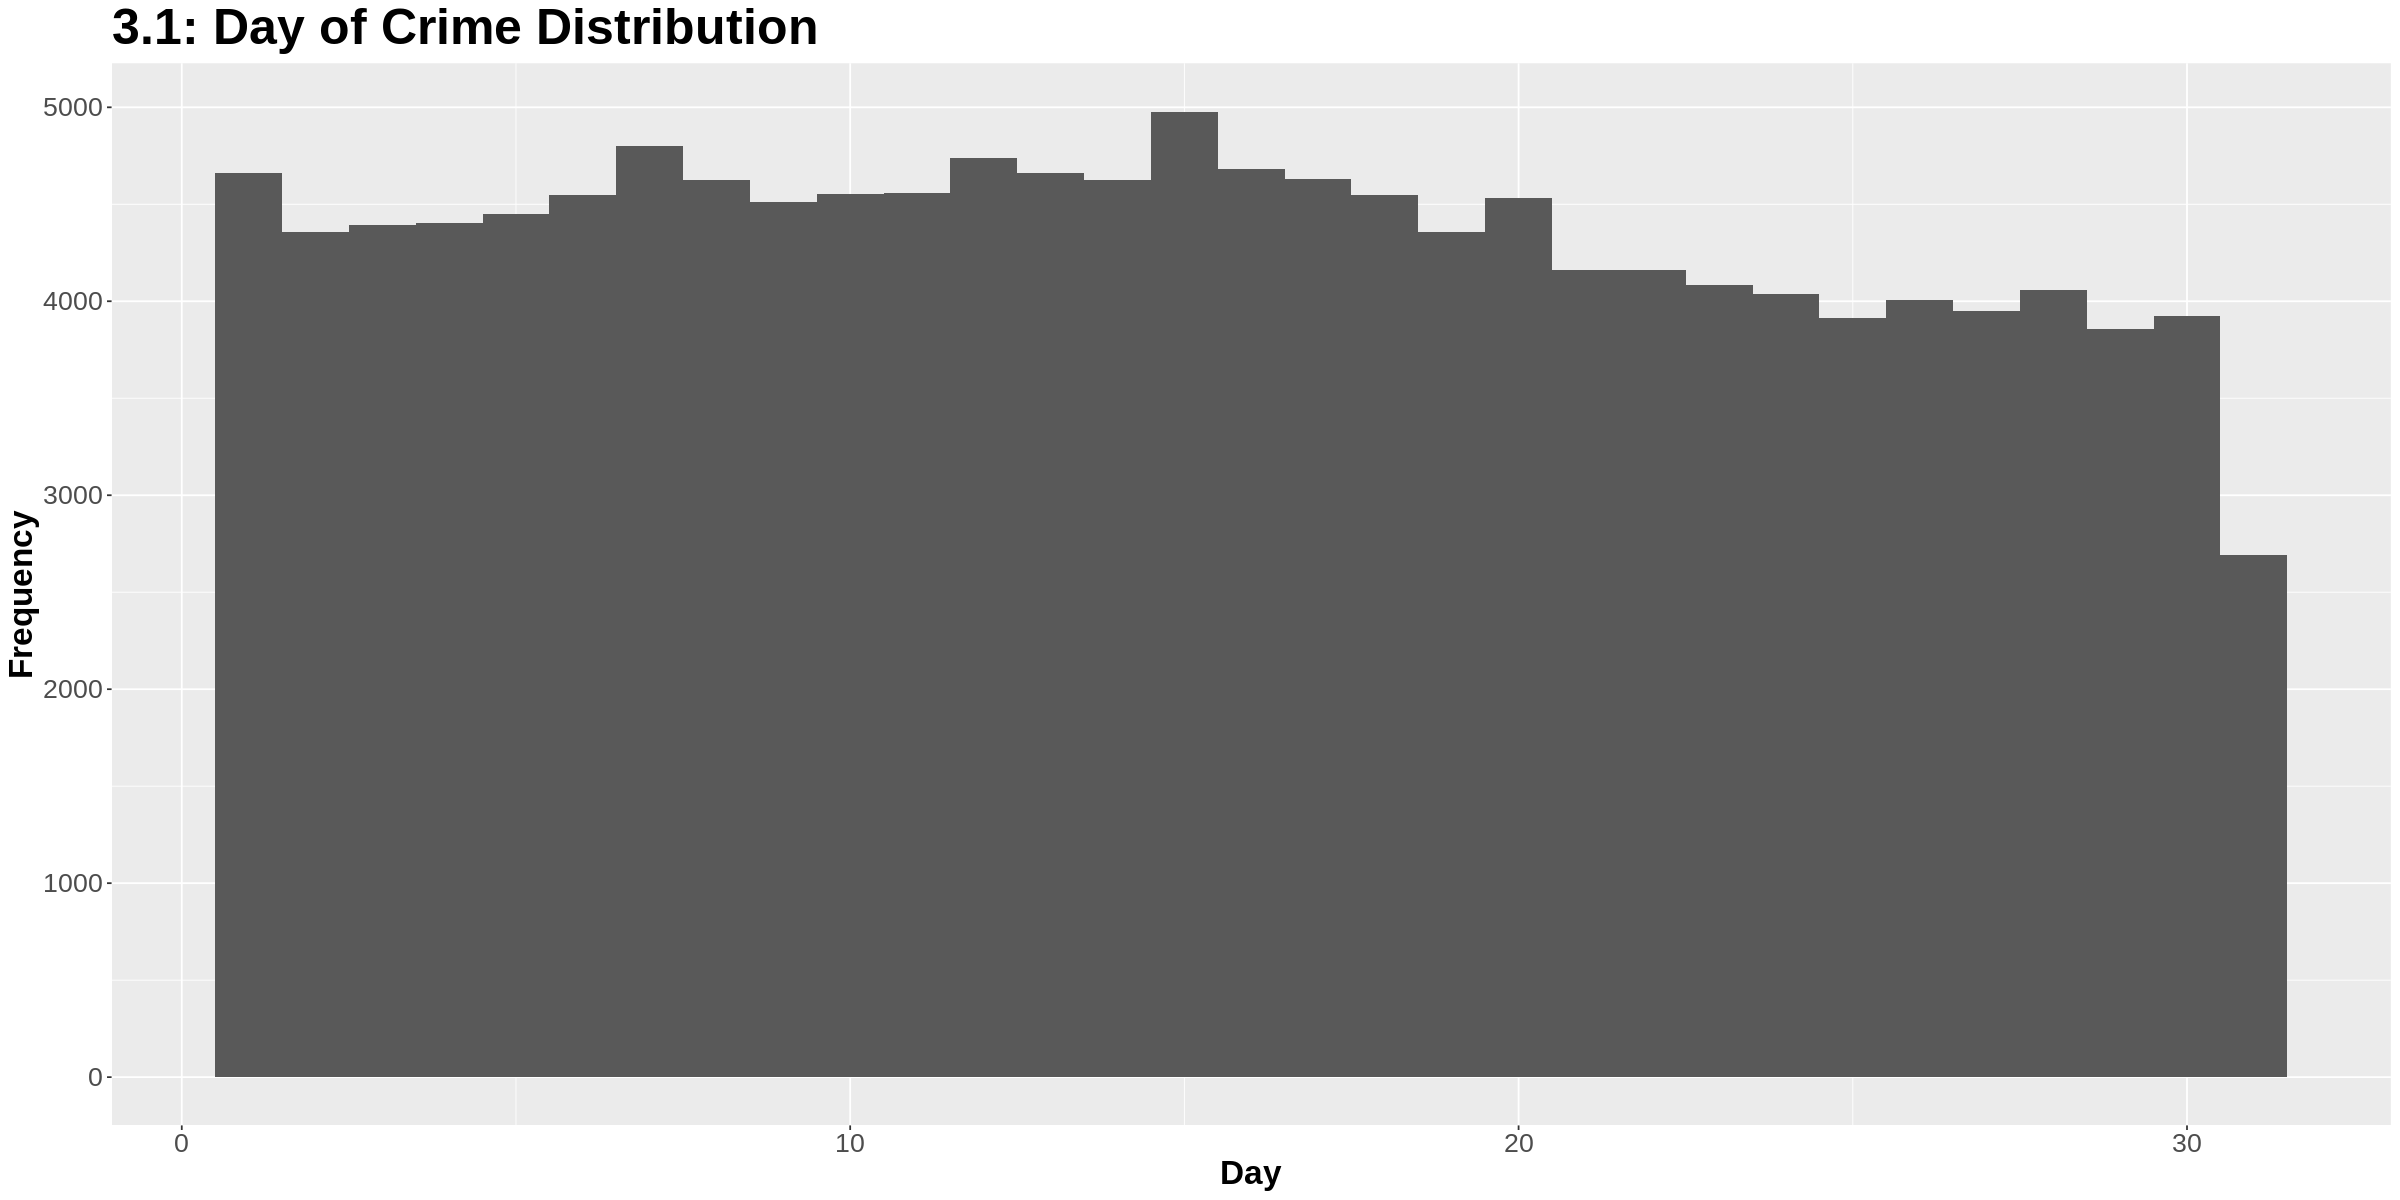

In [23]:
# Day of crime distribution
num_obs <- nrow(crime)
day_dist <- crime %>% 
  group_by(DAY) %>% 
  summarize(n = n(),
            percentage = n() / num_obs * 100,
            standard = n()/n())
head(day_dist)
tail(day_dist)

options(repr.plot.width=20, repr.plot.height=10)
day_dist_plot <- ggplot(crime, aes(x=DAY)) +
    geom_histogram(binwidth = 1) +
    labs(x="Day", y="Frequency") +
    ggtitle("3.1: Day of Crime Distribution") +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold"))
day_dist_plot

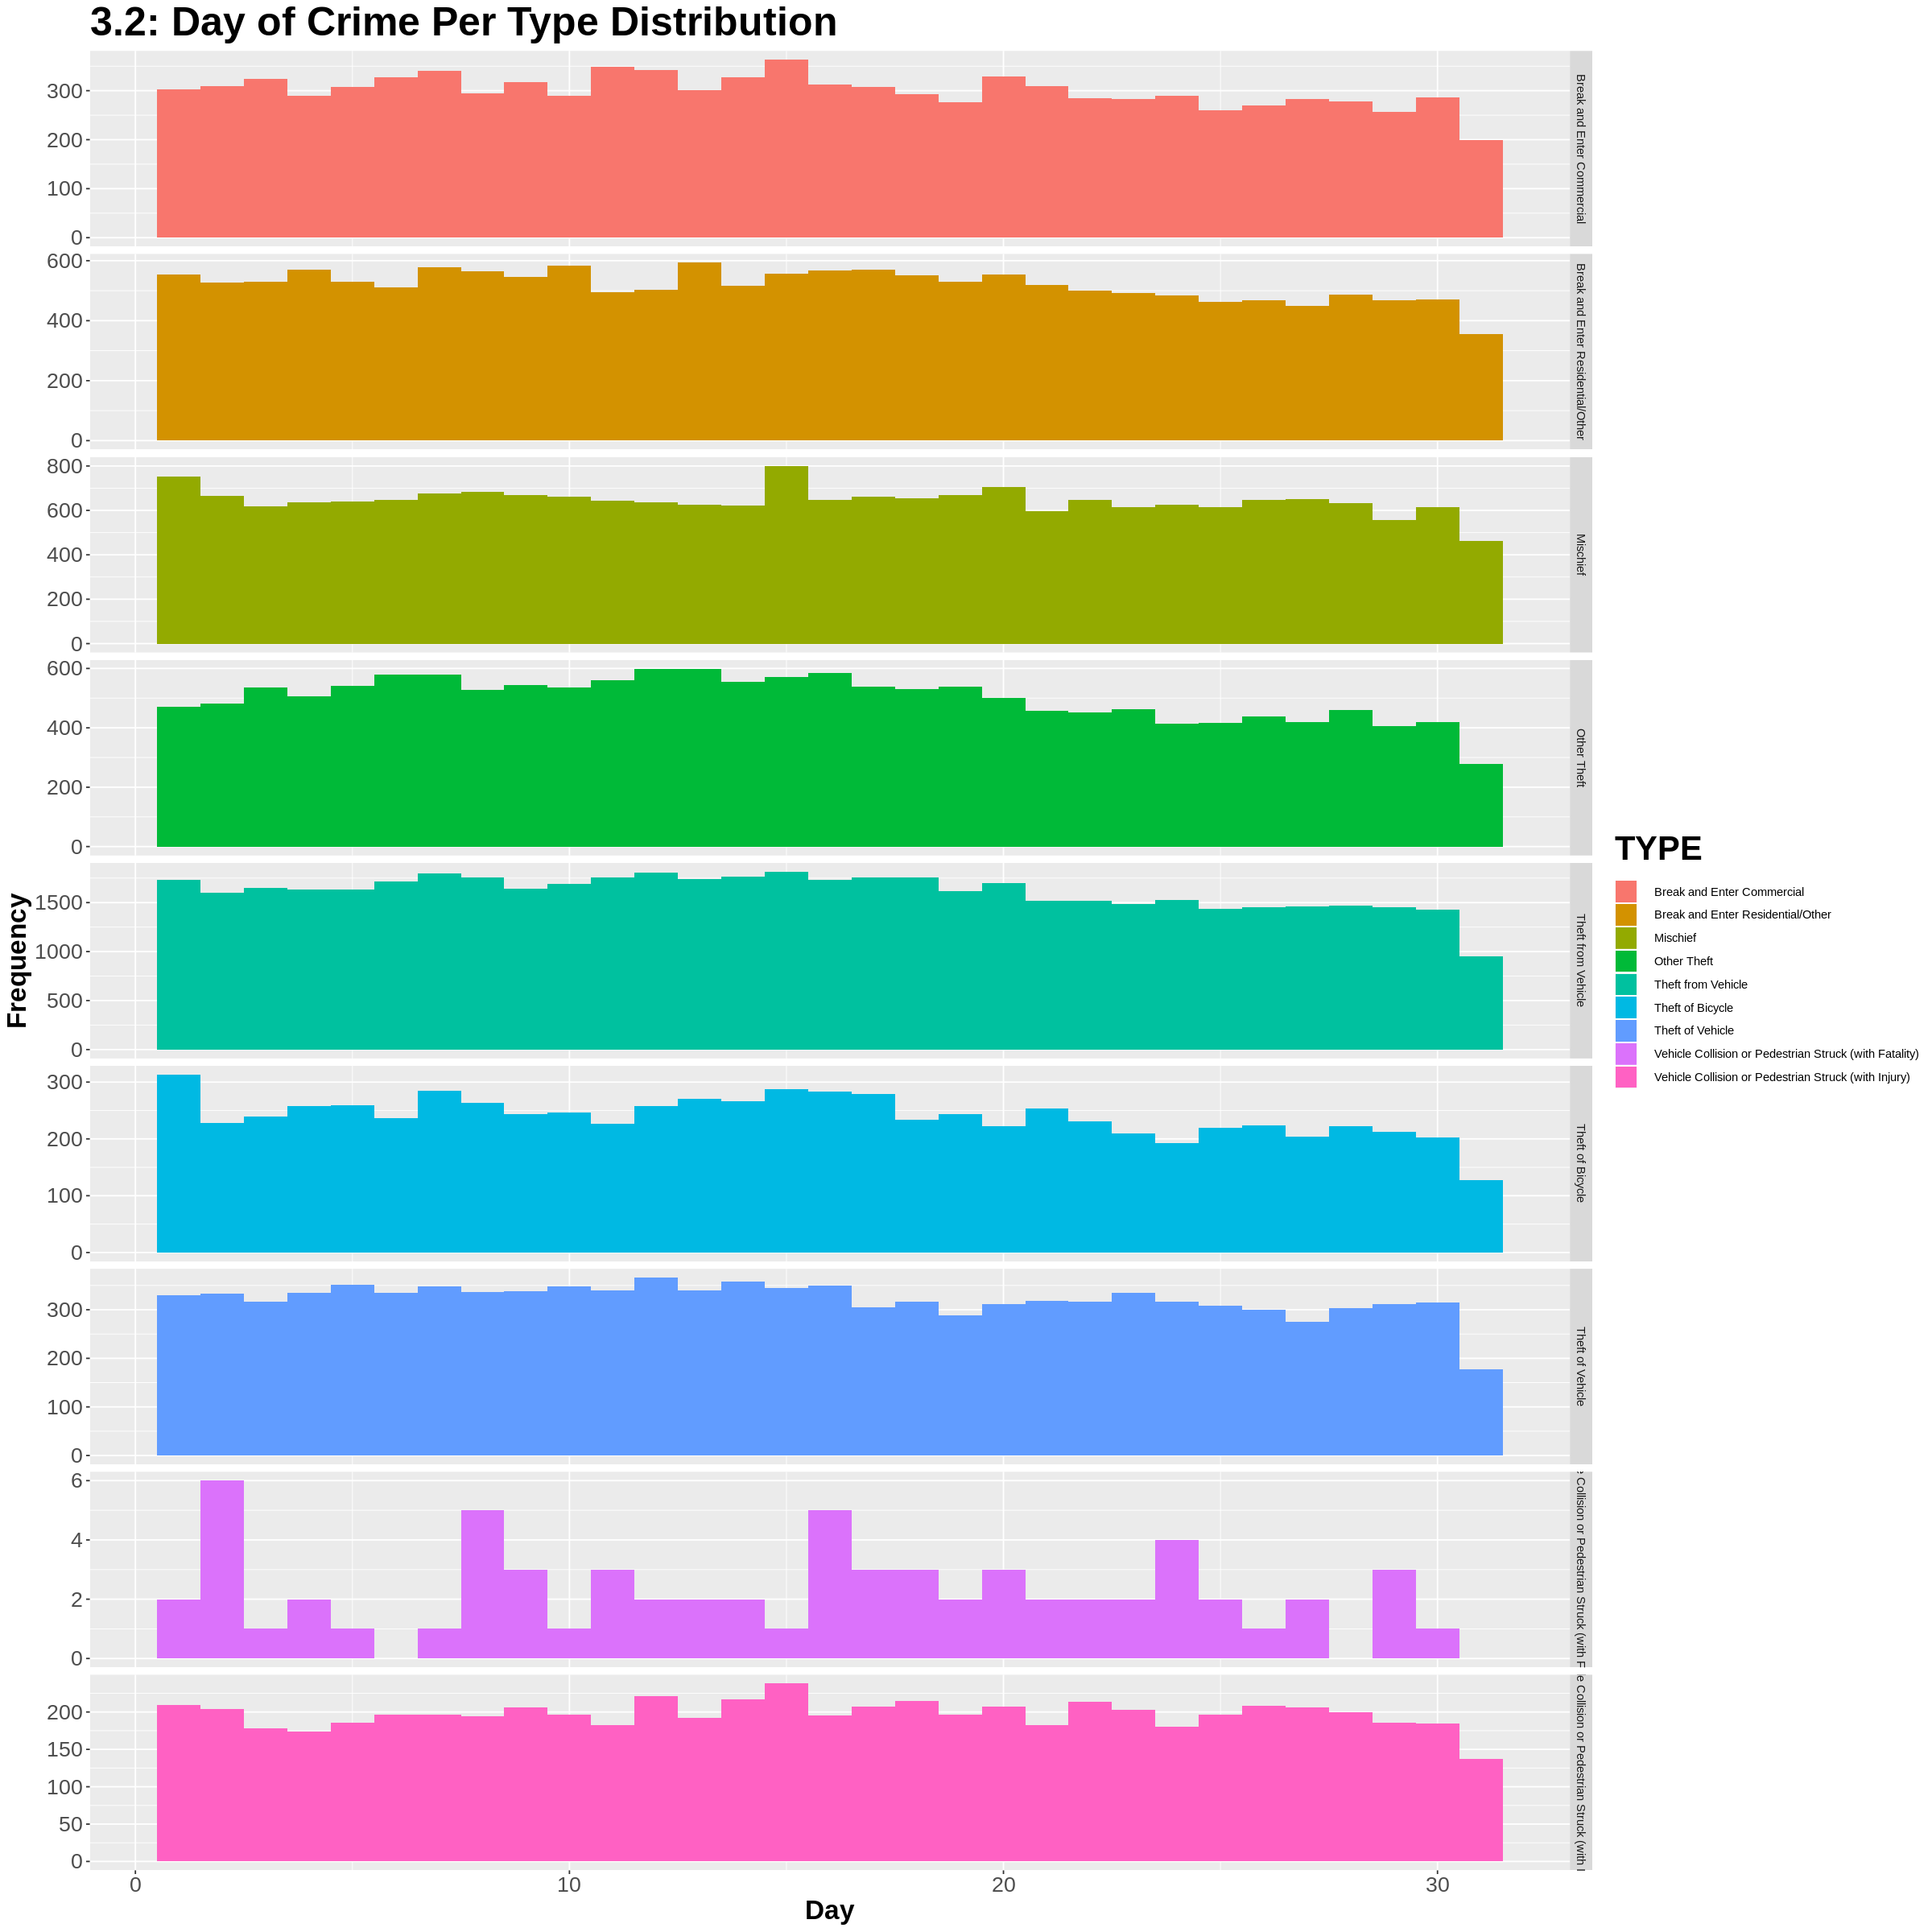

In [24]:
# Day of crime per type distribution
options(repr.plot.width=20, repr.plot.height=20)
day_dist_per_crime <- ggplot(crime, aes(x=DAY, fill=TYPE)) +
    geom_histogram(binwidth = 1) +
    labs(x="Day", y="Frequency") +
    ggtitle("3.2: Day of Crime Per Type Distribution") +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold")) +
    facet_grid(TYPE ~ ., scales="free")
day_dist_per_crime

## Month of Crime

Table 4.0

MONTH n     percentage
1  8    12214 9.084688  
2 10    11837 8.804278  
3  6    11696 8.699403  
4  9    11660 8.672627  
5  7    11536 8.580397  
6  5    11517 8.566265

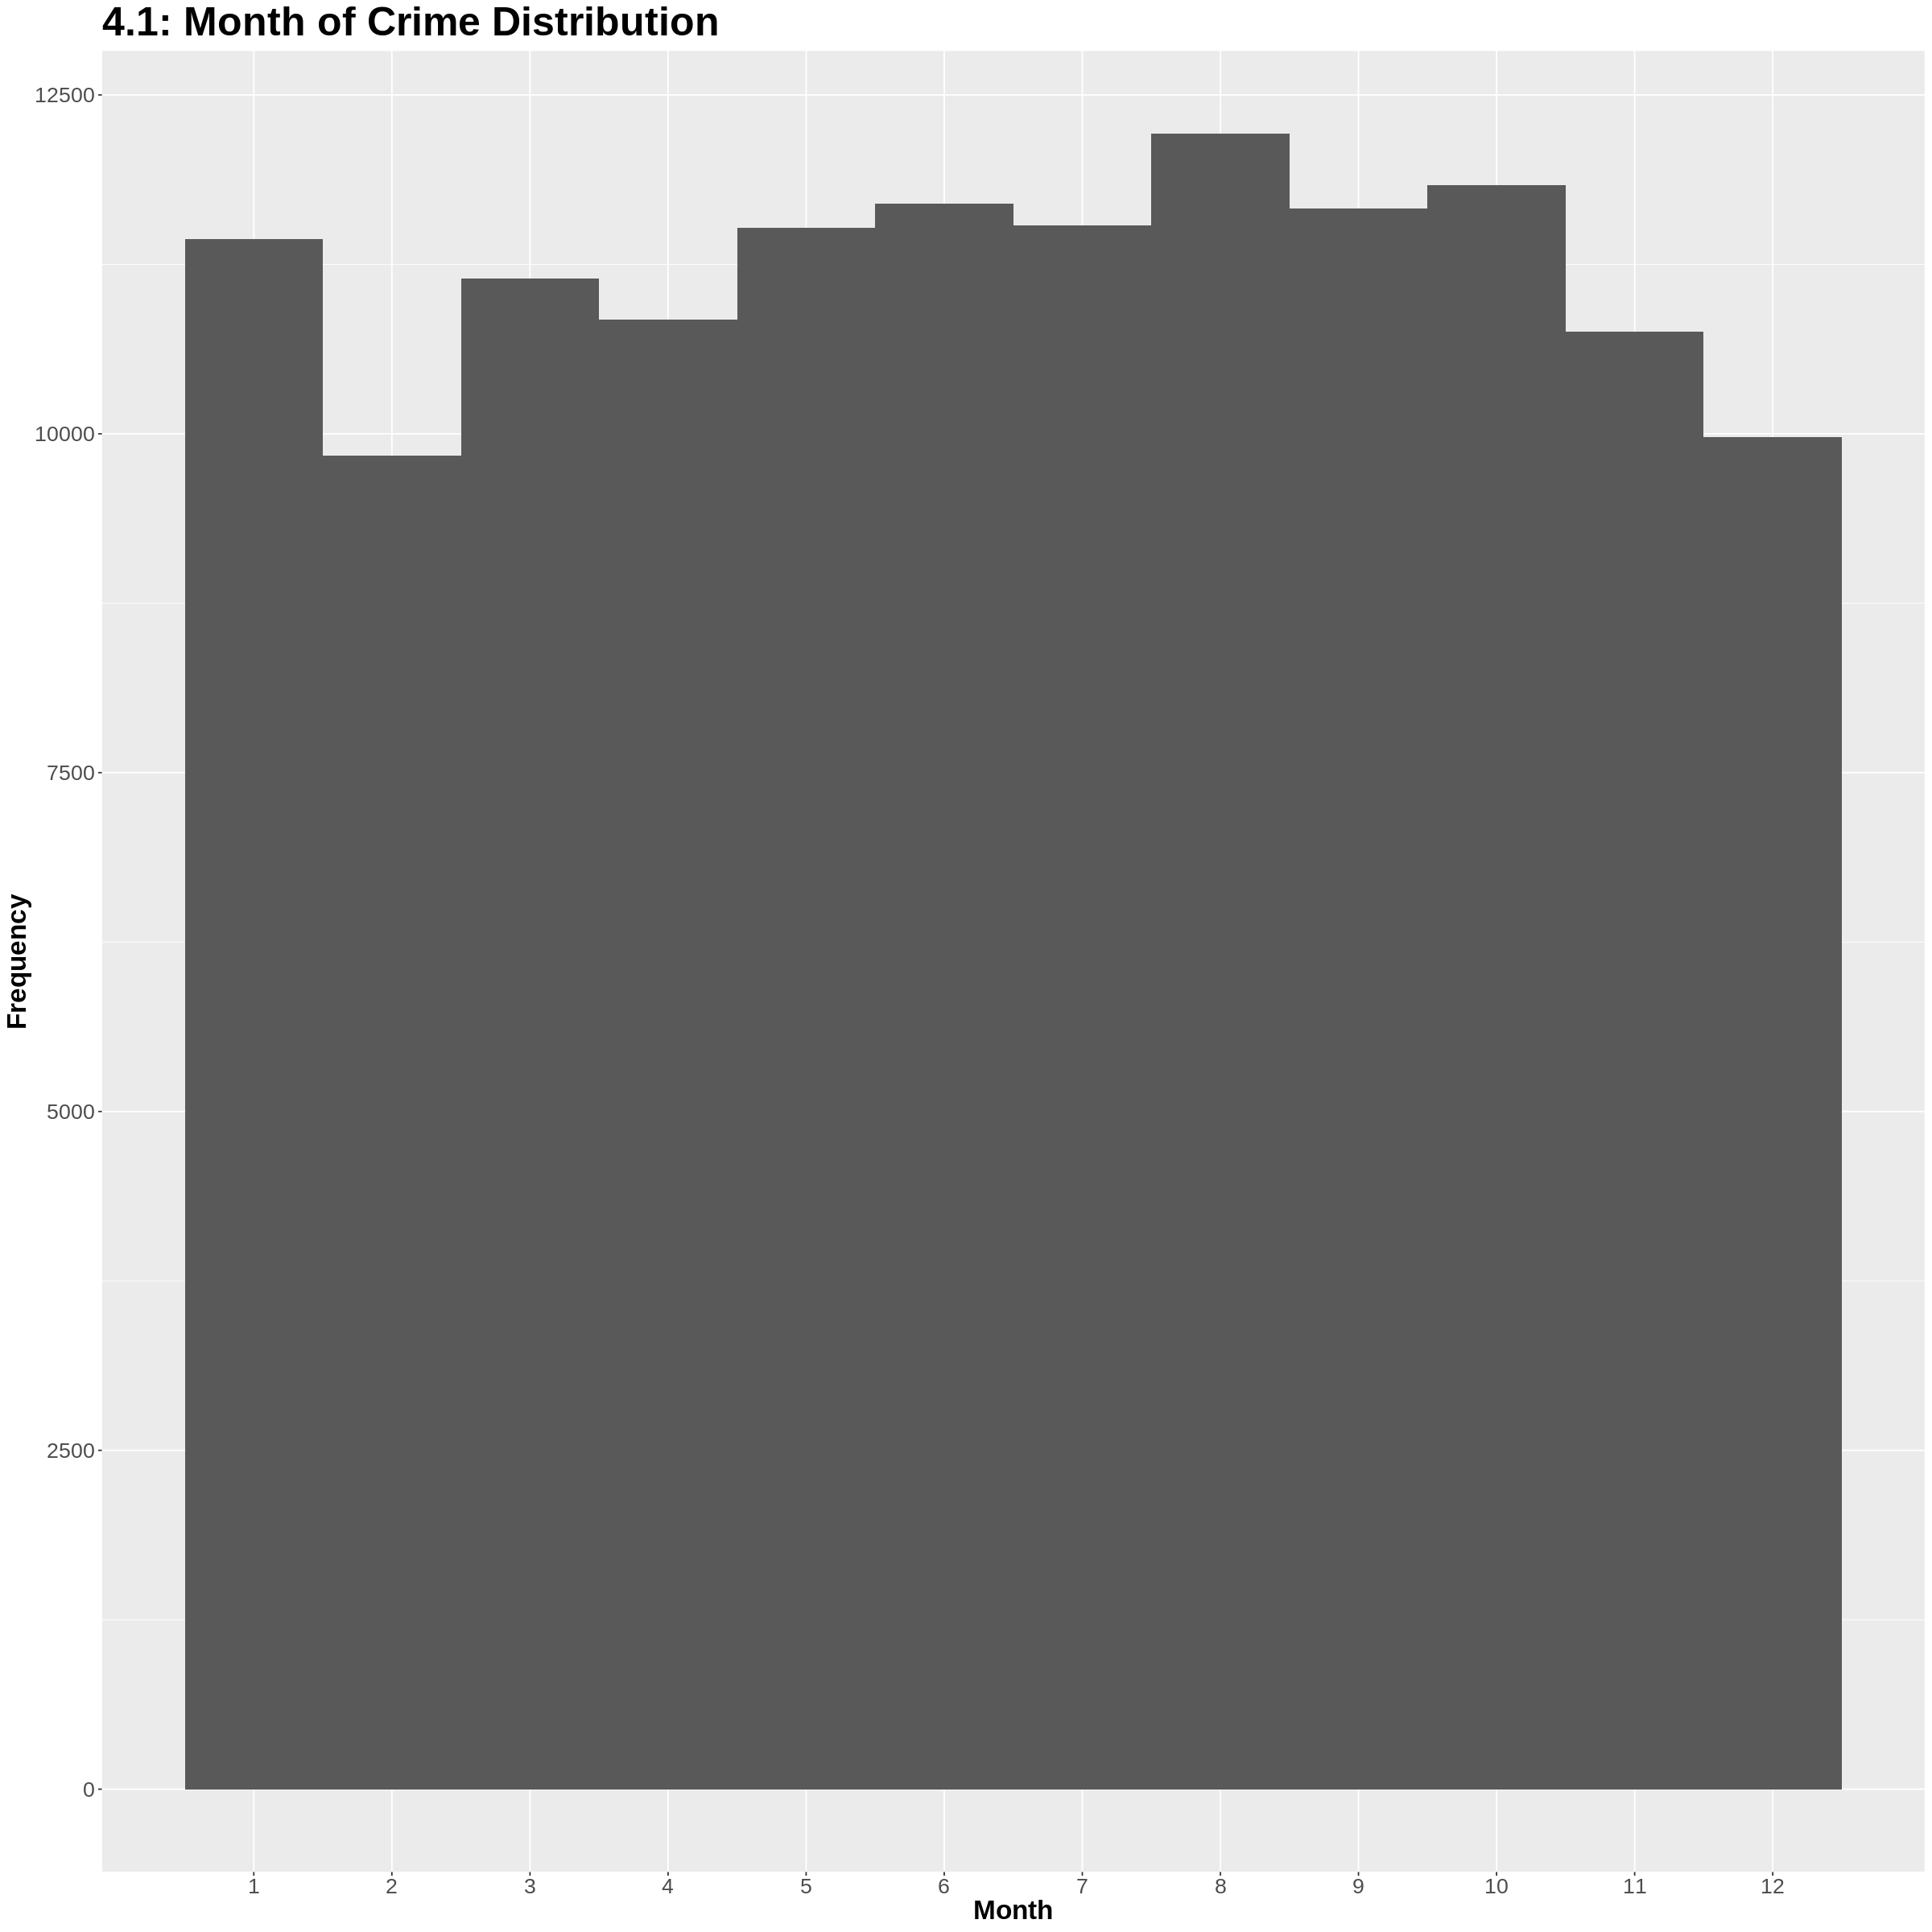

In [25]:
# Month of crime distribution
num_obs <- nrow(crime)
month_dist <- crime %>% 
  group_by(MONTH) %>% 
  summarize(n = n(),
            percentage = n() / num_obs * 100)%>%
  arrange(desc(n))
head(month_dist)

month_dist_plot <- ggplot(crime, aes(x=MONTH)) +
    geom_histogram(binwidth = 1) +
    labs(x="Month", y="Frequency") +
    ggtitle("4.1: Month of Crime Distribution") +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold")) +
    scale_x_discrete(limits=c("1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"))
month_dist_plot

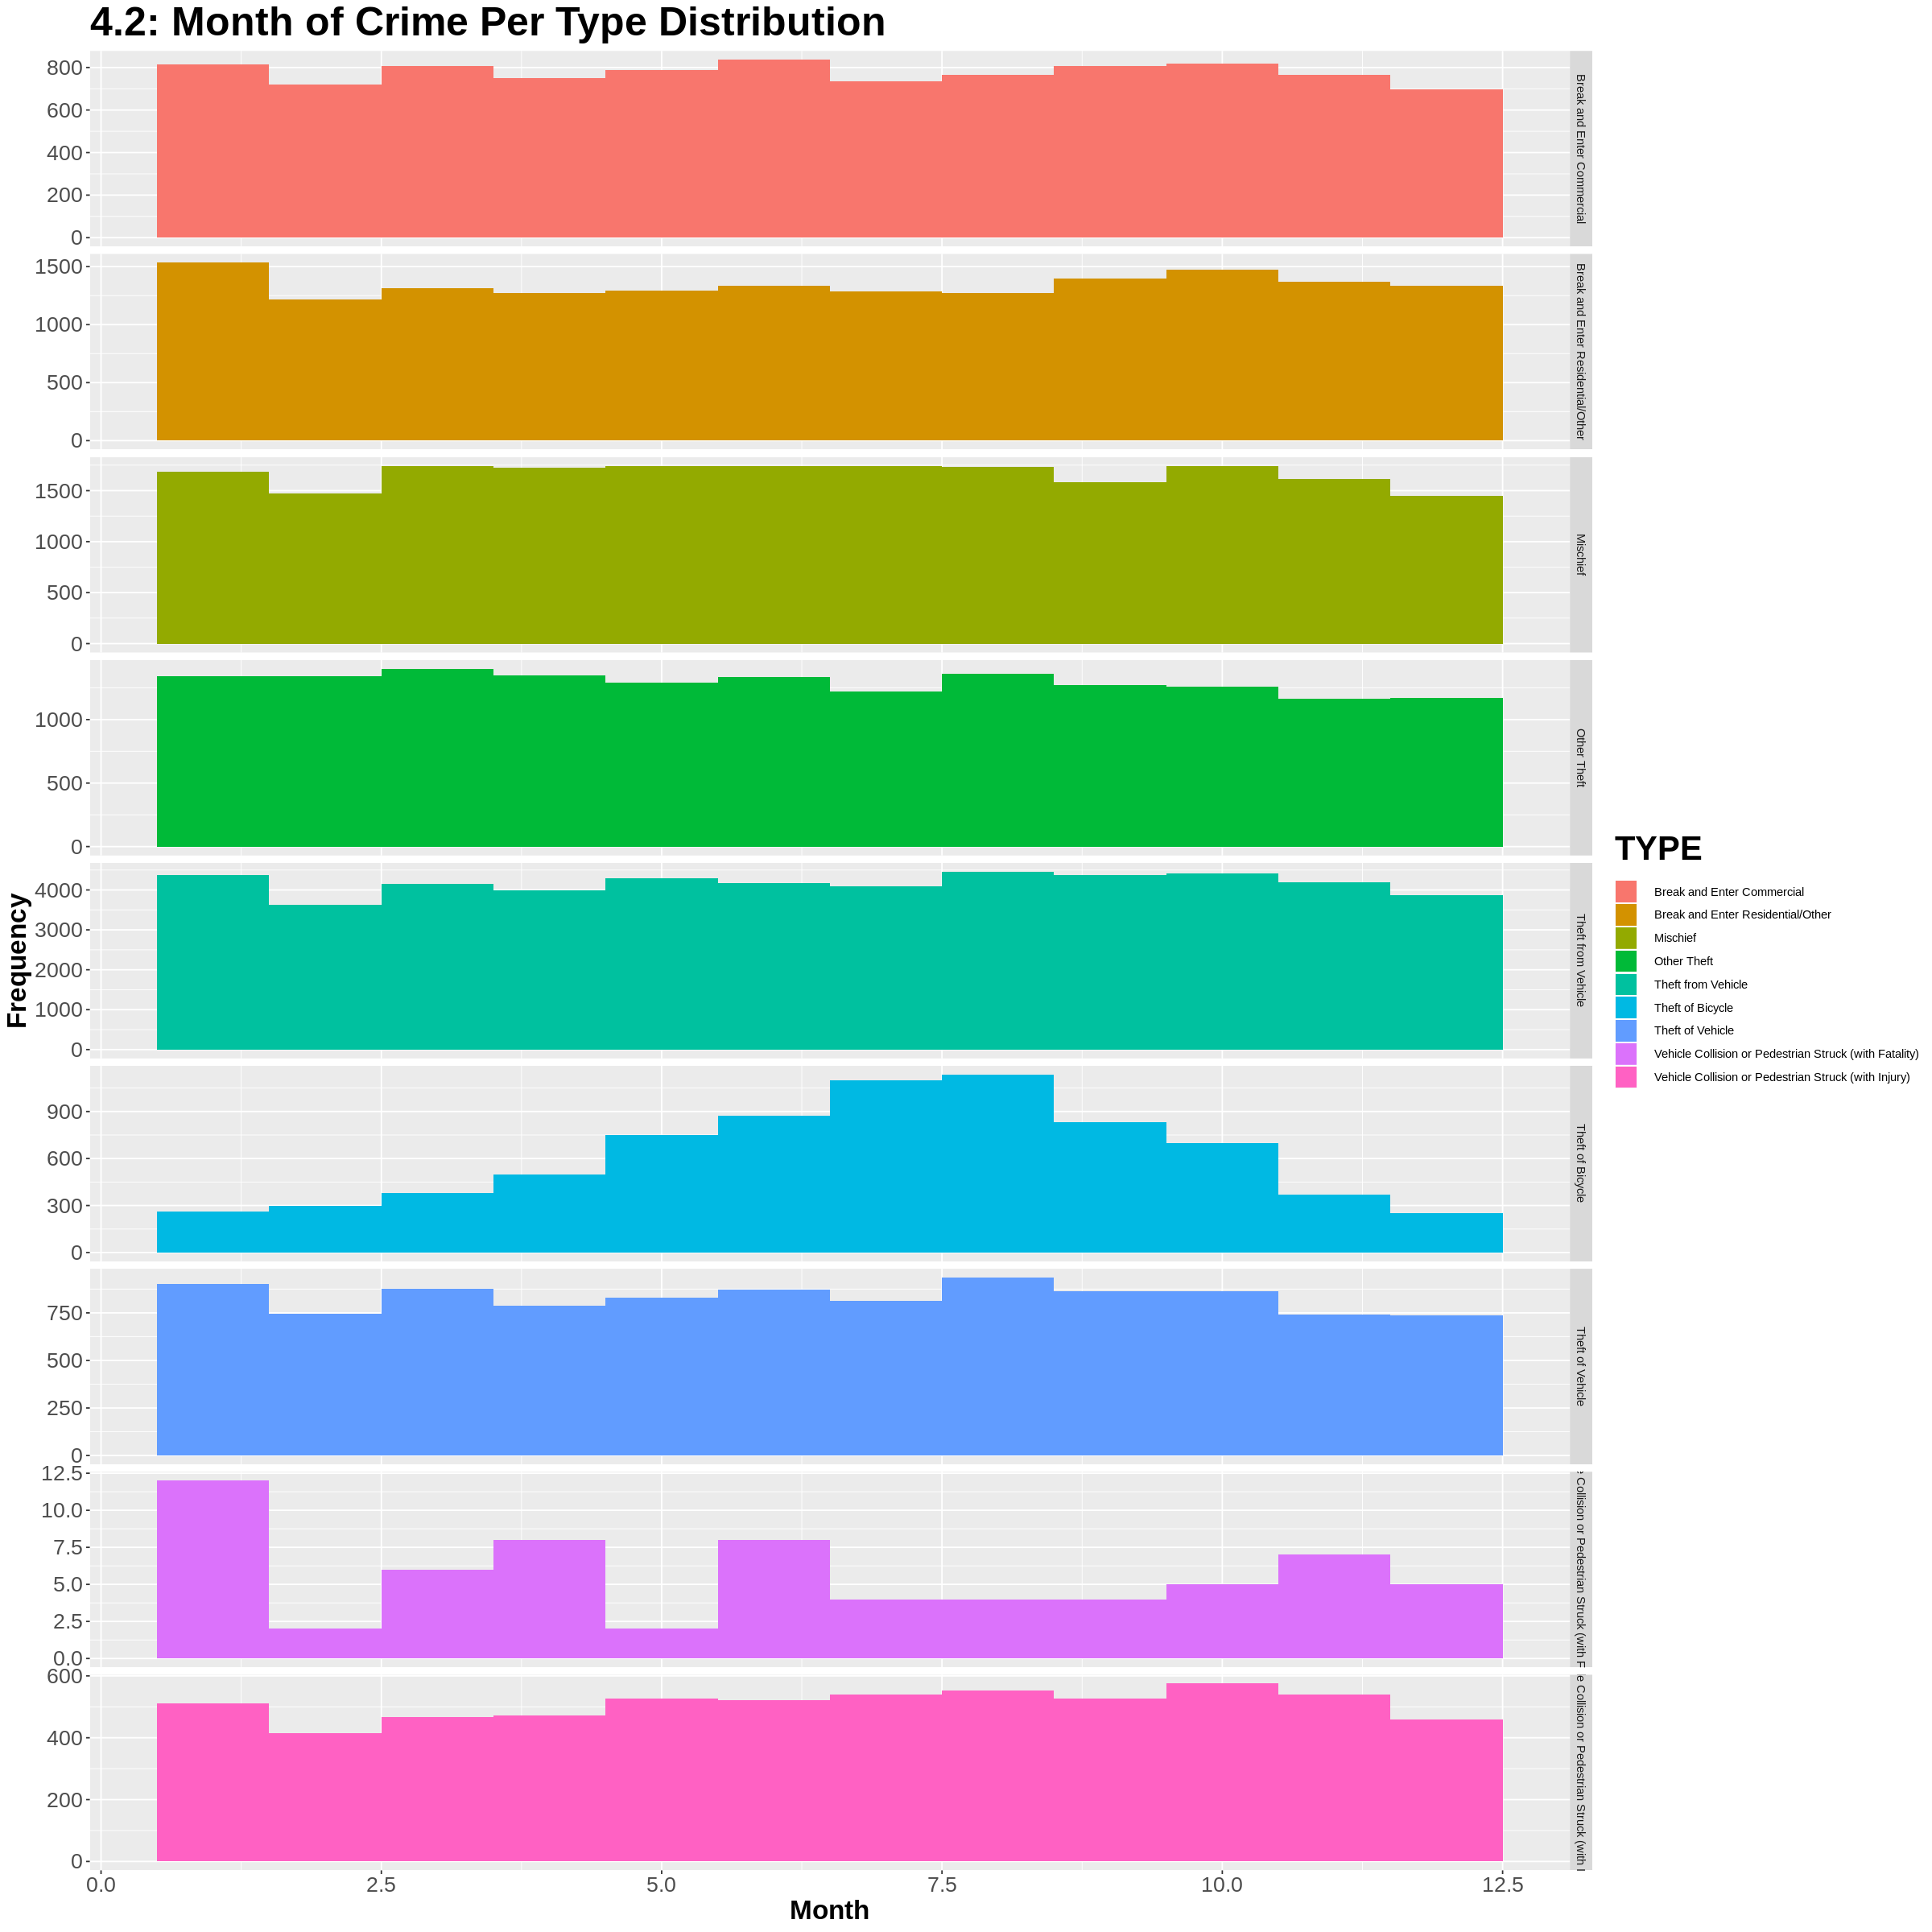

In [26]:
# Month of crime per type distribution
options(repr.plot.width=20, repr.plot.height=20)
month_dist_per_crime <- ggplot(crime, aes(x=MONTH, fill=TYPE)) +
    geom_histogram(binwidth = 1) +
    labs(x="Month", y="Frequency") +
    ggtitle("4.2: Month of Crime Per Type Distribution") +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold")) +
    facet_grid(TYPE ~ ., scales="free")
month_dist_per_crime

## Year of Crime

Table 5.0

YEAR n     percentage
1 2003 11089 8.247921  
2 2004 10954 8.147509  
3 2005  9697 7.212561  
4 2006  9004 6.697113  
5 2007  8008 5.956295  
6 2008  7510 5.585886

YEAR n    percentage
1 2014 7085 5.269774  
2 2015 7399 5.503325  
3 2016 8256 6.140755  
4 2017 8194 6.094640  
5 2018 8408 6.253812  
6 2019 7810 5.809024

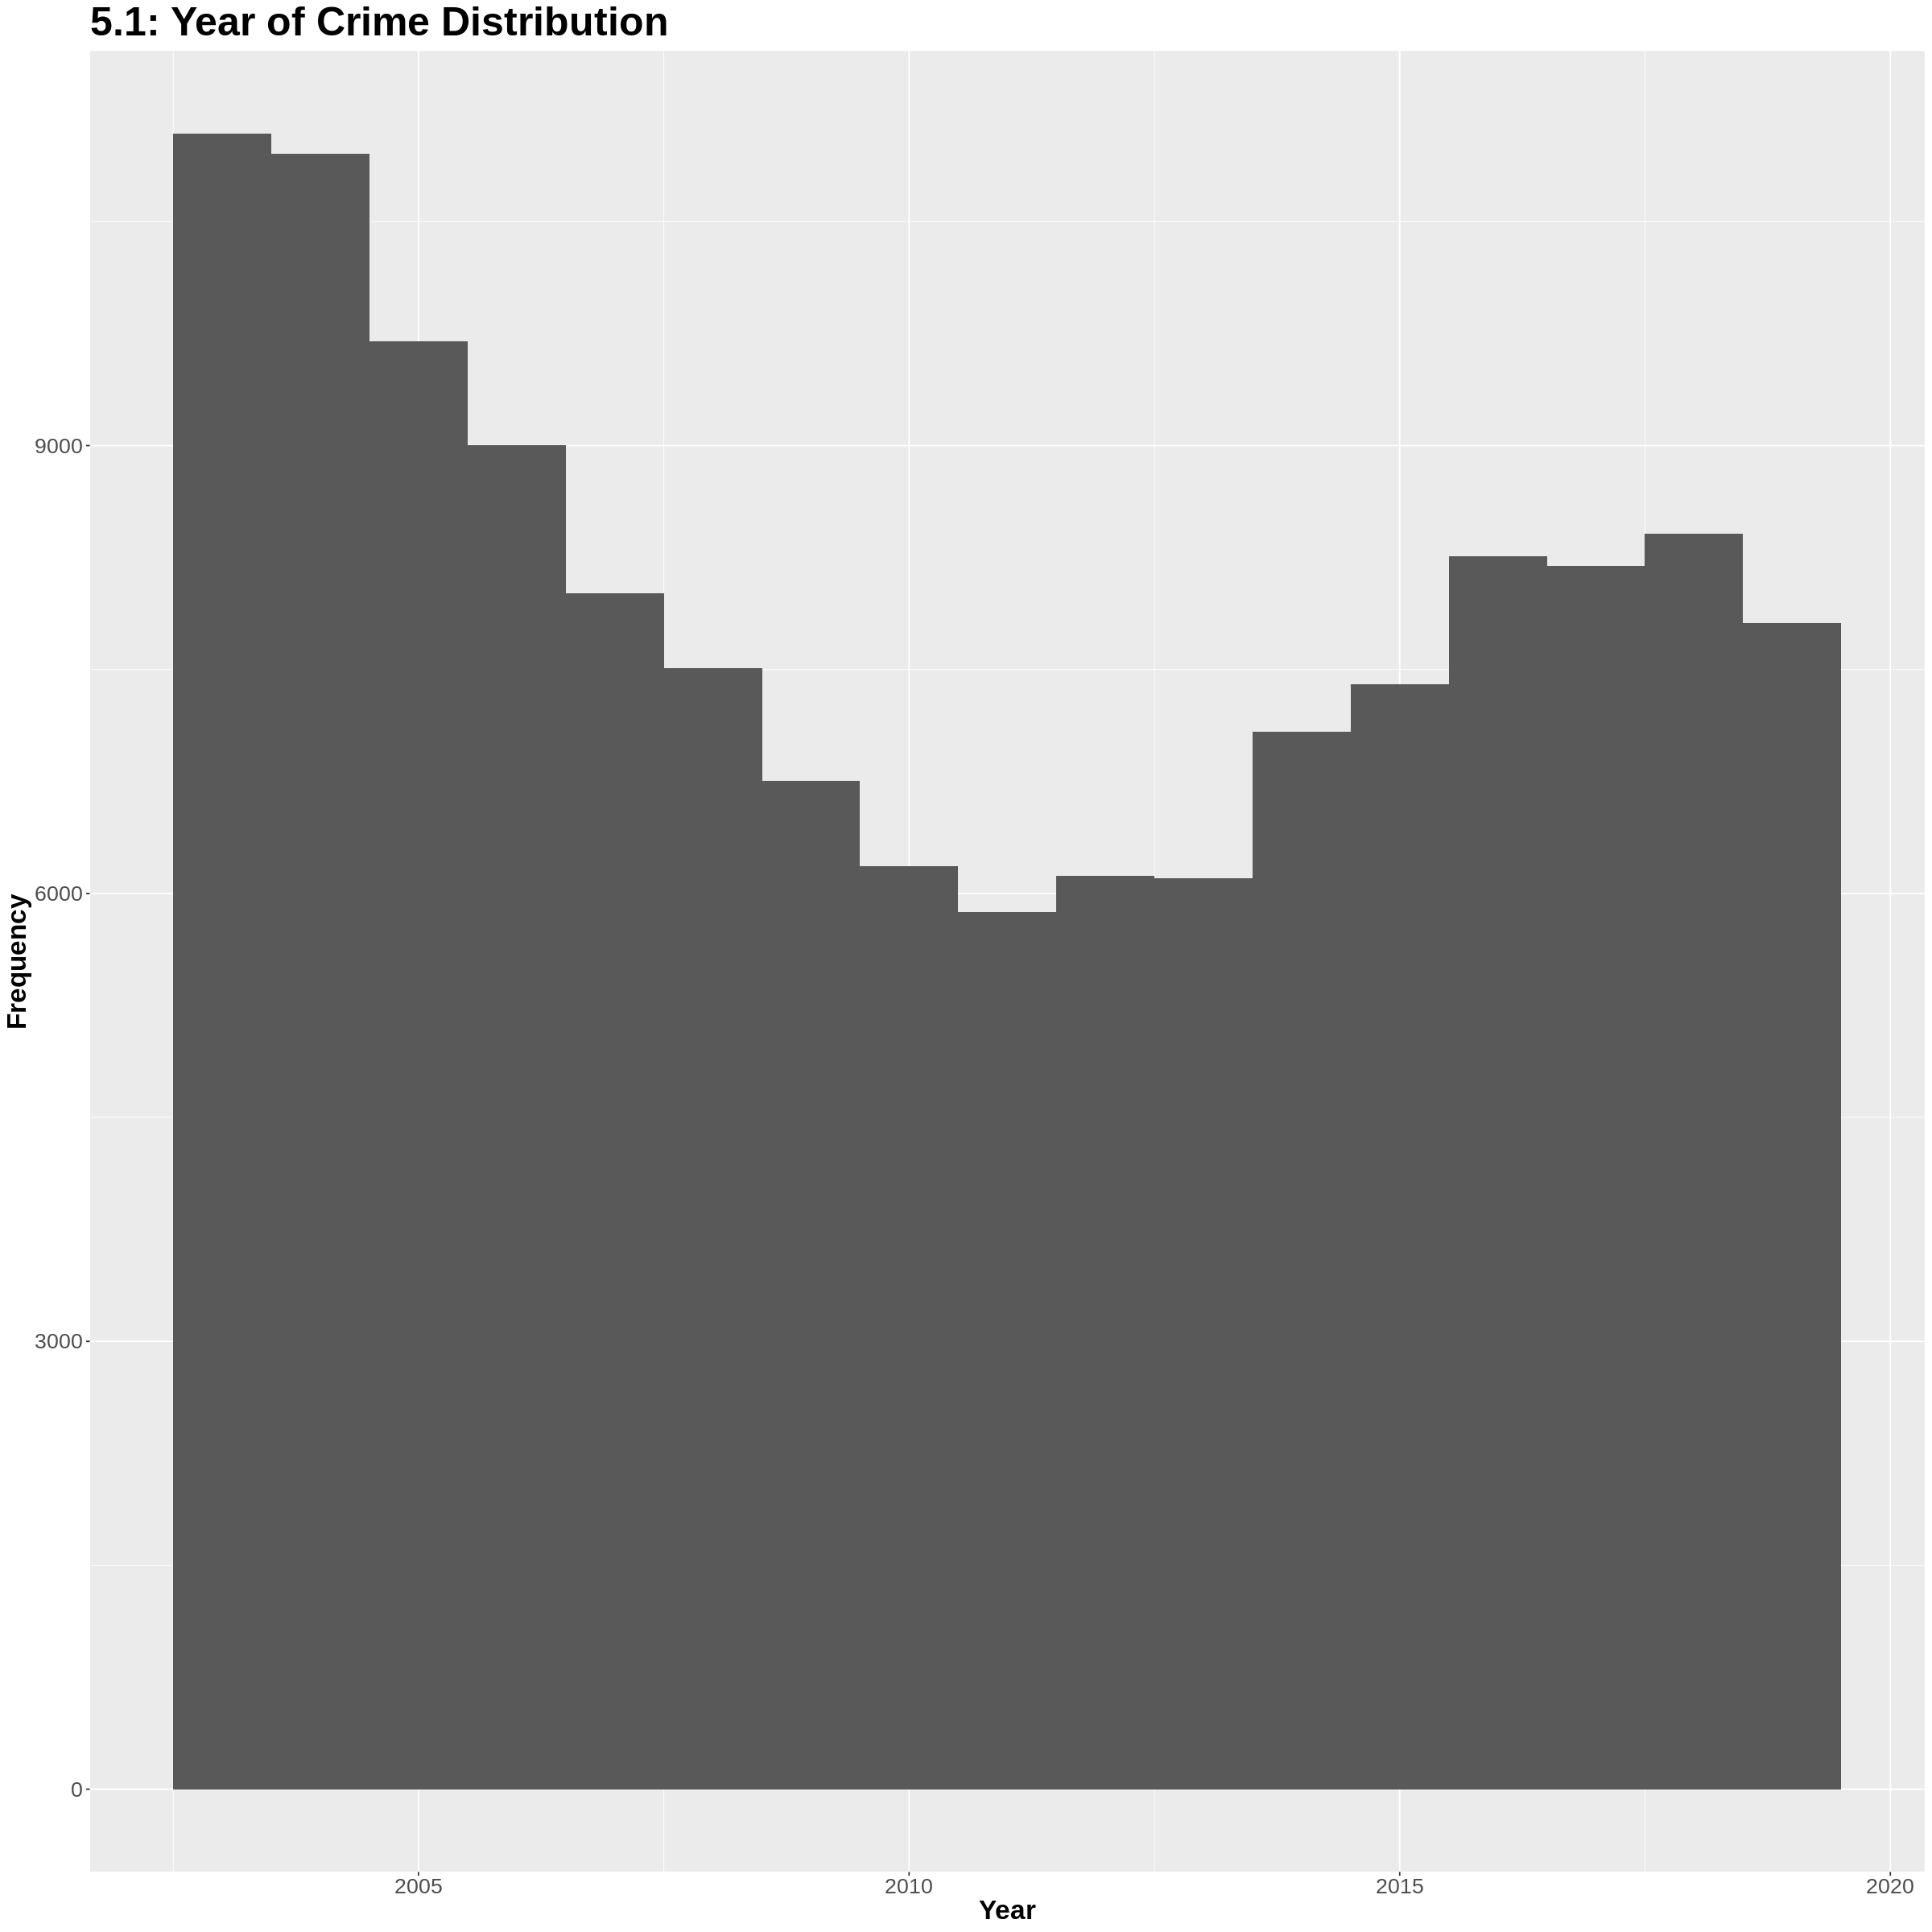

In [27]:
# Year of crime distribution
num_obs <- nrow(crime)
year_dist <- crime %>% 
  group_by(YEAR) %>% 
  summarize(n = n(),
            percentage = n() / num_obs * 100)
head(year_dist)
tail(year_dist)


year_dist_plot <- ggplot(crime, aes(x=YEAR)) +
    geom_histogram(binwidth = 1) +
    labs(x="Year", y="Frequency") +
    ggtitle("5.1: Year of Crime Distribution") +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold"))
year_dist_plot

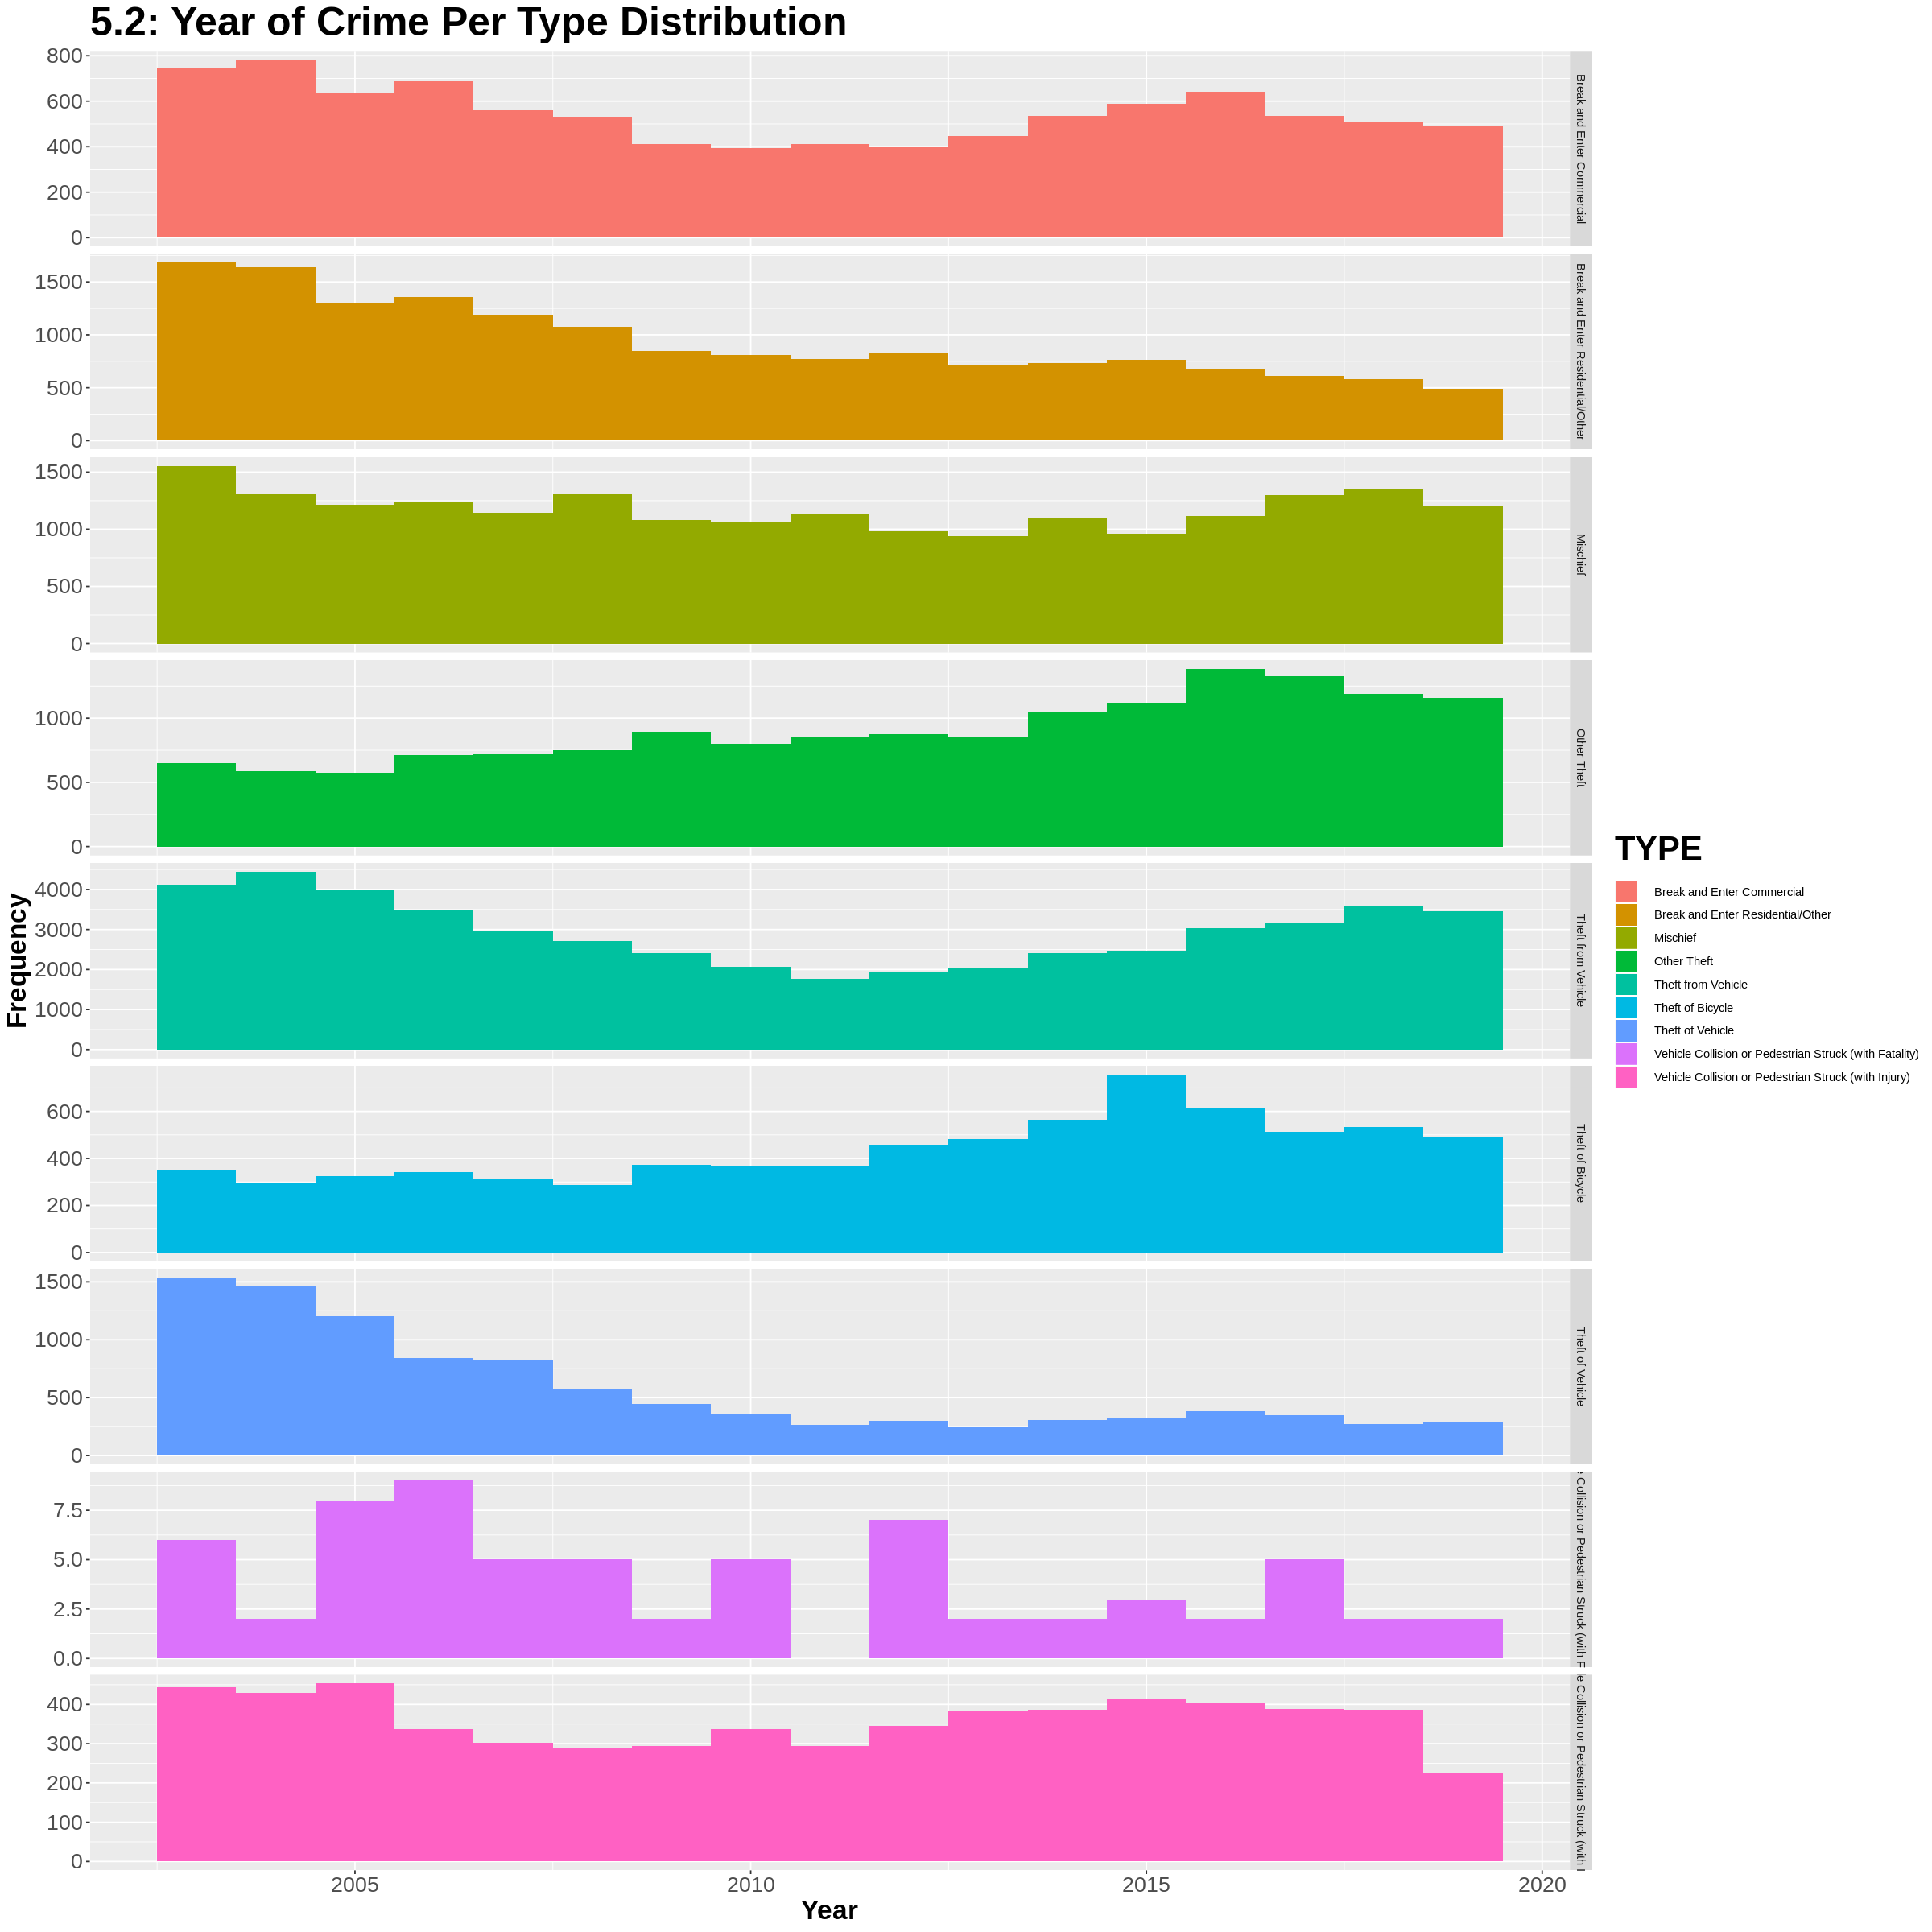

In [28]:
# Year of crime per type distribution
options(repr.plot.width=20, repr.plot.height=20)
year_dist_per_crime <- ggplot(crime, aes(x=YEAR, fill=TYPE)) +
    geom_histogram(binwidth = 1) +
    labs(x="Year", y="Frequency") +
    ggtitle("5.2: Year of Crime Per Type Distribution") +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold")) +
    facet_grid(TYPE ~ ., scales="free")
year_dist_per_crime

## Summary of Time Data Visualization

After exploring minute, hour, day, month, and year of crime as potential predictors, the one variable that stood out most was the progression of the different crimes throughout the hours of a day. To begin with, judging from the distribution of crimes listed under the dataframe in "Minutes", almost half of all crimes were recorded in the 0th minute, clearly for convenience. Furthermore, it is unlikely that all crimes are recorded down to the exact minute they occured. As for "day", given that weekdays and weekends are not indicated (as in, a 7 day basis) all days of the month had a more or less uniform spread of crimes, with the exception of the 31st, for obvious reasons (only half of all months contain it). Month and year showed some interesting trends in figures 4.2 and 5.2, but were barely distinguishable from crime to crime.

Crime variety by hour brings up numerous fascinating trends otherwise unclear by simply comparing frequency of crimes with one another. Firstly, over 20 percent of all crimes recorded in Vancouver this century occur between 5 and 7 pm. Given the business of streets and the dark settings by then, it makes sense that most crimes occur during this hour as that is when victims are most vulnerable and susceptible to criminal activity. At these hours, again, theft from vehicles leads in crimes once again. This lead is far beyond the second crime that follows, perhaps because of the lack of presence or reliability of witnesses in the approaching darkness and the element of stealth that an offender has attacking at night. Moreover, break and enter crimes, mischief, and the three specified types of crime all spike dramatically at midnight! Another prominent trend visible in the above visualizations is that non-vehical or bicycle related thefts peak during the day and trough during the night. Because thefts such as pickpocketing and such require the presence of crowds in high volumes, so this trend also makes sense. Vehicle collisions, likewise, are at a peak too during this time, as busy streets are the most dangerous to drive in afterall.

## Location Data Visualization

### Hundred Block of Crime

Table 6.0

In [29]:
# Crime count sorted by hundred-block
num_obs <- nrow(crime)

crime_by_block <- crime %>%
    group_by(HUNDRED_BLOCK) %>%
    summarize(n = n(), 
             percentage = n/num_obs * 100) %>%
    arrange(desc(n))
head(crime_by_block)

summarize(crime_by_block, n=n())

HUNDRED_BLOCK      n    percentage
1 7XX GRANVILLE ST   1298 0.9654434 
2 6XX GRANVILLE ST    779 0.5794148 
3 7XX W GEORGIA ST    762 0.5667703 
4 31XX GRANDVIEW HWY  575 0.4276810 
5 3XX ABBOTT ST       574 0.4269372 
6 11XX ROBSON ST      509 0.3785907

n    
1 15310

### Neighbourhood of Crime

Table 7.0

In [30]:
# Crime count sorted by neighbourhood
num_obs <- nrow(crime)

crime_by_neighbourhood <- crime %>%
    group_by(NEIGHBOURHOOD) %>%
    summarize(n = n(), 
             percentage = n/num_obs*100) %>%
    arrange(desc(n))
crime_by_neighbourhood

NEIGHBOURHOOD             n     percentage
1  Central Business District 32855 24.4373206
2  West End                  11823  8.7938652
3  Fairview                   8909  6.6264523
4  Mount Pleasant             8825  6.5639736
5  Grandview-Woodland         7633  5.6773723
6  Renfrew-Collingwood        7521  5.5940675
7  Kitsilano                  7443  5.5360516
8  Kensington-Cedar Cottage   6914  5.1425851
9  Strathcona                 6331  4.7089538
10 Hastings-Sunrise           4948  3.6802880
11 Sunset                     4710  3.5032653
12 Marpole                    3663  2.7245139
13 Riley Park                 3419  2.5430284
14 Killarney                  2871  2.1354298
15 Victoria-Fraserview        2855  2.1235291
16 Oakridge                   2163  1.6088244
17 Dunbar-Southlands          2147  1.5969237
18 Kerrisdale                 2076  1.5441144
19 Arbutus Ridge              1669  1.2413906
20 West Point Grey            1610  1.1975068
21 South Cambie               1485  1.1045327
22 Shaughnessy                1479  1.1000699
23 Stanley Park                968  0.7199917
24 Musqueam                    129  0.0959493

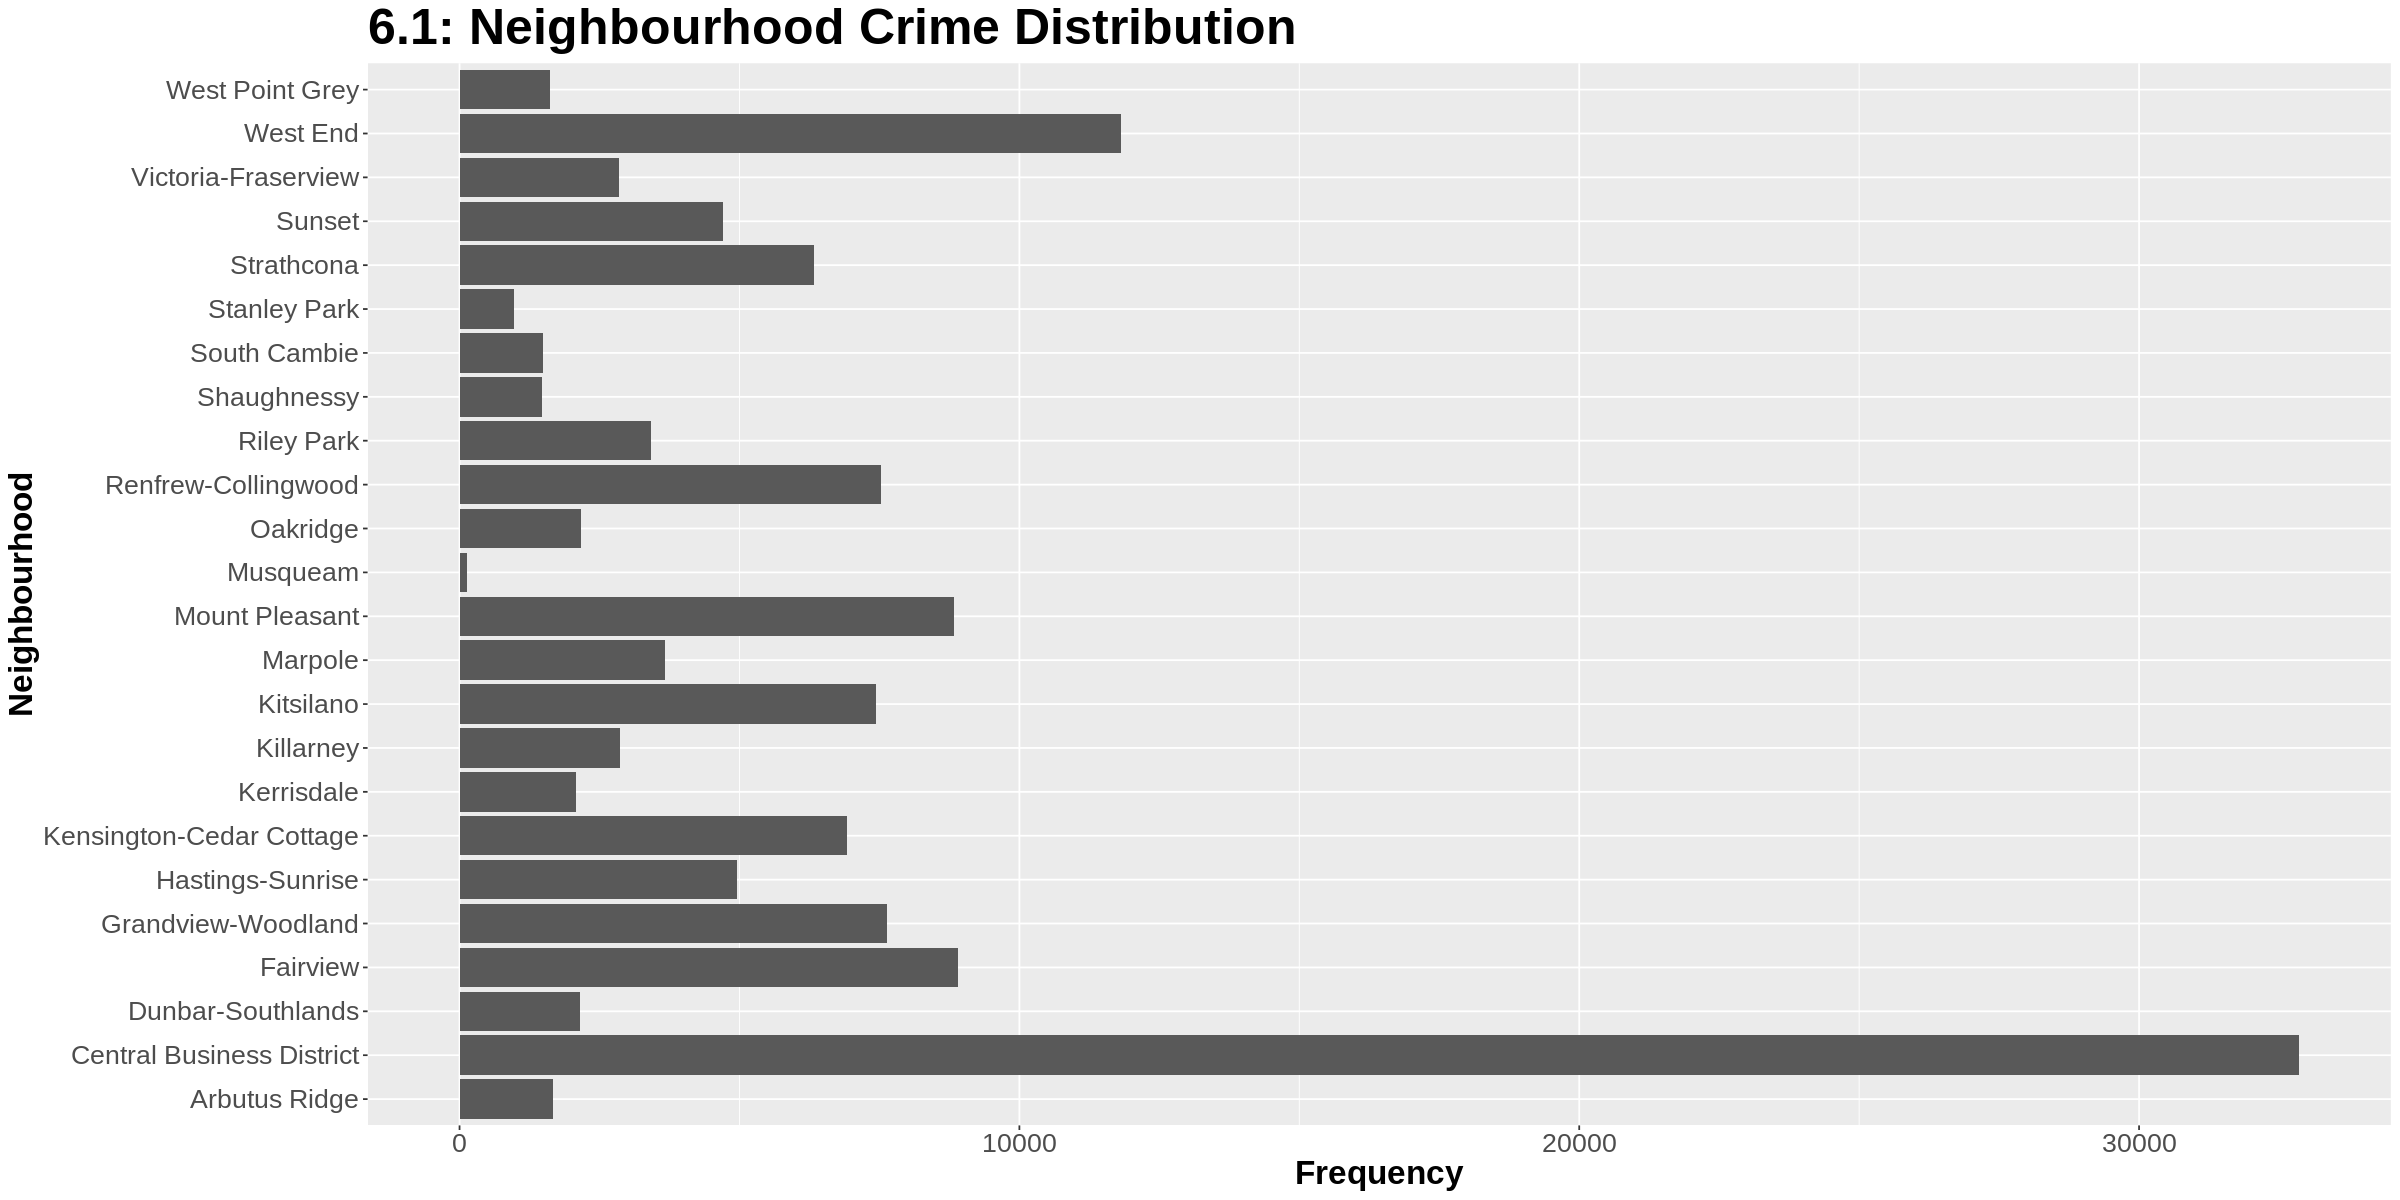

In [31]:
# Neighbourhood Crime Distribution
options(repr.plot.width=20, repr.plot.height=10)
nbhd_dist_plot <- ggplot(crime, aes(x=NEIGHBOURHOOD)) +
    geom_bar() +
    labs(x="Neighbourhood", y="Frequency") +
    ggtitle("6.1: Neighbourhood Crime Distribution") +
    coord_flip() +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold"))
nbhd_dist_plot

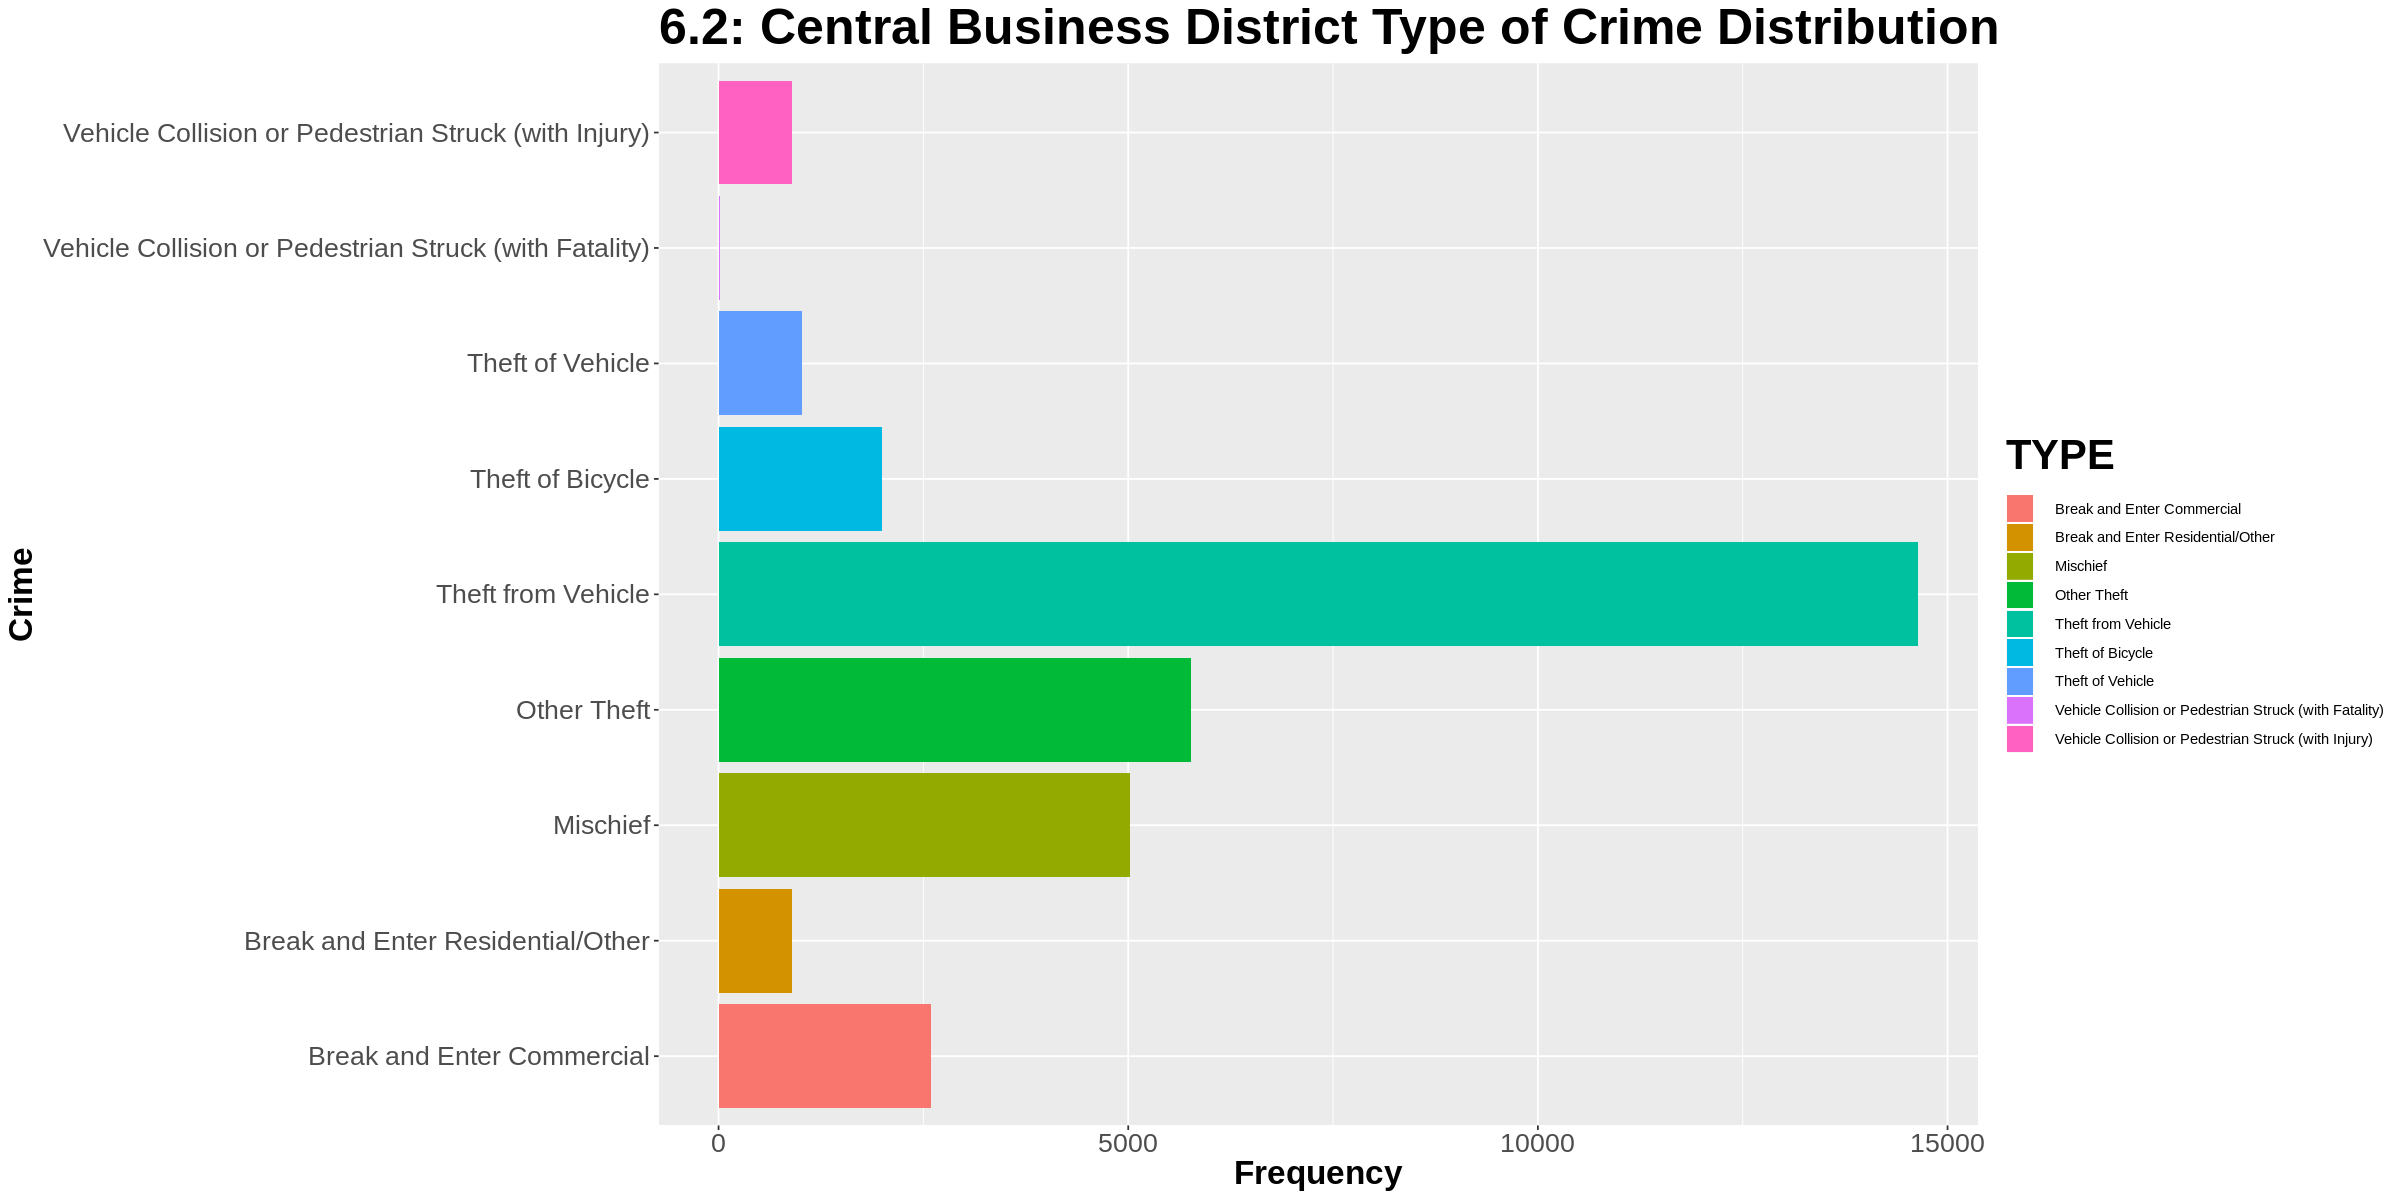

In [32]:
# Central Business district crime
options(repr.plot.width=20, repr.plot.height=10)
cbd_crime <- filter(crime, NEIGHBOURHOOD == "Central Business District")

cbd_dist_plot <- ggplot(cbd_crime, aes(x=TYPE, fill=TYPE)) +
    geom_bar() +
    labs(x="Crime", y="Frequency") +
    ggtitle("6.2: Central Business District Type of Crime Distribution") +
    coord_flip() +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold"))
cbd_dist_plot

### Coordinates of Crime

Warning message:
“Removed 1283 rows containing missing values (geom_point).”


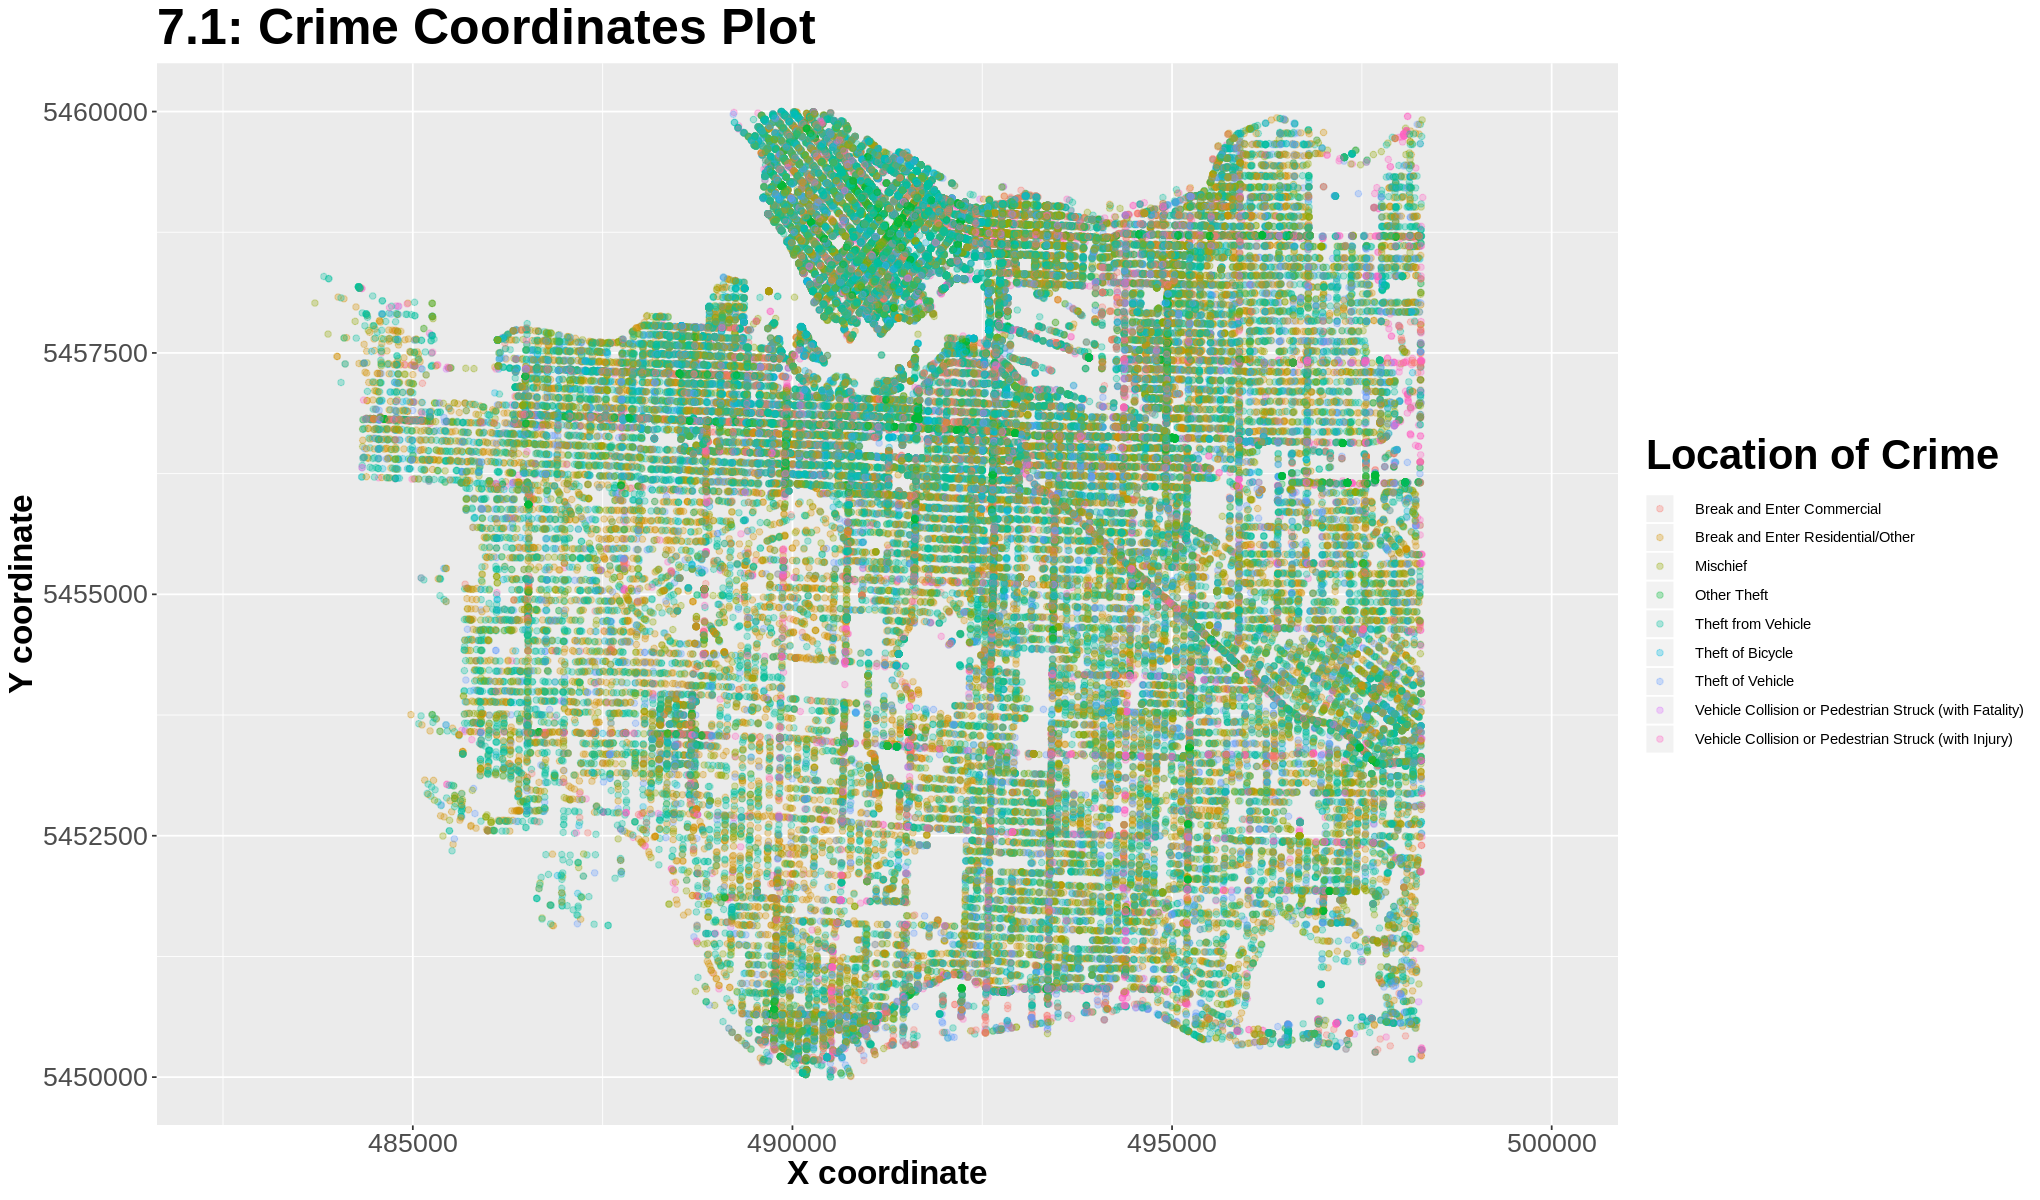

In [33]:
# Coordinate visualization
options(repr.plot.width = 17, repr.plot.height = 10)
coord_plot <- ggplot(crime, aes(x=X, y=Y, color=TYPE)) +
                geom_point(alpha=0.3) +
                labs(x="X coordinate", y="Y coordinate", color="Location of Crime") +
                ggtitle("7.1: Crime Coordinates Plot") +
                xlim(482500, 500000)+
                ylim(5450000,5460000) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
coord_plot

## Summary of Location Data Visualization

In the context of a knn classification algorithm, only one set of location predictors seemed likely after only looking at this dataset initially. Given the mechanics of locating the nearest datapoint identities based on a distance formula, the XY coordinate set was the only realistic option. To begin with, given the abundance of hundred blocks in this data set, 22,060 to be specific, it should'nt be used as a predictor given tha besides the level of specificity required to classify a crime based off of it, a knn classification method wouldn't be useful either as even if two blocks are adjacent to one another, the algorithm wouldn't consider them "close". Of all neighbourhoods in Vancouver, the Central Business District seems to be where most crimes occur (over a fifth of all crimes: Figure 6.1), which lies at the edge of Hastings street. This comes as no surprise, as this area is notorious for high levels of unemployment, homelessness, drug abuse, among other things. As with the entirety of the dataset, theft from vehicles stands out as the leading crime in the area, followed by other theft not including automobile or bicycle theft, and mischief close in third as seen in Figure 6.2.

When plotting different types of crimes on a coordinate system, mapping Vancouver with its crimes, we can see some trends that make a lot of sense with respect to the nature of crimes and their locations. To begin with, again, most crimes are concentrated around the downtown Central Business District, as we have seen in Figure 6.2, and by the Hastings area. Moreover, vehicle related crimes are patterned along main roads, as they should, and thefts fill in the blocks by downtown whereas break and enter/mischief do so with the blocks further down south, where neighbourhoods and rural housing areas reside. A faint map of central Vancouver can be seen as all these crimes come together, and it shows that although some areas are more susceptible to crime than others, no place is particularly safe.

## Final Predictor Visualizations

Warning message:
“Removed 285 rows containing missing values (geom_point).”
Warning message:
“Removed 912 rows containing missing values (geom_point).”


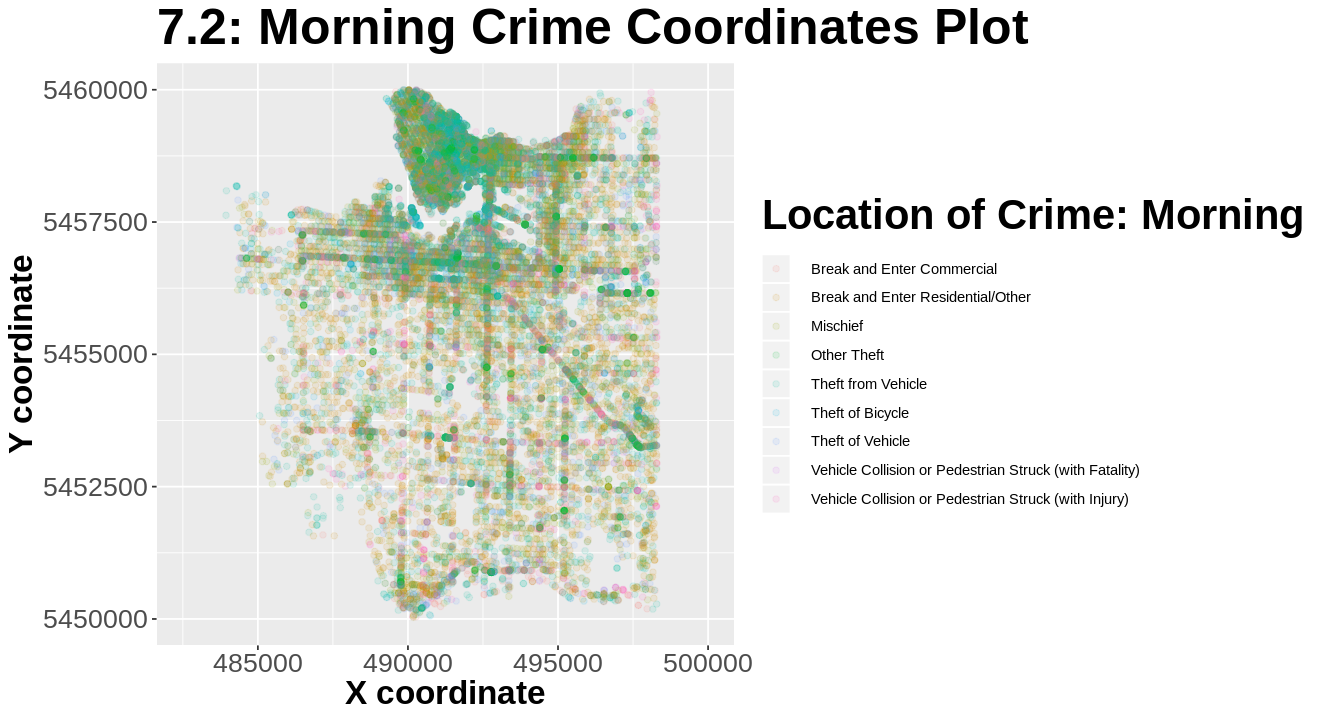

Warning message:
“Removed 210 rows containing missing values (geom_point).”


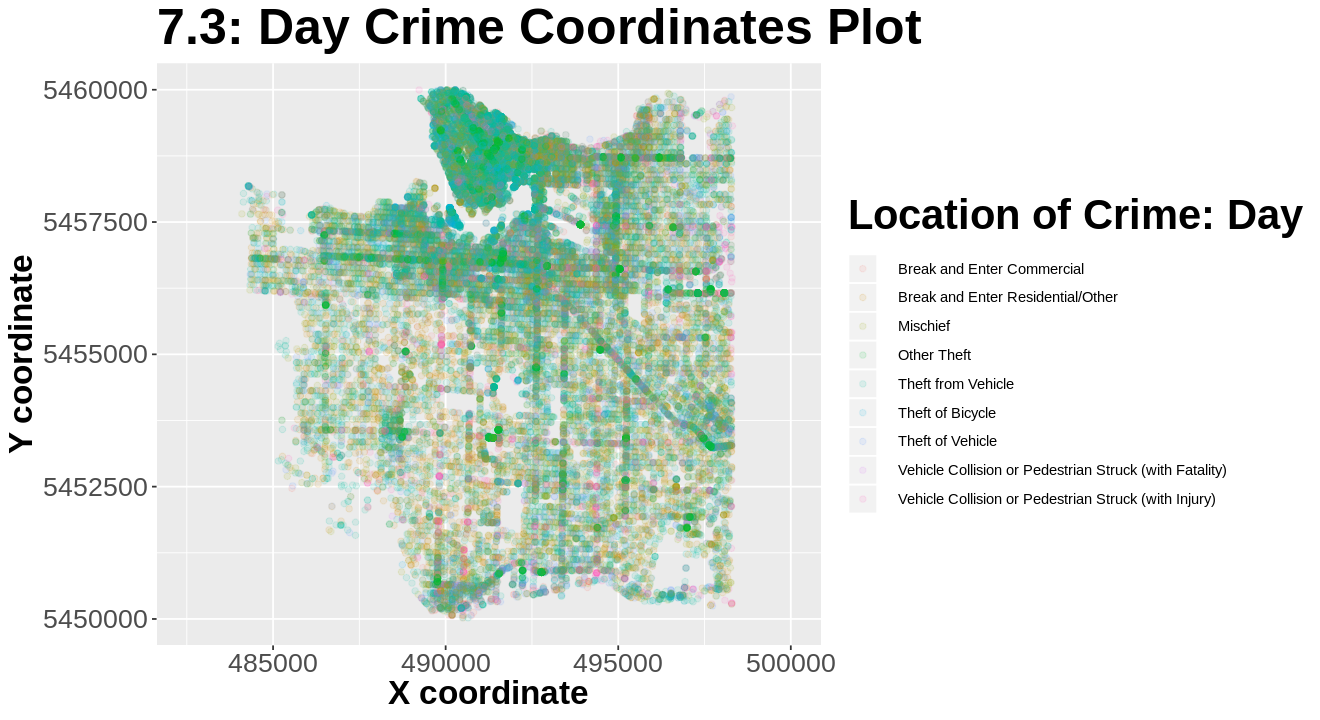

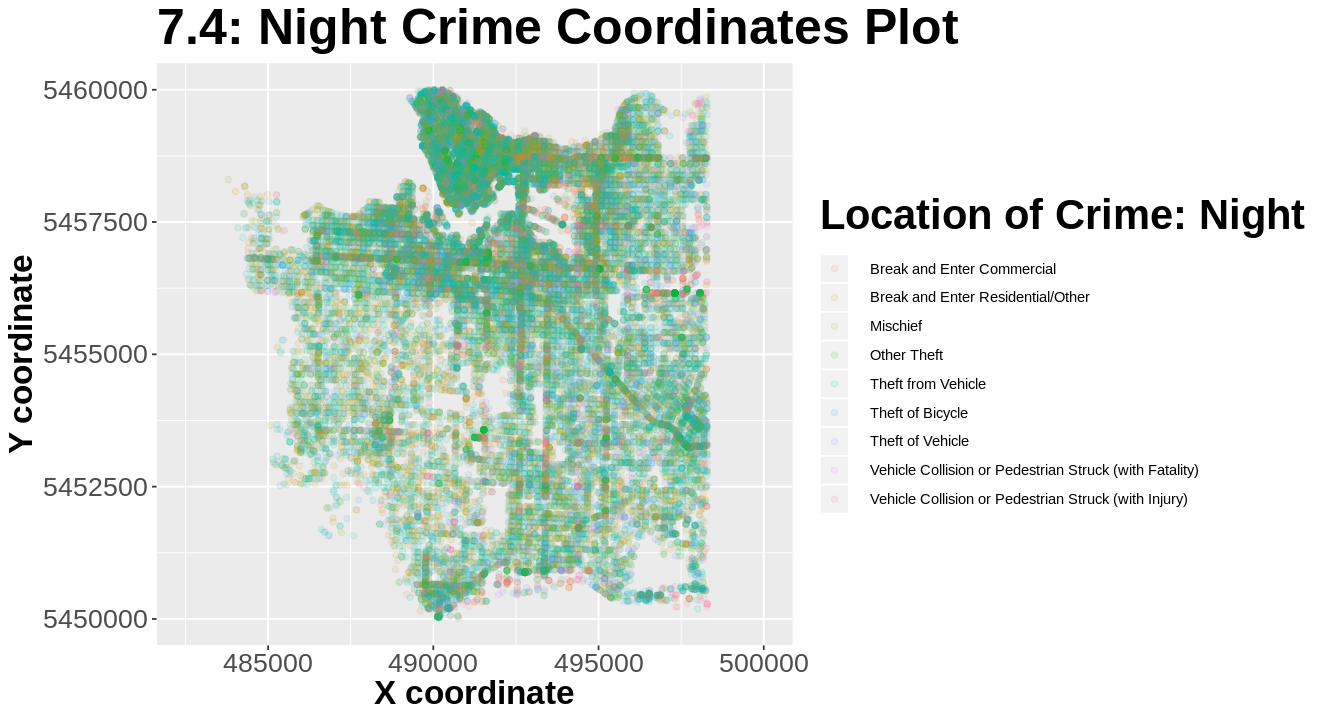

In [77]:
# Summary plots
morning_crime <- filter(crime, HOUR >= 4, HOUR < 12)
day_crime <- filter(crime, HOUR >= 12, HOUR < 20)
night_crime <- filter(crime, HOUR >= 20 | HOUR < 4)

options(repr.plot.width = 11, repr.plot.height = 6)
morning_plot <- ggplot(morning_crime, aes(x=X, y=Y, color=TYPE)) +
                geom_point(alpha=0.1) +
                labs(x="X coordinate", y="Y coordinate", color="Location of Crime: Morning") +
                ggtitle("7.2: Morning Crime Coordinates Plot") +
                xlim(482500, 500000)+
                ylim(5450000,5460000) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
morning_plot

options(repr.plot.width = 11, repr.plot.height = 6)
day_plot <- ggplot(day_crime, aes(x=X, y=Y, color=TYPE)) +
                geom_point(alpha=0.1) +
                labs(x="X coordinate", y="Y coordinate", color="Location of Crime: Day") +
                xlim(482500, 500000)+
                ylim(5450000,5460000) +
                ggtitle("7.3: Day Crime Coordinates Plot") +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
day_plot

options(repr.plot.width = 11, repr.plot.height = 6)
night_plot <- ggplot(night_crime, aes(x=X, y=Y, color=TYPE)) +
                geom_point(alpha=0.1) +
                labs(x="X coordinate", y="Y coordinate", color="Location of Crime: Night") +
                xlim(482500, 500000)+
                ylim(5450000,5460000) +
                ggtitle("7.4: Night Crime Coordinates Plot") +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
night_plot

## Summary of Predictor Visualizations

In order to have a dynamic predictor, we need to take into consideration both time and location of crimes as predictors classifying an unknown type of crime. Looking back at all time variables, the one that gave the most prominent differences from crime to crime is the hour of day. Seeing as different crimes have different patterns throughout the day, but more or less consistent ones beyond and beneath, this is definitely the most reliable predictor in terms of time. When looking at location in context of a knn classification method, the coordinatte system is the most reliable due to it literally mapping out crimes across Vancouver, and serving to identify a crime based on its direct distance to or from a specified location.

In order to combine the three factors used in our K nearest neighbours classifier, above (Figures 7.2, 7.3, 7.4) is the progression of crime across Vancouver from morning to night time, demonstrated by plotted coordinates so as to bring all variables together.

## Should we Group Levels of Crime?

In [78]:
#Summarizing the Data
relabel <- function(TYPE) {
    vector = c()
    for (t in TYPE) {
        if (t == "Break and Enter Commercial" || t == "Break and Enter Residential/Other")
            vector  <- c(vector, "B")
        else if(t == "Mischief")
            vector  <- c(vector, "M")
        else if(t == "Other Theft" || t == "Theft from Vehicle" || t == "Theft of Bicycle" || t == "Theft of Vehicle")
            vector  <- c(vector, "T")
        else if(t == "Vehicle Collision or Pedestrian Struck (with Fatality)" || t == "Vehicle Collision or Pedestrian Struck (with Injury)")
            vector  <- c(vector, "V")
    }
    return (vector)
}

In [79]:
#relabel(TYPE)
grouped_crime <- crime %>%
    mutate(TYPE = as.character(TYPE)) %>%
    mutate(BROAD_TYPE = relabel(TYPE))

Table 8.0

TYPE             YEAR MONTH DAY HOUR MINUTE HUNDRED_BLOCK        
1 Other Theft      2014  1     4  21   43     55XX CAMBIE ST       
2 Theft of Bicycle 2009  4    26  15   30     10XX BEACH AVE       
3 Other Theft      2019  7    20  15   27     5XX W HASTINGS ST    
4 Theft of Bicycle 2013  8     7  23    0     18XX CROWE ST        
5 Theft of Bicycle 2011 10    18  23    0     CAMBIE ST / ROBSON ST
6 Theft of Bicycle 2015  9    18  18    0     5XX PACIFIC ST       
  NEIGHBOURHOOD             X        Y       BROAD_TYPE
1 South Cambie              491528.0 5453572 T         
2 West End                  490197.5 5458239 T         
3 Central Business District 491827.1 5459080 T         
4 Mount Pleasant            491845.4 5457336 T         
5 Central Business District 491638.3 5458390 T         
6 Central Business District 490732.1 5457909 T

BROAD_TYPE n     percentage
1 B          25344 18.862757 
2 M          20171 15.012653 
3 T          82605 61.480351 
4 V           6240  4.644239

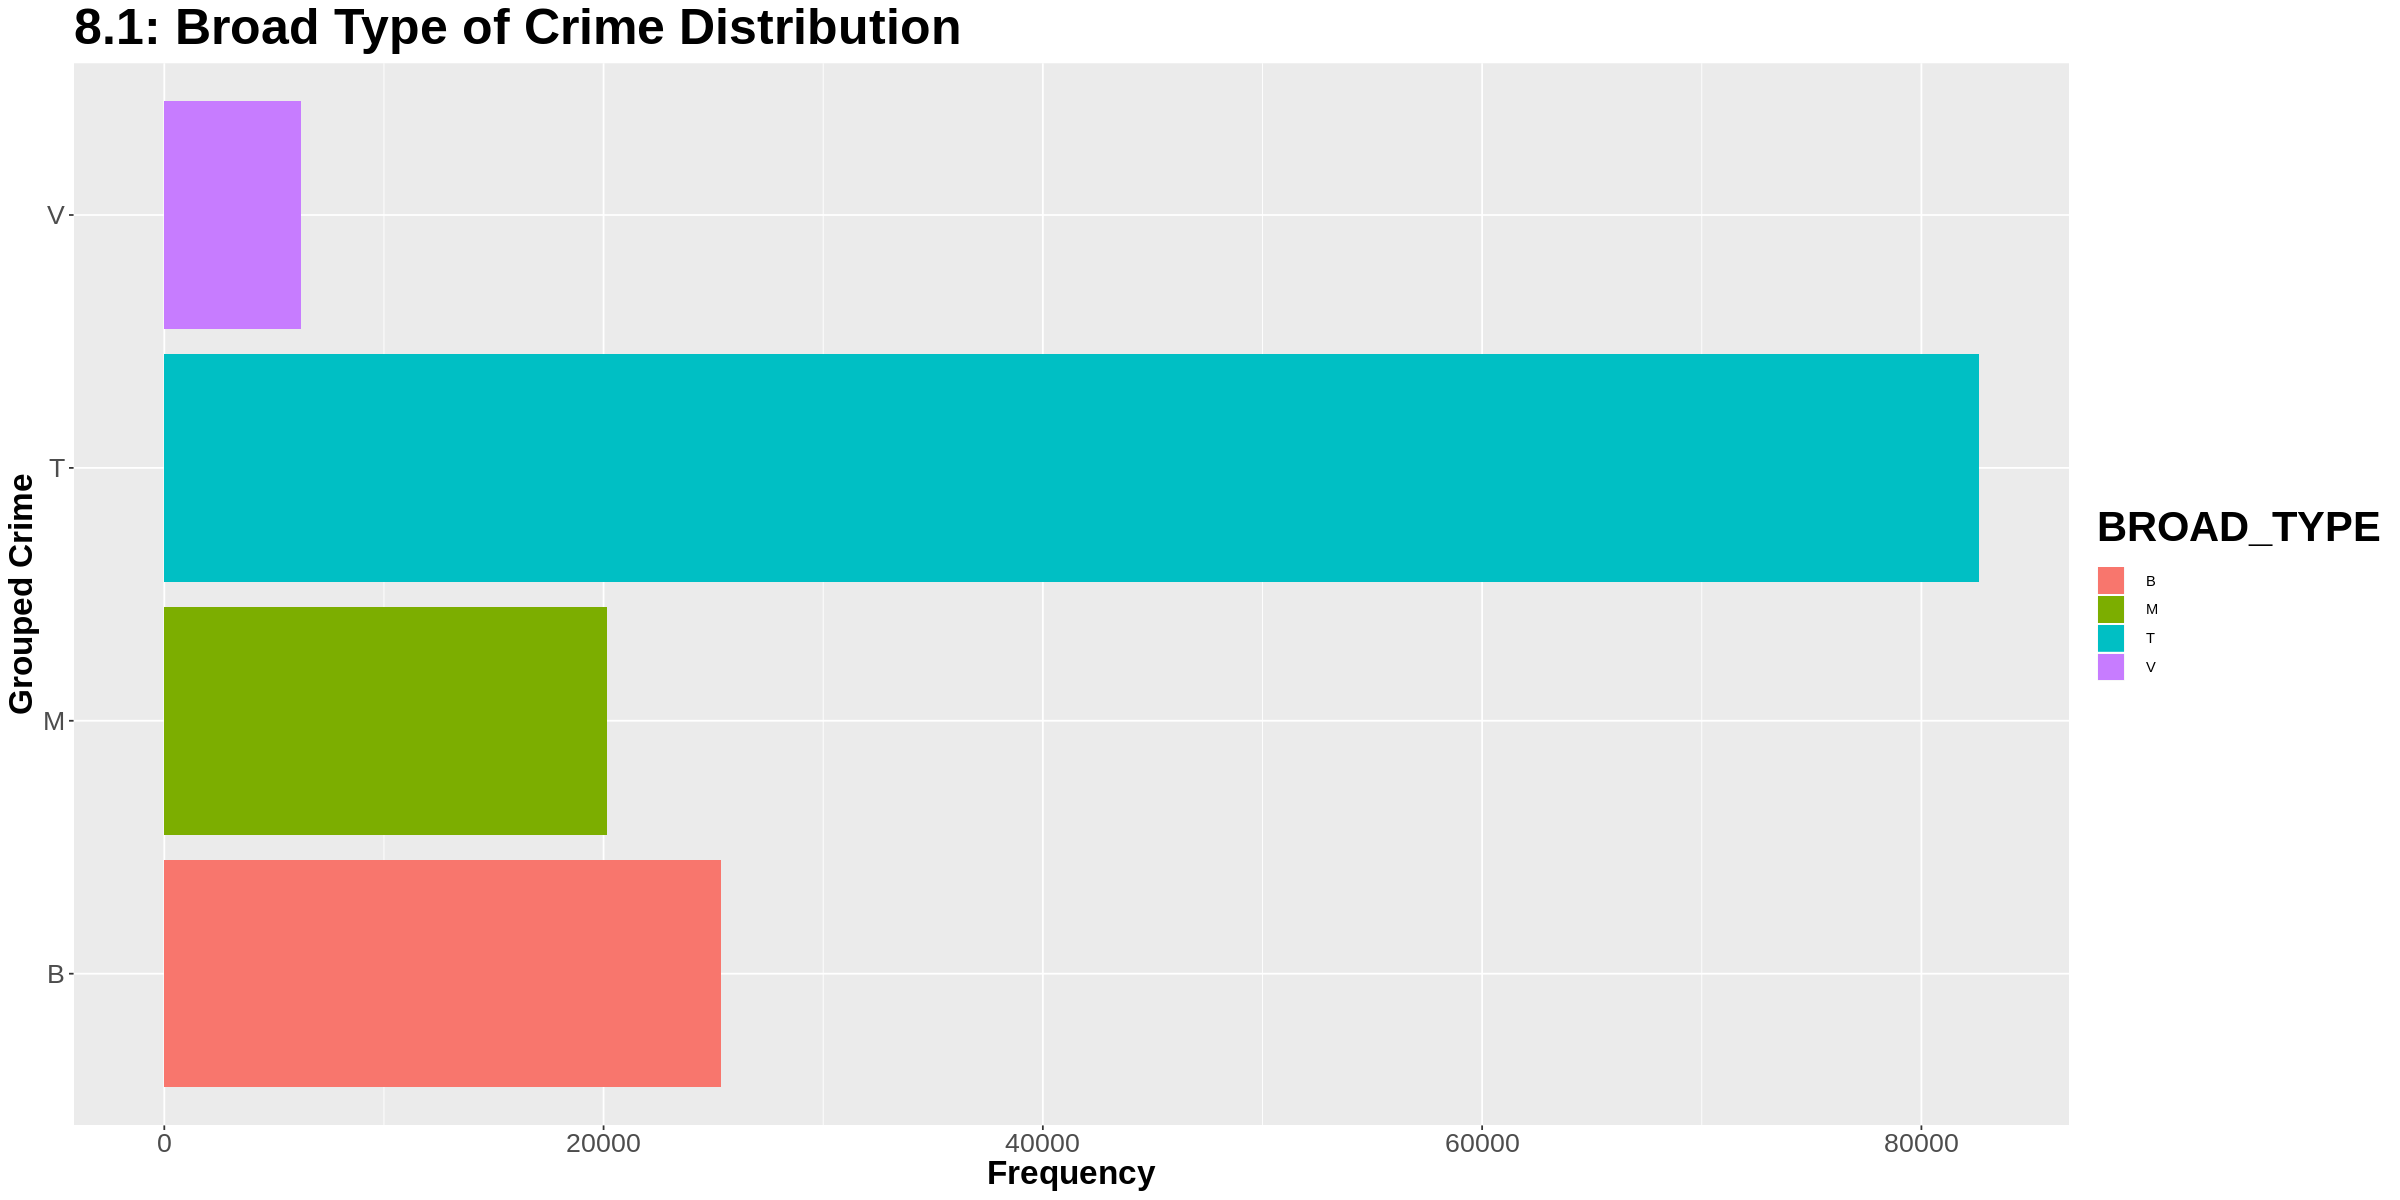

In [80]:
#Grouped crime visualization
num_obs <- nrow(grouped_crime)
head(grouped_crime)
dist <- grouped_crime %>% 
  group_by(BROAD_TYPE) %>% 
  summarize(n = n(),
            percentage = n() / num_obs * 100)
dist

options(repr.plot.width=20, repr.plot.height=10)
broad_type_dist_plot <- ggplot(grouped_crime, aes(x=BROAD_TYPE, fill=BROAD_TYPE)) +
    geom_bar() +
    labs(x="Grouped Crime", y="Frequency") +
    ggtitle("8.1: Broad Type of Crime Distribution") +
    coord_flip() +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold"))
broad_type_dist_plot

Warning message:
“Removed 742 rows containing missing values (geom_point).”


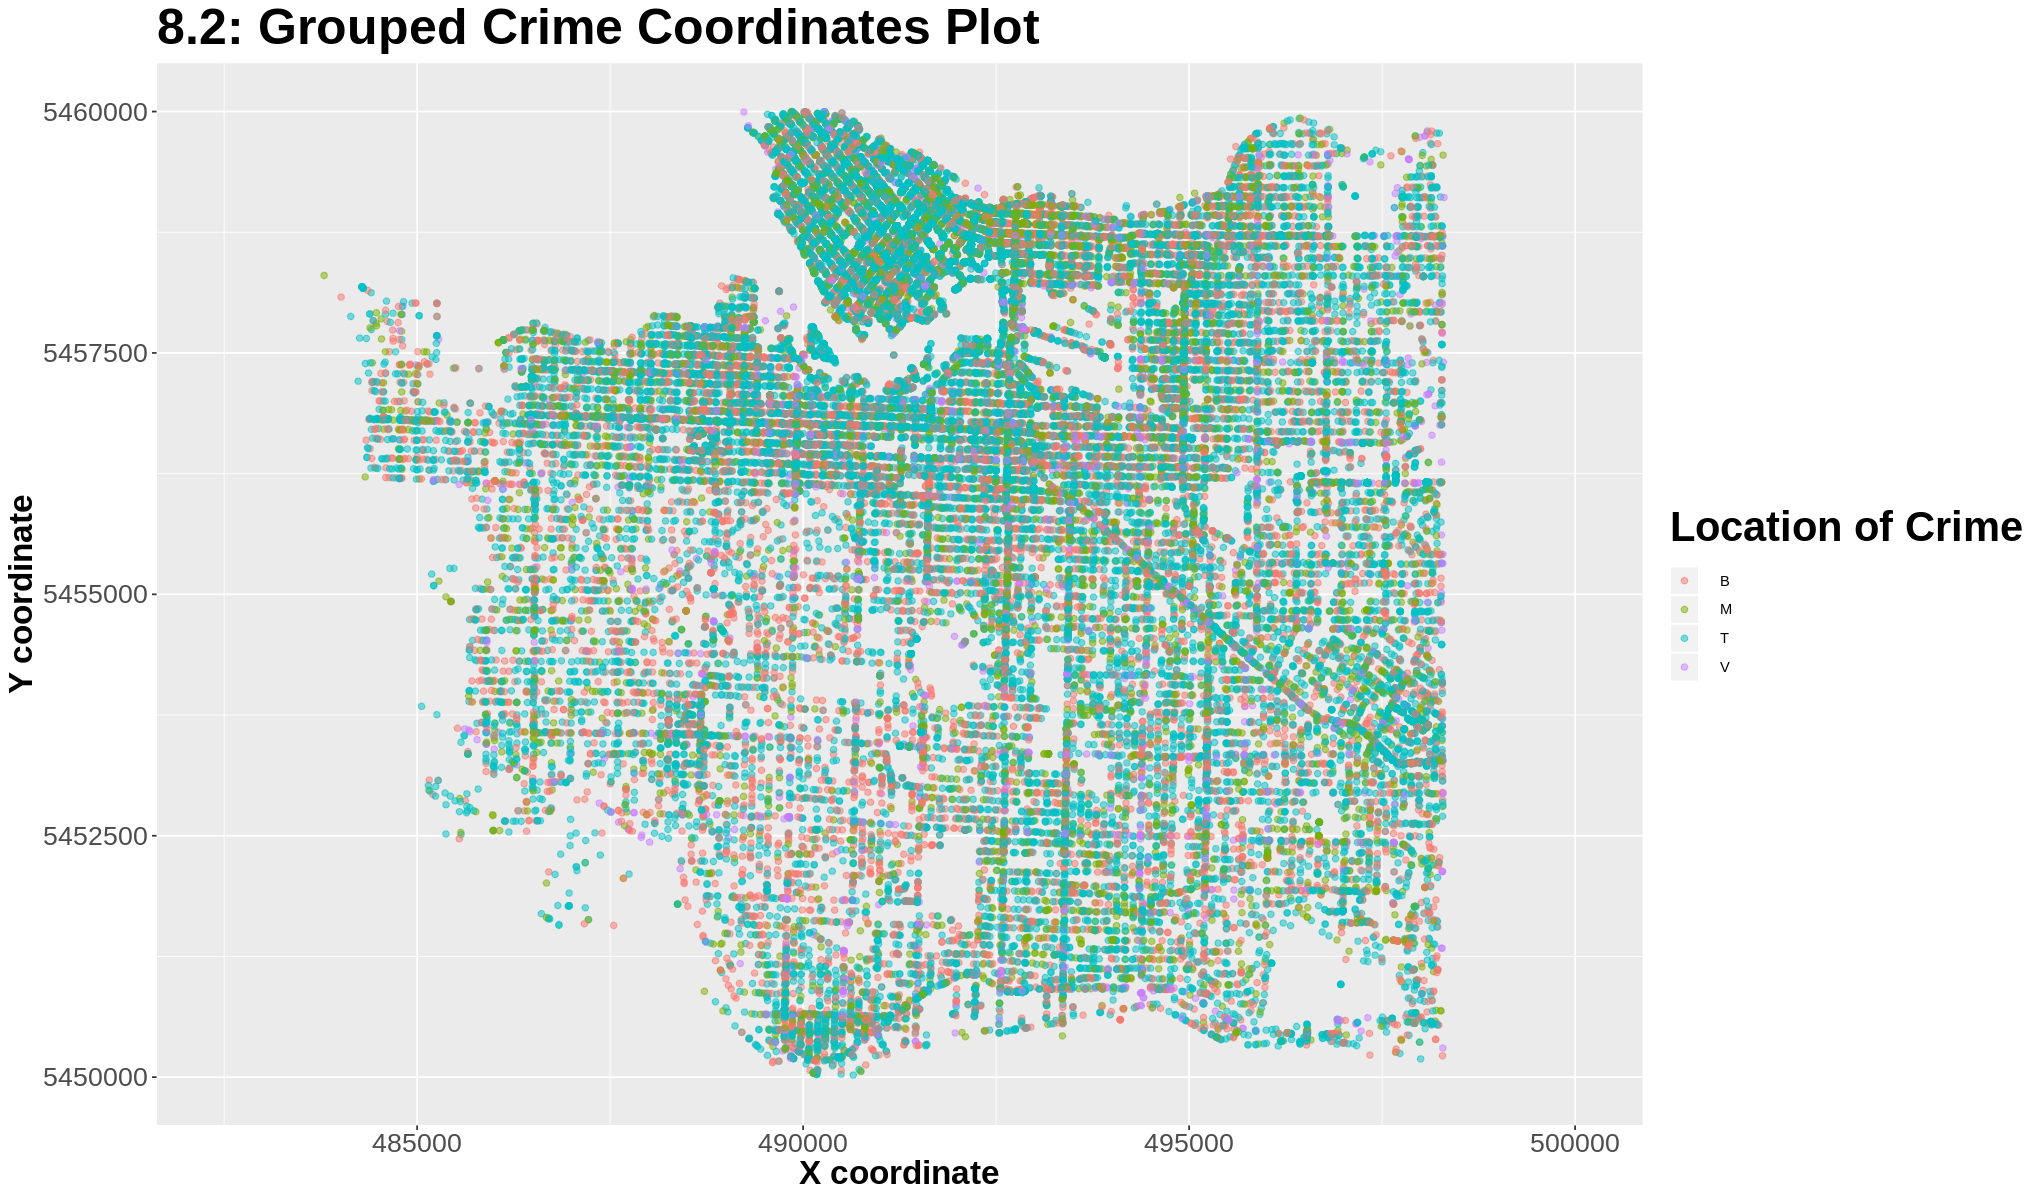

In [81]:
# Grouped coordinate visualization
managable_rows1 <- grouped_crime %>%
    select(BROAD_TYPE) %>%
    unlist() %>%
    createDataPartition(p=0.5, list = FALSE)

managable_set1 <- grouped_crime %>% slice(managable_rows1)

options(repr.plot.width = 17, repr.plot.height = 10)
grouped_coord_plot <- ggplot(managable_set1, aes(x=X, y=Y, color=BROAD_TYPE)) +
                geom_point(alpha=0.5) +
                labs(x="X coordinate", y="Y coordinate", color="Location of Crime") +
                ggtitle("8.2: Grouped Crime Coordinates Plot") +
                xlim(482500, 500000)+
                ylim(5450000,5460000) +
                theme(axis.text=element_text(size=16),
                    axis.title=element_text(size=20,face="bold"),
                    title=element_text(size=25, face="bold"))
                
grouped_coord_plot

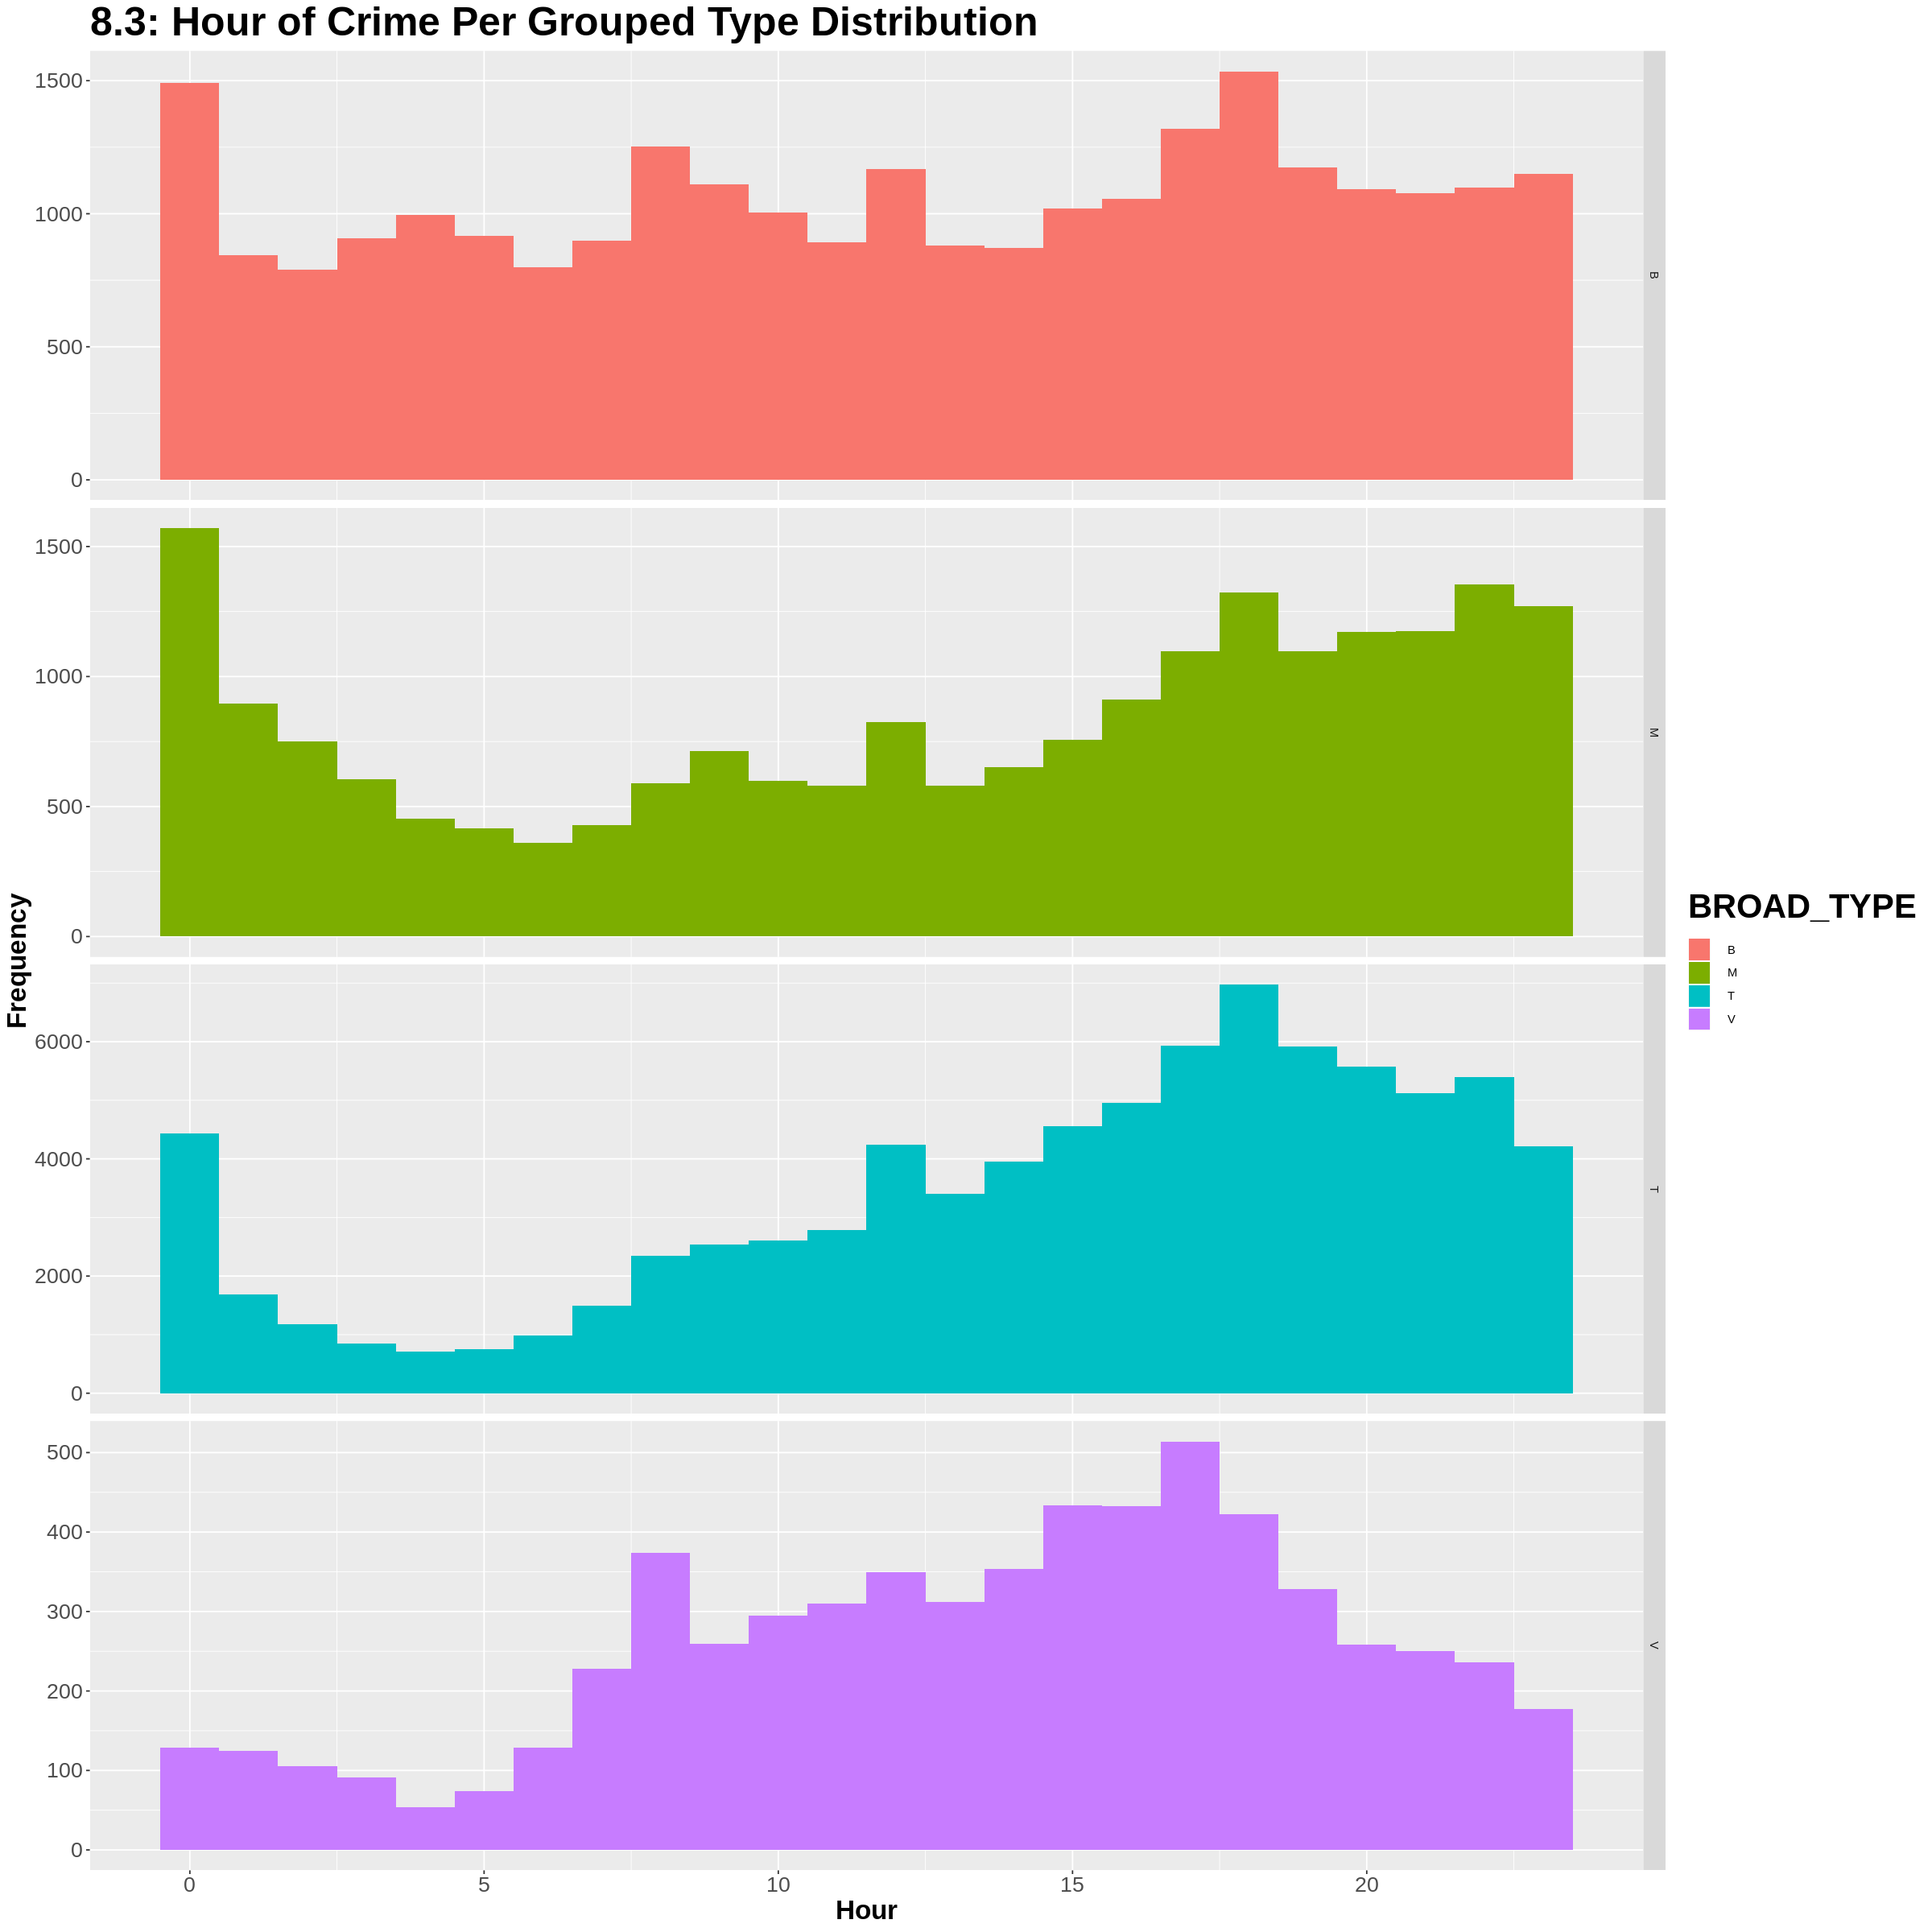

In [82]:
# Grouped hour of crime per type distribution
options(repr.plot.width=20, repr.plot.height=20)
grouped_hour_dist_per_crime <- ggplot(grouped_crime, aes(x=HOUR, fill=BROAD_TYPE)) +
    geom_histogram(binwidth = 1) +
    labs(x="Hour", y="Frequency") +
    ggtitle("8.3: Hour of Crime Per Grouped Type Distribution") +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold")) +
    facet_grid(BROAD_TYPE ~ ., scales="free")
grouped_hour_dist_per_crime

## No...

As for grouping the 9 recorded levels of the dataset, keeping them separate seems to be the more accurate option as similarly grouped levels do not necessarily share the same trends as their respective "counterparts" do, so generalizing them into joint categories would be misleading and hence lead to false classification of crime type. We can see in figure 8.1 that, due to the previously reigning theft from vehicles, theft is by far the leading crime in terms of frequency in Vancouver from 2003 to 2019. However, when comparing figure 8.2 with 7.1, we see that certain clear locations associated with particular types of crime are now a lot more feint, and trends are not as strong as they previously appeared. As for figure 8.3, when comparing it to 2.2, a lot less variety in trends is also clear. With ungrouped crimes, many different patterns appeared as hours of the day passed. Now, all seem to increase in just as similar a fashion as the next crime.

## Splitting the data into training set and testing set

Despite grouping levels theoretically being a non ideal option, keeping them separate would be rather pointless if we cannot have a relatively accurate model, and grouping would most easily achieve ths purpose. Hence, this is the most feasible way of running such a model.

In [84]:
# Have to have even less values for the k-nn to run in a reasonable amount of time
crime <- sample_n(grouped_crime, 5000) %>%
            mutate(BROAD_TYPE = as.factor(BROAD_TYPE))



#spilt up training set and testing set
training_rows<-select(crime,BROAD_TYPE)%>%
unlist()%>%
# unfortunately these categories are too small and need to be filtered out or else the model will complain
# about empty levels
droplevels("Homicide", "Offence Against a Person") %>%
createDataPartition(p=0.75,list= FALSE)

training_set <- crime %>% slice(training_rows)
testing_set<- crime %>% slice(-training_rows)

scale_transformer <- preProcess(training_set, method = c("center", "scale")) # scale the data since knn is sentive to the scale

training_set <- predict(scale_transformer, training_set)
testing_set <- predict(scale_transformer, testing_set)

head(training_set)
head(testing_set)

glimpse(training_set)
glimpse(testing_set) 
#check whether the number of observations in training set and testing set are correct

TYPE                              YEAR       MONTH      DAY        HOUR      
1 Theft from Vehicle                 1.4277155  1.3628531  1.6907509  0.6333842
2 Break and Enter Residential/Other -1.2481043 -0.1308919 -1.4591659 -0.3992433
3 Theft from Vehicle                -0.1013244 -0.1308919  0.4074515 -1.7269072
4 Break and Enter Commercial        -0.4835843 -0.7283899 -1.5758295 -1.2843526
5 Theft of Bicycle                   1.4277155  0.7653551 -1.6924931 -2.0219437
6 Theft from Vehicle                -0.2924544  0.4666061  0.6407786 -1.1368344
  MINUTE     HUNDRED_BLOCK          NEIGHBOURHOOD             X         
1 -0.9467917 57XX MAIN ST           Sunset                     0.1491591
2  0.6458468 64XX CAMBIE ST         Oakridge                  -0.2689023
3  0.6458468 E 10TH AVE / FRASER ST Mount Pleasant             0.4857470
4  1.8668696 6XX SE MARINE DR       Sunset                     0.4076570
5 -0.9467917 2XX DUNLEVY AVE        Strathcona                 0.3160849
6  0.8581986 1XX KEEFER ST          Central Business District  0.1584485
  Y           BROAD_TYPE
1 -1.38290088 T         
2 -1.61612264 B         
3 -0.07604903 T         
4 -2.32335166 B         
5  0.87851880 T         
6  0.72493982 T

TYPE               YEAR       MONTH      DAY         HOUR       MINUTE    
1 Theft from Vehicle  0.4720656  1.6616021  0.17412429 -1.7269072  0.8581986
2 Theft from Vehicle -0.2924544  0.1678571 -0.64252080 -1.1368344  1.8668696
3 Other Theft         1.6188455  0.7653551 -0.64252080  0.7809024  1.8137817
4 Mischief           -1.0569743  0.4666061  0.52411504 -1.5793890 -0.8937038
5 Mischief           -0.8658443  1.3628531 -0.05920288 -1.7269072 -0.9467917
6 Theft from Vehicle  0.6631956 -0.4296409  0.64077862 -1.8744255  0.8051106
  HUNDRED_BLOCK    NEIGHBOURHOOD             X           Y           BROAD_TYPE
1 33XX PRICE ST    Renfrew-Collingwood        1.98454647 -0.85434934 T         
2 2XX JACKSON AVE  Strathcona                 0.37391268  0.88493224 T         
3 23XX CAMBIE ST   Mount Pleasant            -0.21176262  0.07347827 T         
4 31XX MAIN ST     Mount Pleasant             0.15415241 -0.26977585 M         
5 6XX GRANVILLE ST Central Business District -0.29083524  0.87401733 M         
6 33XX ONTARIO ST  Riley Park                 0.05430589 -0.33579168 T

Observations: 3,750
Variables: 11
$ TYPE          <chr> "Theft from Vehicle", "Break and Enter Residential/Othe…
$ YEAR          <dbl> 1.42771548, -1.24810426, -0.10132437, -0.48358434, 1.42…
$ MONTH         <dbl> 1.3628531, -0.1308919, -0.1308919, -0.7283899, 0.765355…
$ DAY           <dbl> 1.6907509, -1.4591659, 0.4074515, -1.5758295, -1.692493…
$ HOUR          <dbl> 0.63338421, -0.39924330, -1.72690724, -1.28435259, -2.0…
$ MINUTE        <dbl> -0.94679174, 0.64584677, 0.64584677, 1.86686962, -0.946…
$ HUNDRED_BLOCK <fct> 57XX MAIN ST, 64XX CAMBIE ST, E 10TH AVE / FRASER ST, 6…
$ NEIGHBOURHOOD <fct> Sunset, Oakridge, Mount Pleasant, Sunset, Strathcona, C…
$ X             <dbl> 0.149159052, -0.268902348, 0.485746980, 0.407657037, 0.…
$ Y             <dbl> -1.38290088, -1.61612264, -0.07604903, -2.32335166, 0.8…
$ BROAD_TYPE    <fct> T, B, T, B, T, T, T, M, B, B, T, M, V, M, M, T, T, M, T…
Observations: 1,250
Variables: 11
$ TYPE          <chr> "Theft from Vehicle", "Theft from Vehicle

## Creating the Model

### Using cross-validation to choose k

In [85]:
predictors <-select(training_set,X,Y,HOUR)%>%
data.frame()     # to get the predictors from training set as the form of data frame 

Y_label <-select(training_set,BROAD_TYPE)%>%
unlist()%>%   #to get the label as the form of a vector
droplevels("Homicide", "Offence Against a Person")

train_control <- trainControl(method = "cv", number = 5)

ks <- data.frame(k = seq(1,50)) 

choose_k <-train(x=predictors,y=Y_label,tuneGrid=ks,method="knn",trControl=train_control)
choose_k

k-Nearest Neighbors 

3750 samples
   3 predictor
   4 classes: 'B', 'M', 'T', 'V' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 3000, 3000, 3000, 3000, 3000 
Resampling results across tuning parameters:

  k   Accuracy   Kappa     
   1  0.4904000  0.08786847
   2  0.4848000  0.08464805
   3  0.5322667  0.09790487
   4  0.5418667  0.08886386
   5  0.5581333  0.09734093
   6  0.5717333  0.11461625
   7  0.5821333  0.11679386
   8  0.5813333  0.10476816
   9  0.5901333  0.11501568
  10  0.5965333  0.11753812
  11  0.6002667  0.11863472
  12  0.6000000  0.11171705
  13  0.6034667  0.11292268
  14  0.6077333  0.11694754
  15  0.6056000  0.10688608
  16  0.6072000  0.10754187
  17  0.6069333  0.10209861
  18  0.6114667  0.10748921
  19  0.6106667  0.10302729
  20  0.6106667  0.10178350
  21  0.6080000  0.09745351
  22  0.6066667  0.08922557
  23  0.6085333  0.09039198
  24  0.6053333  0.07997524
  25  0.6061333  0.08328098
  26  0.6048000  0.07945107
  

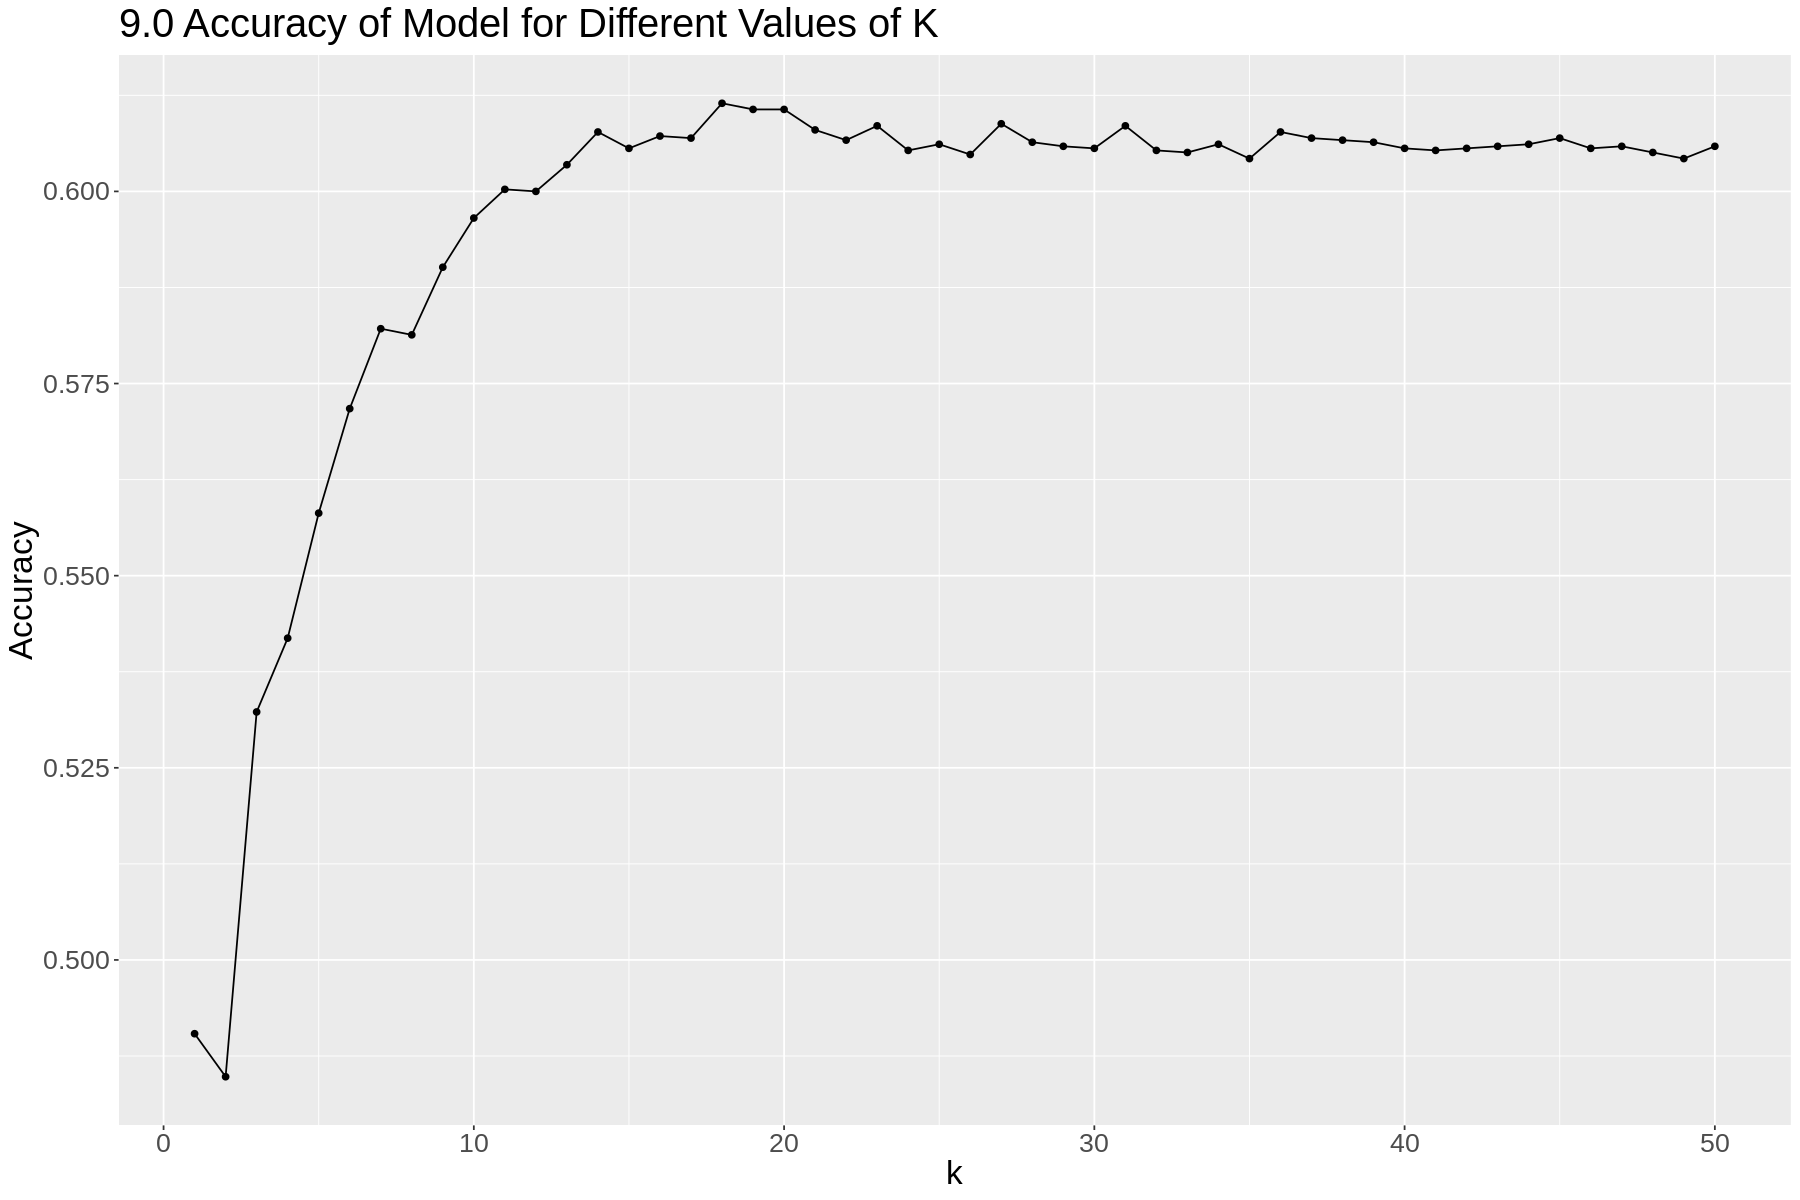

In [86]:
k_accuracies <- choose_k$results %>%
                    select(k, Accuracy)

options(repr.plot.width = 15, repr.plot.height = 10)

choose_k_plot <-k_accuracies %>%
ggplot(aes(x=k,y=Accuracy))+
geom_point()+
geom_line()+
labs(title = "9.0 Accuracy of Model for Different Values of K")+
theme(text = element_text(size = 20))
choose_k_plot

From the graph, we see the accuracy is highest at k = 18, thus we choose 18 as optimal value of k.

In [87]:
final_k = data.frame(k = 18)
final_classifier<- train(x = predictors, y = Y_label, method = "knn", tuneGrid = final_k)

In [88]:
X_test <- testing_set %>% 
    select(X,Y,HOUR) %>% 
    data.frame()
Y_test <- testing_set %>% 
    select(BROAD_TYPE) %>% 
    unlist()
test_pred <- predict(final_classifier, X_test)
test_results <- confusionMatrix(test_pred, Y_test)
test_results

Confusion Matrix and Statistics

          Reference
Prediction   B   M   T   V
         B  33  18  49   6
         M   5  15  17   1
         T 193 164 697  52
         V   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.596           
                 95% CI : (0.5682, 0.6233)
    No Information Rate : 0.6104          
    P-Value [Acc > NIR] : 0.8583          
                                          
                  Kappa : 0.0807          
                                          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: B Class: M Class: T Class: V
Sensitivity            0.1429  0.07614   0.9135   0.0000
Specificity            0.9284  0.97816   0.1602   1.0000
Pos Pred Value         0.3113  0.39474   0.6302      NaN
Neg Pred Value         0.8269  0.84983   0.5417   0.9528
Prevalence             0.1848  0.15760   0.6104   0.0472
Detection Rate         0.0264  0.01200  

## Visualizing the Results

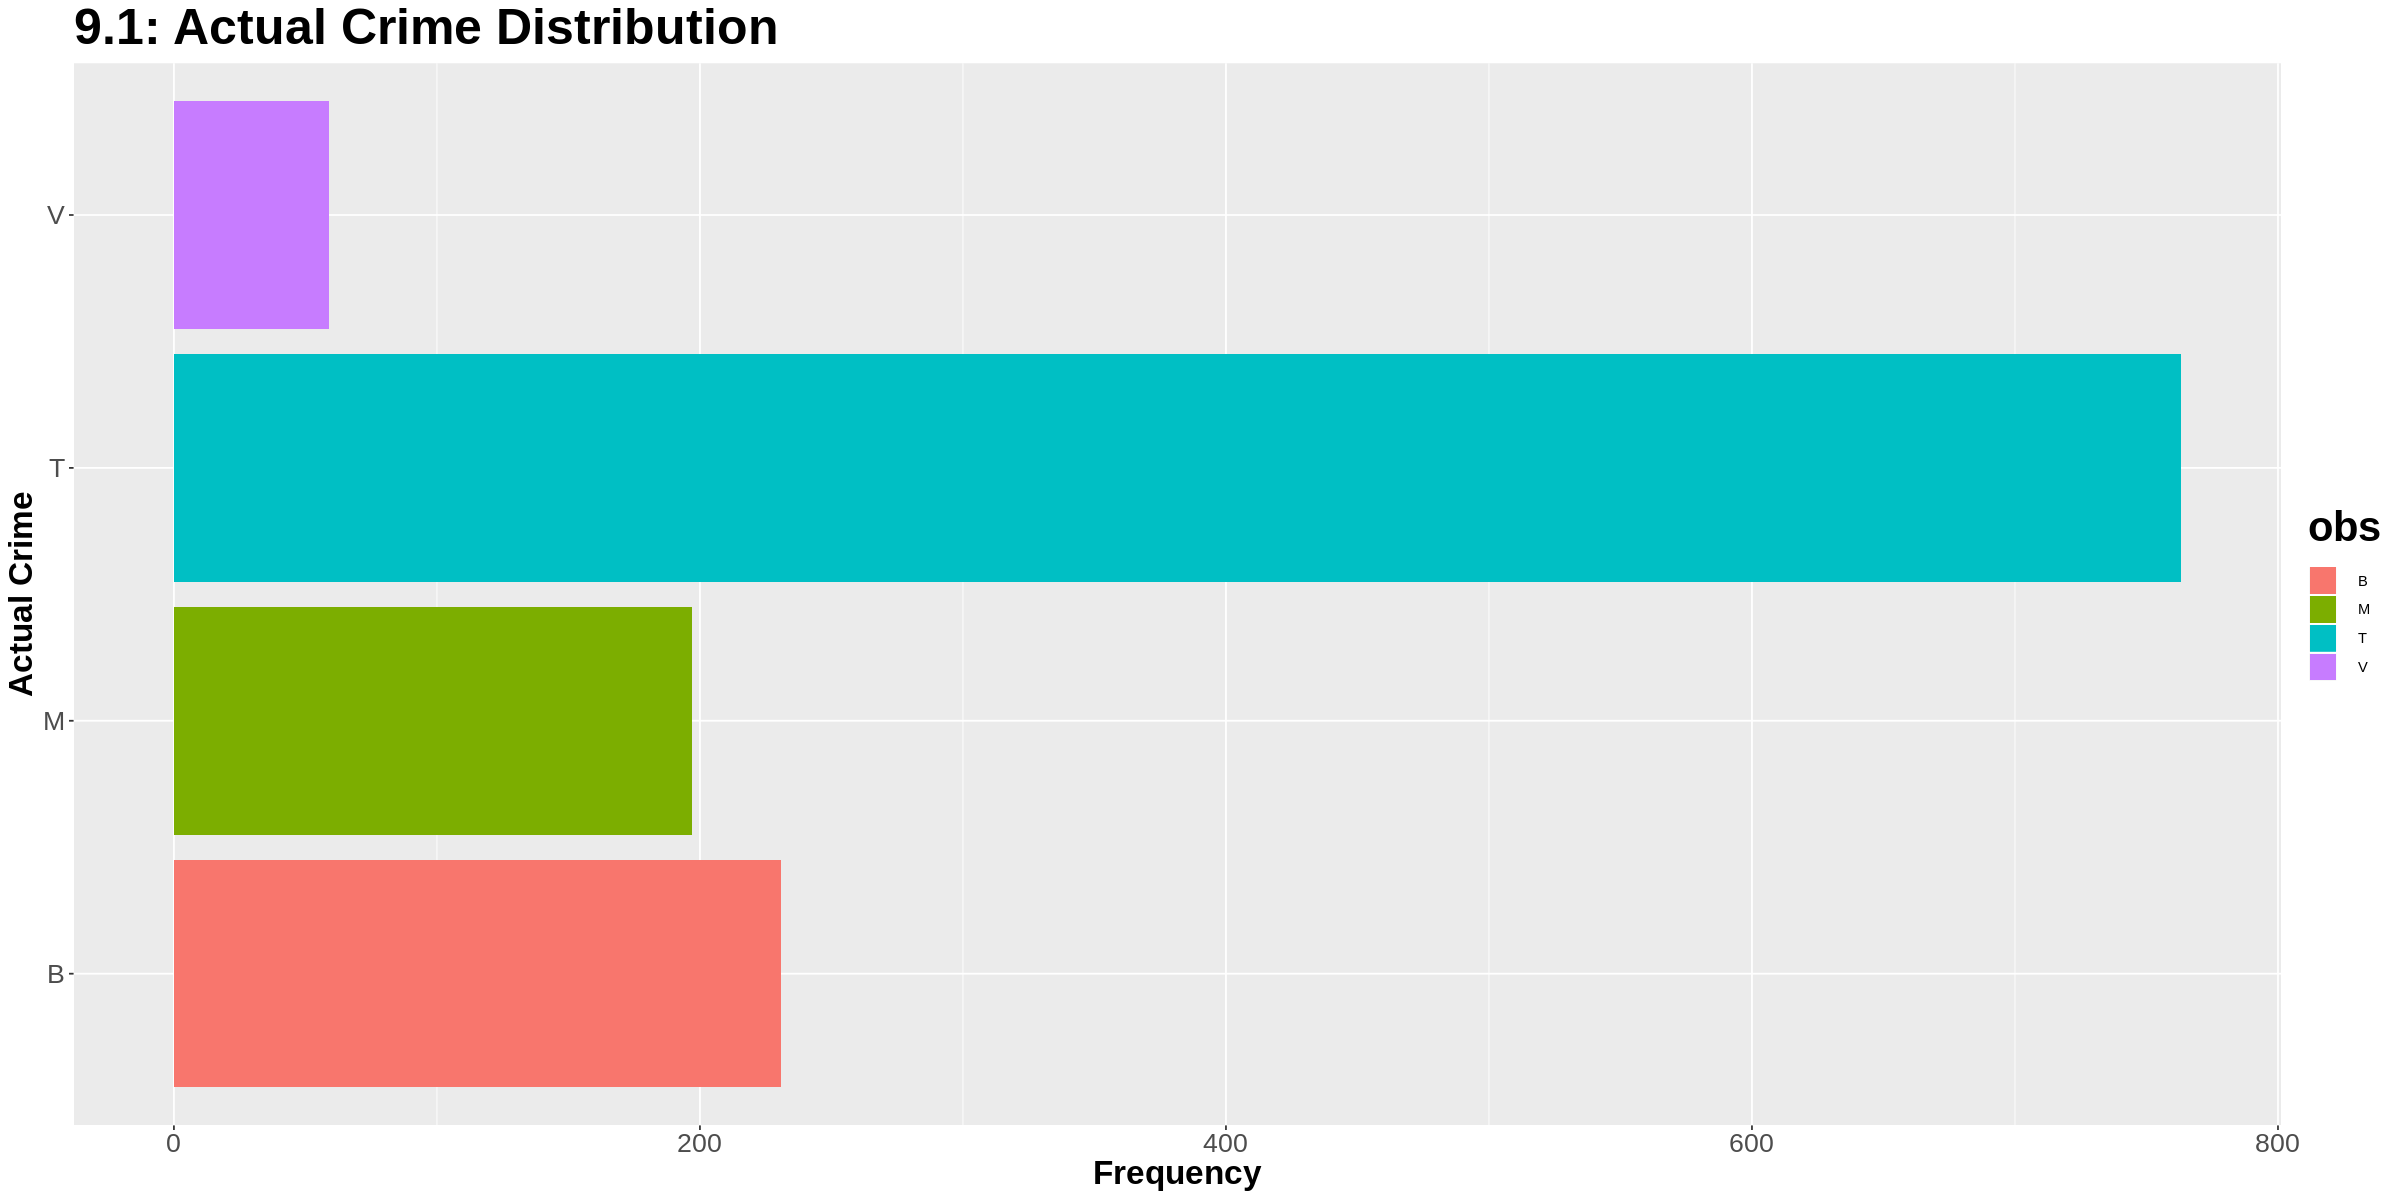

In [89]:
test_stat <- data.frame(obs = Y_test, pred = test_pred)

options(repr.plot.width=20, repr.plot.height=10)
obs_dist_plot <- ggplot(test_stat, aes(x=obs, fill=obs)) +
    geom_bar() +
    labs(x="Actual Crime", y="Frequency") +
    ggtitle("9.1: Actual Crime Distribution") +
    coord_flip() +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold"))
obs_dist_plot

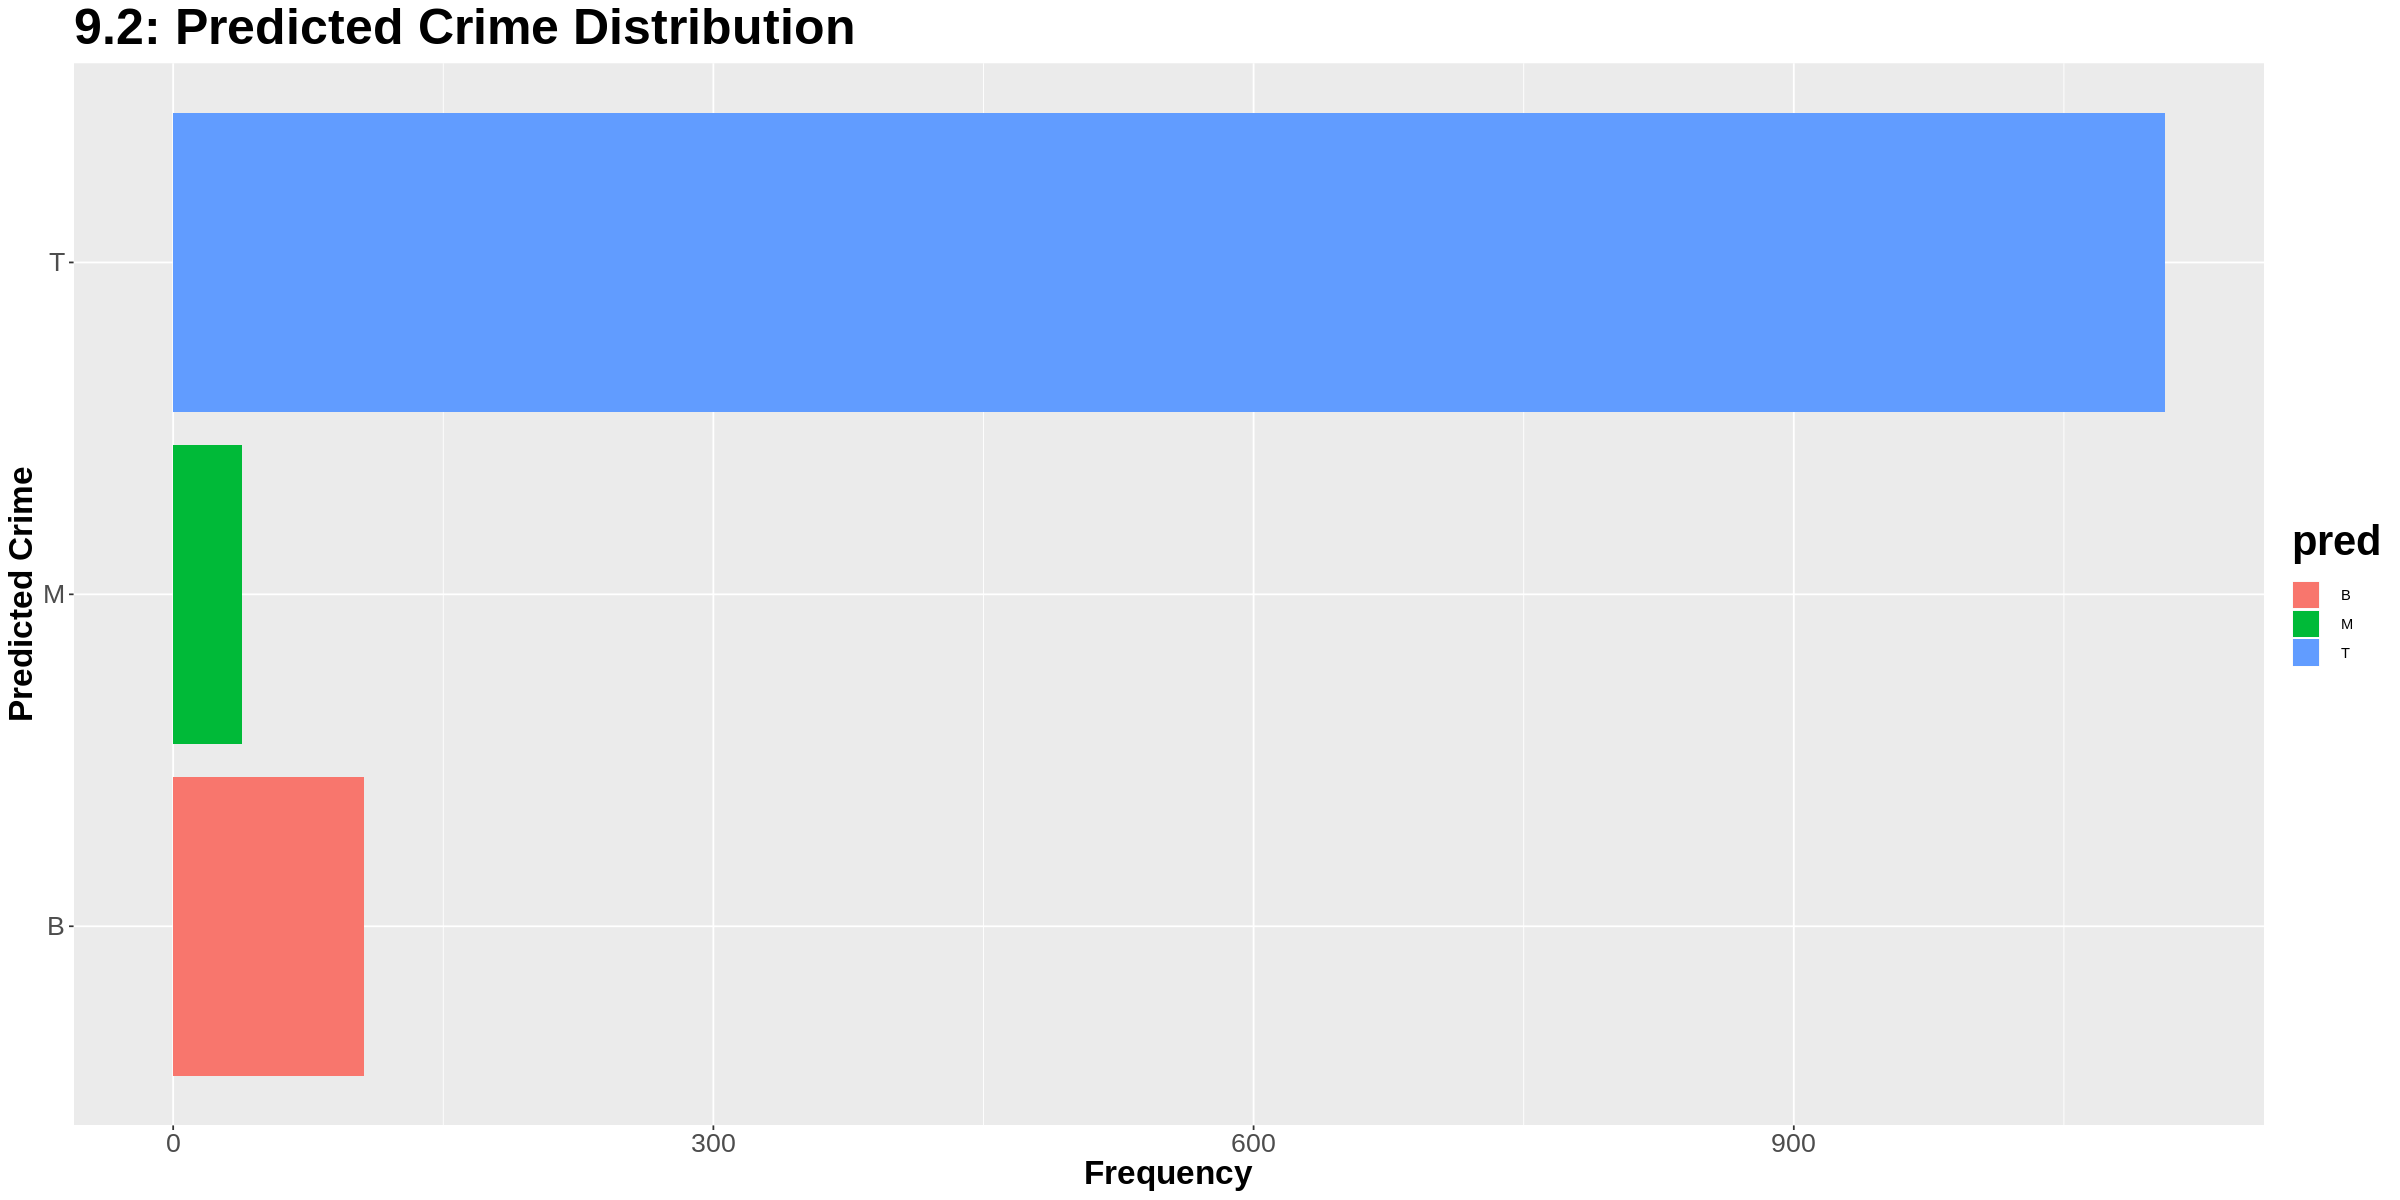

In [90]:
options(repr.plot.width=20, repr.plot.height=10)
pred_dist_plot <- ggplot(test_stat, aes(x=pred, fill=pred)) +
    geom_bar() +
    labs(x="Predicted Crime", y="Frequency") +
    ggtitle("9.2: Predicted Crime Distribution") +
    coord_flip() +
    theme(axis.text=element_text(size=16),
        axis.title=element_text(size=20,face="bold"),
        title=element_text(size=25, face="bold"))
pred_dist_plot

From the plots above, we see that the abundance of theft from vehicle crimes in the dataset seems to bias the algorithm towards predicting most data points to be theft as opposed to their actual crime.

## Discussion

Overall, building off of what we were initially expecting, we have shown that there are two main categories of factors that impact crime in Vancouver - time and location. Through using the hour that a crime occurred, we were able to discuss which types of crimes are associated with these times, and thus makes them a good candidate for predictors in the k-nn classification algorithm. On the other hand, we have discussed location and it's the role it plays in being a predictor for the type of crime that has occurred. These results are somewhat expected from our introductory exploration, as well as our readings from the articles referenced below. However, there were many interesting results that came about, especially with figures such as 2.2 that allowed us to concretely see how the hour of the day impacts which crimes happen.

After testing this and seeing that keeping crimes separate gives only an accuracy of 40% is obtained and a grouped version returns 60%, despite its lack of reflection over reality this seems to be the more useful option seeing that an accuracy of 40% isn't really helpful in the long run. On the contrary, although 60% is not ideal, it does indeed give a better estimate to work with on a larger scale. We might use this tool to supplement other field based identifications of crime, such as in person investigation and witness reports, as it still helps relatively narrow down the crime but solely is insufficient.

Thus, to answer our question of "What types of crime occur in Vancouver based on time and location of criminal activities from 2003 - 2019 and what are the best predictors of a type of crime?" we can now say that theft is definitely the highest, accounting for more than half of the crimes that occur. The answer to our predictive question is more generally that time and location are the best predictors while we found that hour along with X and Y coordinate did fairly well. 

As discussed in our expected outcomes and significance, we hope that these predictors of when crime will occur will help to funnel expensive resources into where they are needed most in order to be more effective when fighting crime. However, this leads to some future questions such as will these trends change over time? If so, what are more specific predictors that will give us insight into the trends that are occurring and in what other ways can we use data as a way of fighting crime? Lastly, our main limiting factor was with not being able to use all of the data due to resource and time constraints, so we would like to see a way to use all this data effectively and perhaps another algorithm that will allow us to do so in a timely fashion to derive more insights.

## References

Andresen, Martin A., Shannon J. Linning, and Nick Malleson. "Crime at Places and Spatial Concentrations: Exploring the Spatial Stability of Property Crime in Vancouver BC, 2003-2013." Journal of Quantitative Criminology 33.2 (2017): 255-75. ProQuest. Web. 7 Apr. 2020. 

Shannon J. Linning, Crime seasonality and the micro-spatial patterns of property crime in Vancouver, BC and Ottawa, ON, Journal of Criminal Justice, Volume 43, Issue 6, 2015, ISSN 0047-2352.

Vancouver. Vancouver Police Department. Year-End 2019 Key Performance Indicators Report. Vancouver Police Board, 20 February 2020. Web. 3 April 2020.